# **<u>PROBLEM STATEMENT</u>**

This project aims to optimize logistics and supply chain operations by developing an integrated, multi-stage predictive pipeline. The primary goal is to accurately forecast potential __Delivery Time Deviation__ using time series analysis modelling and then using that forecast as a key indicator in a dashboard for a classification-based __Risk Analysis__. This will enable proactive, data-driven decision-making and enhance overall operational efficiency.

1. **Delivery Time Deviation Forecasting**: The first objective is to develop a predictive SARIMAX model to forecast _Delivery Time Deviation_. The model will incorporate key exogenous variables provided, such as _Traffic Congestion Level_ and _Weather Condition Severity_ (among others), to provide a precise numerical prediction of potential delays in hours.

2. **Supply Chain Risk Classification**: This next component will then focuse on creating a classification model to categorize the _Risk Level_ of logistics operations. The model will analyze real-time and historical data to predict the Risk Classification as _Low, Medium,_ or _High_ enabling proactive risk management.

These two models, while distinct in their predictive output, are designed to function as a single, comprehensive logistics optimization solution. The SARIMAX predictor model will provide a granular, quantitative (predictive) forecast of potential delays, offering a clear answer to "how much." Simultaneously, the classification model provides a qualitative (prescriptive) risk assessment, answering "what kind of risk will be expected?" A high-risk classification from the second model can be used to validate or contextualize a severe delay prediction from the first, triggering specific, pre-defined operational protocols. This combined approach should demonstrate a robust understanding of predictive analytics and supply chain operations, allowing for a strategic, multi-faceted response to disruptions rather than a single, reactive measure.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistics-and-supply-chain-dataset/dynamic_supply_chain_logistics_dataset.csv


In [2]:
# Loading dependencies for the project
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import os
from io import StringIO

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Increase Jupyter cell size
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Wrap text of Jupyter cell columns as per visibility
from IPython.display import display, HTML
def wrap_df_text(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

In [4]:
# Download the logistics dataset from Kaggle
import kagglehub
# os.environ['KAGGLEHUB_CACHE'] = "<local/path/here>"

# Download latest version
path = kagglehub.dataset_download("datasetengineer/logistics-and-supply-chain-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/logistics-and-supply-chain-dataset


In [5]:
# Load the dataset into the notebook
# logistics = pd.read_csv('C:/Users/Shaizam/Desktop/Programmes for Data Science/WireMetrics - Data Science Internship/\
# Final Capstone project/datasets/datasetengineer/logistics-and-supply-chain-dataset/versions/1/dynamic_supply_chain_logistics_dataset.csv')

logistics = pd.read_csv('/kaggle/input/logistics-and-supply-chain-dataset/dynamic_supply_chain_logistics_dataset.csv')
logistics

timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0      2021-01-01 00:00:00             40.375568             -77.014318   
1      2021-01-01 01:00:00             33.507818            -117.036902   
2      2021-01-01 02:00:00             30.020640             -75.269224   
3      2021-01-01 03:00:00             36.649223             -70.190529   
4      2021-01-01 04:00:00             30.001279             -70.012195   
...                    ...                   ...                    ...   
32060  2024-08-28 20:00:00             48.496665            -104.031158   
32061  2024-08-28 21:00:00             34.670137             -89.893091   
32062  2024-08-28 22:00:00             42.963338             -82.149873   
32063  2024-08-28 23:00:00             32.082410             -70.070154   
32064  2024-08-29 00:00:00             38.576482             -94.579542   

       fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0                   5.136512             4.998009                  5.927586   
1                   5.101512             0.984929                  1.591992   
2                   5.090803             4.972665                  8.787765   
3                   8.219558             3.095064                  0.045257   
4                   5.000075             3.216077                  8.004851   
...                      ...                  ...                       ...   
32060               5.421806             4.394370                  0.192421   
32061              10.624778             2.700635                  8.736143   
32062               5.071596             0.485288                  7.420200   
32063               5.000000             4.759411                  0.932050   
32064               5.000046             4.068440                  7.156608   

       warehouse_inventory_level  loading_unloading_time  \
0                     985.716862                4.951392   
1                     396.700206                1.030379   
2                     832.408935                4.220229   
3                       0.573283                0.530186   
4                     914.925067                3.620890   
...                          ...                     ...   
32060                 127.684977                3.607803   
32061                  84.638889                1.218165   
32062                  48.500920                4.999149   
32063                 972.437425                0.505242   
32064                  16.669708                2.207746   

       handling_equipment_availability  order_fulfillment_status  ...  \
0                             0.481294                  0.761166  ...   
1                             0.620780                  0.196594  ...   
2                             0.810933                  0.152742  ...   
3                             0.008525                  0.811885  ...   
4                             0.020083                  0.053659  ...   
...                                ...                       ...  ...   
32060                         0.208643                  0.992997  ...   
32061                         0.472389                  0.946031  ...   
32062                         0.064366                  0.437687  ...   
32063                         0.250949                  0.517051  ...   
32064                         0.486014                  0.985761  ...   

       iot_temperature  cargo_condition_status  route_risk_level  \
0             0.574400                0.777263          1.182116   
1            -9.753493                0.091839          9.611988   
2            -6.491034                0.253529          6.570431   
3            -0.151276                0.877576          0.548952   
4             2.429448                0.262081          8.861443   
...                ...                     ...               ...   
32060        -8.835069                0.199377          9.893402   
32061        -2.517654   

In [6]:
# display(logistics)

desc = '''Feature Names,Variable type,Description,Datatype
Timestamp,Feature,The date and time when the data was recorded (hourly resolution),datetime
Vehicle GPS Latitude,Feature,The latitude coordinate indicating the location of the vehicle,float
Vehicle GPS Longitude,Feature,The longitude coordinate indicating the location of the vehicle,float
Fuel Consumption Rate,Feature,The rate of fuel consumption recorded for the vehicle in liters per hour,float
ETA Variation (hours),Feature,The difference between the estimated and actual arrival times,float
Traffic Congestion Level,Feature,The level of traffic congestion affecting the logistics route,float
Warehouse Inventory Level,Feature,The current inventory levels at the warehouse (units),float
Loading/Unloading Time,Feature,The time taken for loading or unloading operations in hours,float
Handling Equipment Availability,Feature,Availability status of equipment like forklifts,float
Order Fulfillment Status,Feature,Status indicating whether the order was fulfilled on time,float
Weather Condition Severity,Feature,The severity of weather conditions affecting operations,float
Port Congestion Level,Feature,The level of congestion at the port,float
Shipping Costs,Feature,The costs associated with the shipping operations in USD,float
Supplier Reliability Score,Feature,A score indicating the reliability of the supplier,float
Lead Time (days),Feature,The average time taken for a supplier to deliver materials,float
Historical Demand,Feature,The historical demand for logistics services (units),float
IoT Temperature,Feature,The temperature recorded by IoT sensors in degrees Celsius,float
Cargo Condition Status,Feature,Condition status of the cargo based on IoT monitoring,float
Route Risk Level,Feature,The risk level associated with a particular logistics route,float
Customs Clearance Time,Feature,The time required to clear customs for shipments,float
Driver Behavior Score,Feature,An indicator of the driver's behavior based on driving patterns,float
Fatigue Monitoring Score,Feature,A score indicating the level of driver fatigue,float
Disruption Likelihood Score,Target,A score predicting the likelihood of a disruption occurring,float
Delay Probability,Target,The probability of a shipment being delayed,float
Risk Classification,Target,A categorical classification indicating the level of risk,categorical
Delivery Time Deviation,Target,The deviation in hours from the expected delivery time,float
'''

desc_df = pd.read_csv(StringIO(desc), delimiter=',')

In [7]:
# Wrap text of Jupyter cell columns as per visibility
from IPython.display import display, HTML
def wrap_df_text(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

# desc_df = pd.read_csv('data_description.txt', delimiter=',')

#Use the dataframe defined for the below code, this is an example
desc_df['Description'] = desc_df['Description'].str.wrap(100) 
wrap_df_text(desc_df)

In [8]:
# Convert the timestamp variable to date-time and check basic info
logistics['timestamp'] = pd.to_datetime(logistics['timestamp'], format='%Y-%m-%d %H:%M:%S')
logistics[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  32065 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 250.6 KB


## **Exploratory Data Analysis**

Let us conduct an EDA of the features to check for their distribution characteristics over the provided days. We will begin by conducting a Missing Value analysis, followed by outlier treatments (if required - all data is inferred from IoT sensors and their subsequent formulaic values) before __aggregating__ the readings to day-wise downsampled values for conducting line-chart breakdowns for chronological data as well as other analyses.

### Missing Value Analysis

As with any dataset, no data is readily available without missing out any readings or having gaps in the observations, especially for time-series data where there might be gaps in the readings or in the very timestamps wherein the observations were missed by the loggers. As such, we will first compare if there are any gaps in the timestamps to determine if any sort of time-gaps need to be filled.

In [9]:
# Check against actual date range to check for gaps in frequency of reading taken
gap = pd.date_range(logistics.loc[:, 'timestamp'].min(), logistics.loc[:, 'timestamp'].max(), freq='1h').difference(logistics.loc[:, 'timestamp'])
print(f'There is a gap of {len(gap)} readings between the actual time period and the timestamps provided.')

There is a gap of 0 readings between the actual time period and the timestamps provided.


From the above check, we can see that no gaps were seen in the dataset timestamps, meaning that the sensors had dutifully taken all the readings without any gaps or loss in logging information. We can now go ahead and check for any `NaN` values that may be present in the dataset due to sensory data errors, or missed logging protocols.

In [10]:
# Check for missing values amount the other features
logistics.info()
print('\n')

from IPython.display import Markdown
display(Markdown("\n #### Missing Value Analysis"))
display(logistics.loc[(logistics.isna().any(axis=1)), :])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        32065 non-null  datetime64[ns]
 1   vehicle_gps_latitude             32065 non-null  float64       
 2   vehicle_gps_longitude            32065 non-null  float64       
 3   fuel_consumption_rate            32065 non-null  float64       
 4   eta_variation_hours              32065 non-null  float64       
 5   traffic_congestion_level         32065 non-null  float64       
 6   warehouse_inventory_level        32065 non-null  float64       
 7   loading_unloading_time           32065 non-null  float64       
 8   handling_equipment_availability  32065 non-null  float64       
 9   order_fulfillment_status         32065 non-null  float64       
 10  weather_condition_severity       32065 non-null  float64  


 #### Missing Value Analysis

Empty DataFrame
Columns: [timestamp, vehicle_gps_latitude, vehicle_gps_longitude, fuel_consumption_rate, eta_variation_hours, traffic_congestion_level, warehouse_inventory_level, loading_unloading_time, handling_equipment_availability, order_fulfillment_status, weather_condition_severity, port_congestion_level, shipping_costs, supplier_reliability_score, lead_time_days, historical_demand, iot_temperature, cargo_condition_status, route_risk_level, customs_clearance_time, driver_behavior_score, fatigue_monitoring_score, disruption_likelihood_score, delay_probability, risk_classification, delivery_time_deviation]
Index: []

[0 rows x 26 columns]

We can thus conclude safely that from the above analysis, we __do not see__ any missing values or missing timestamps in the dataset, and can safely be used for further analysis. Since this is a time series dataset, and we will be conducting Demand Forecast predictions, we need to convert the `timestamp` column into the index. We have already confirmed that there are no gaps in the readings taken, meaning that the sensors have been taking continuous readings throughout the entire duration of the dataset without any loss in information.

In [11]:
# Let us convert the timestamp into index
logistics.set_index('timestamp', drop=True, verify_integrity=True, inplace=True)
logistics

vehicle_gps_latitude  vehicle_gps_longitude  \
timestamp                                                          
2021-01-01 00:00:00             40.375568             -77.014318   
2021-01-01 01:00:00             33.507818            -117.036902   
2021-01-01 02:00:00             30.020640             -75.269224   
2021-01-01 03:00:00             36.649223             -70.190529   
2021-01-01 04:00:00             30.001279             -70.012195   
...                                   ...                    ...   
2024-08-28 20:00:00             48.496665            -104.031158   
2024-08-28 21:00:00             34.670137             -89.893091   
2024-08-28 22:00:00             42.963338             -82.149873   
2024-08-28 23:00:00             32.082410             -70.070154   
2024-08-29 00:00:00             38.576482             -94.579542   

                     fuel_consumption_rate  eta_variation_hours  \
timestamp                                                         
2021-01-01 00:00:00               5.136512             4.998009   
2021-01-01 01:00:00               5.101512             0.984929   
2021-01-01 02:00:00               5.090803             4.972665   
2021-01-01 03:00:00               8.219558             3.095064   
2021-01-01 04:00:00               5.000075             3.216077   
...                                    ...                  ...   
2024-08-28 20:00:00               5.421806             4.394370   
2024-08-28 21:00:00              10.624778             2.700635   
2024-08-28 22:00:00               5.071596             0.485288   
2024-08-28 23:00:00               5.000000             4.759411   
2024-08-29 00:00:00               5.000046             4.068440   

                     traffic_congestion_level  warehouse_inventory_level  \
timestamp                                                                  
2021-01-01 00:00:00                  5.927586                 985.716862   
2021-01-01 01:00:00                  1.591992                 396.700206   
2021-01-01 02:00:00                  8.787765                 832.408935   
2021-01-01 03:00:00                  0.045257                   0.573283   
2021-01-01 04:00:00                  8.004851                 914.925067   
...                                       ...                        ...   
2024-08-28 20:00:00                  0.192421                 127.684977   
2024-08-28 21:00:00                  8.736143                  84.638889   
2024-08-28 22:00:00                  7.420200                  48.500920   
2024-08-28 23:00:00                  0.932050                 972.437425   
2024-08-29 00:00:00                  7.156608                  16.669708   

                     loading_unloading_time  handling_equipment_availability  \
timestamp                                                                      
2021-01-01 00:00:00                4.951392                         0.481294   
2021-01-01 01:00:00                1.030379                         0.620780   
2021-01-01 02:00:00                4.220229                         0.810933   
2021-01-01 03:00:00                0.530186                         0.008525   
2021-01-01 04:00:00                3.620890                         0.020083   
...                                     ...                              ...   
2024-08-28 20:00:00                3.607803                         0.208643   
2024-08-28 21:00:00                1.218165                         0.472389   
2024-08-28 22:00:00                4.999149                         0.064366   
2024-08-28 23:00:00                0.505242                         0.250949   
2024-08-29 00:00:00                2.207746                         0.486014   

                     order_fulfillment_status  weather_condition_severity  \
timestamp                                                                   
2021-01-01 00:00:00                  0.761166                    0.359066   
202

### Feature Engineering

Before we proceed with the analysis, we need to understand that not all features of the dataset will be used for our project, and some of which will be used only for the second phase. In our case, there is no sense in keeping the latitude and longitude co-ordinates of the trucks for our analysis. This is because we will be making a model to simulate and then forecast the `delivery_time_deviation` of the supply chain, which is no longer dependent on these features; we already have a quantifiable representation of the environmental conditions at those co-ordinates (such as `traffic_congestion_level`) which provides better information as far as our project's scope is concerned. Moreover, co-ordinates by themselves provide no context to our project, as simply providing the position of the vehicle will not be helpful in any sense without the context of the other features. As such, we will __drop__ the co-ordinate points from the dataset. Also, since are looking at the `delivery_time_deviation` and the `risk_classification` variables as targets for our project, variables like `route_risk_level` and `disruption_likelihood_score` are _operational assessments_ calculated at the __start of the process__ (when the route is planned or dispatched); they are thus, considered as _inputs_ into the logistics process.

In [12]:
# Outlier analysis
cols = logistics.columns
cols = cols.drop(['vehicle_gps_latitude', 'vehicle_gps_longitude'])
cols

Index(['fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation'],
      dtype='object')

In [13]:
# Dropping second target variable
cols_a = cols.drop(['risk_classification'])
display(cols_a)

Index(['fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'delivery_time_deviation'],
      dtype='object')

In [14]:
# Creating new dataframe for phase 1 of our project
forecast_del = logistics.loc[:, cols_a]
forecast_del

fuel_consumption_rate  eta_variation_hours  \
timestamp                                                         
2021-01-01 00:00:00               5.136512             4.998009   
2021-01-01 01:00:00               5.101512             0.984929   
2021-01-01 02:00:00               5.090803             4.972665   
2021-01-01 03:00:00               8.219558             3.095064   
2021-01-01 04:00:00               5.000075             3.216077   
...                                    ...                  ...   
2024-08-28 20:00:00               5.421806             4.394370   
2024-08-28 21:00:00              10.624778             2.700635   
2024-08-28 22:00:00               5.071596             0.485288   
2024-08-28 23:00:00               5.000000             4.759411   
2024-08-29 00:00:00               5.000046             4.068440   

                     traffic_congestion_level  warehouse_inventory_level  \
timestamp                                                                  
2021-01-01 00:00:00                  5.927586                 985.716862   
2021-01-01 01:00:00                  1.591992                 396.700206   
2021-01-01 02:00:00                  8.787765                 832.408935   
2021-01-01 03:00:00                  0.045257                   0.573283   
2021-01-01 04:00:00                  8.004851                 914.925067   
...                                       ...                        ...   
2024-08-28 20:00:00                  0.192421                 127.684977   
2024-08-28 21:00:00                  8.736143                  84.638889   
2024-08-28 22:00:00                  7.420200                  48.500920   
2024-08-28 23:00:00                  0.932050                 972.437425   
2024-08-29 00:00:00                  7.156608                  16.669708   

                     loading_unloading_time  handling_equipment_availability  \
timestamp                                                                      
2021-01-01 00:00:00                4.951392                         0.481294   
2021-01-01 01:00:00                1.030379                         0.620780   
2021-01-01 02:00:00                4.220229                         0.810933   
2021-01-01 03:00:00                0.530186                         0.008525   
2021-01-01 04:00:00                3.620890                         0.020083   
...                                     ...                              ...   
2024-08-28 20:00:00                3.607803                         0.208643   
2024-08-28 21:00:00                1.218165                         0.472389   
2024-08-28 22:00:00                4.999149                         0.064366   
2024-08-28 23:00:00                0.505242                         0.250949   
2024-08-29 00:00:00                2.207746                         0.486014   

                     order_fulfillment_status  weather_condition_severity  \
timestamp                                                                   
2021-01-01 00:00:00                  0.761166                    0.359066   
2021-01-01 01:00:00                  0.196594                    0.230660   
2021-01-01 02:00:00                  0.152742                    0.027210   
2021-01-01 03:00:00                  0.811885                    0.616619   
2021-01-01 04:00:00                  0.053659                    0.952385   
...                                       ...                         ...   
2024-08-28 20:00:00                  0.992997                    0.792648   
2024-08-28 21:00:00                  0.946031                    0.034156   
2024-08-28 22:00:00                  0.437687                    0.022338   
2024-08-28 23:00:00                  0.517051                    0.782338   
2024-08-29 00:00:00                  0.985761                    0.997631   

                     port_congestion_level  shipping_costs  ...  \
timestamp                                         

### Outlier Analysis

Now that we have established there are no missing values in the dataset, we can go ahead and check if the dataset requires any outlier treatments. From the preliminary data descriptions, many of the features already have a set information range which can be considered as realistic, while any changes in sensory reading data can be immediately checked for in the _5-number_ summary as given below.

In [15]:
# Check for 5-number summary
forecast_del.describe().T

count         mean          std  \
fuel_consumption_rate            32065.0     8.011735     4.264960   
eta_variation_hours              32065.0     2.893068     2.274044   
traffic_congestion_level         32065.0     4.991493     3.532048   
warehouse_inventory_level        32065.0   299.254732   323.443513   
loading_unloading_time           32065.0     2.291669     1.554202   
handling_equipment_availability  32065.0     0.302695     0.325915   
order_fulfillment_status         32065.0     0.600740     0.345672   
weather_condition_severity       32065.0     0.497608     0.353285   
port_congestion_level            32065.0     6.978414     3.251051   
shipping_costs                   32065.0   459.374452   312.183487   
supplier_reliability_score       32065.0     0.500850     0.353528   
lead_time_days                   32065.0     5.227502     4.523085   
historical_demand                32065.0  6022.001286  3427.638017   
iot_temperature                  32065.0     0.044792    14.187486   
cargo_condition_status           32065.0     0.297282     0.321611   
route_risk_level                 32065.0     7.001144     3.236328   
customs_clearance_time           32065.0     2.296448     1.555932   
driver_behavior_score            32065.0     0.498391     0.354159   
fatigue_monitoring_score         32065.0     0.600872     0.345810   
disruption_likelihood_score      32065.0     0.803656     0.279185   
delay_probability                32065.0     0.699077     0.324514   
delivery_time_deviation          32065.0     5.177648     4.157988   

                                          min          25%          50%  \
fuel_consumption_rate            5.000000e+00     5.019984     5.636036   
eta_variation_hours             -1.999993e+00     1.185744     3.882059   
traffic_congestion_level         1.091633e-09     1.474720     4.981244   
warehouse_inventory_level        1.322210e-12    16.051635   157.288022   
loading_unloading_time           5.000000e-01     0.774798     1.917121   
handling_equipment_availability  4.565769e-16     0.017108     0.159515   
order_fulfillment_status         1.317764e-06     0.277096     0.680553   
weather_condition_severity       4.536949e-09     0.144014     0.496178   
port_congestion_level            1.778665e-06     4.513889     8.383225   
shipping_costs                   1.000000e+02   154.017124   388.996911   
supplier_reliability_score       6.904319e-10     0.145316     0.503266   
lead_time_days                   1.000000e+00     1.237490     3.297654   
historical_demand                1.000030e+02  2822.607616  6785.123209   
iot_temperature                 -1.000000e+01    -9.931074    -7.858681   
cargo_condition_status           7.255415e-19     0.016783     0.154976   
route_risk_level                 4.968185e-05     4.593407     8.385605   
customs_clearance_time           5.000000e-01     0.776166     1.938273   
driver_behavior_score            4.043927e-09     0.144357     0.498847   
fatigue_monitoring_score         3.269508e-07     0.278315     0.683113   
disruption_likelihood_score      4.769048e-05     0.693739     0.958128   
delay_probability                3.128746e-06     0.456009     0.839599   
delivery_time_deviation         -1.999998e+00     1.269197     6.113662   

                                         75%           max  
fuel_consumption_rate               9.669944     19.999875  
eta_variation_hours                 4.884355      5.000000  
traffic_congestion_level            8.534902      9.999999  
warehouse_inventory_level         540.597991    999.999298  
loading_unloading_time              3.734188      5.000000  
handling_equipment_availability     0.553595      0.999999  
order_fulfillment_status            0.938160      1.000000  
weather_condition_severity          0.849823      1.000000  
port_congestion_level               9.838150     10.000000  
shipping_costs                    753.007203    999.999853  
supplier_reliability_score 

For our current Phase 1 project, we will only be looking at one target variable, namely the `delivery_time_deviation` to make the forecast model of the same. The other target variable (`risk_classification`) will be used in the second phase of the project to classify the risk of the routes taken in the dataset.

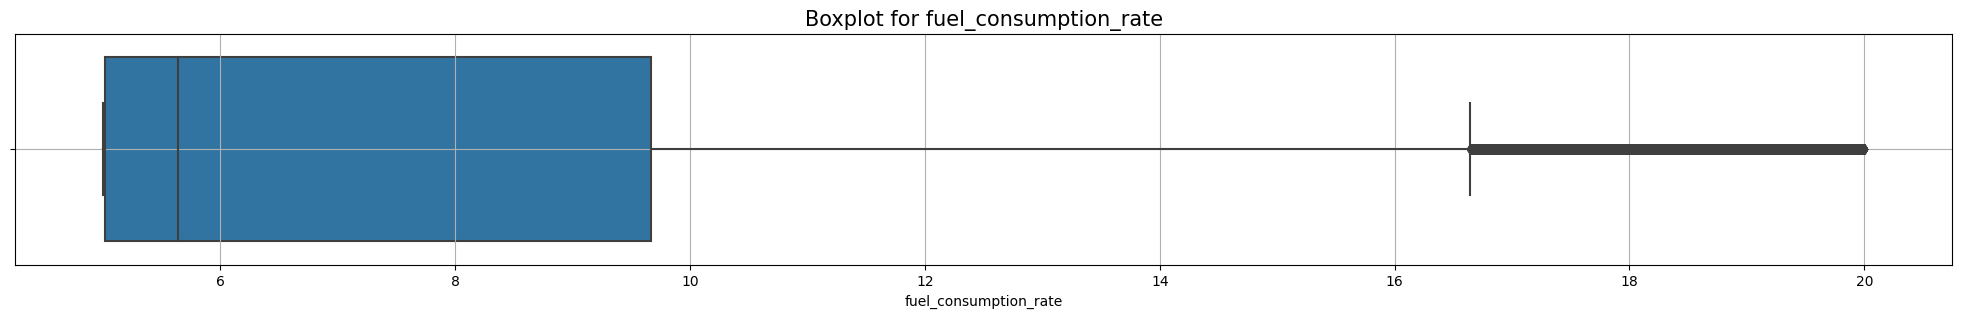

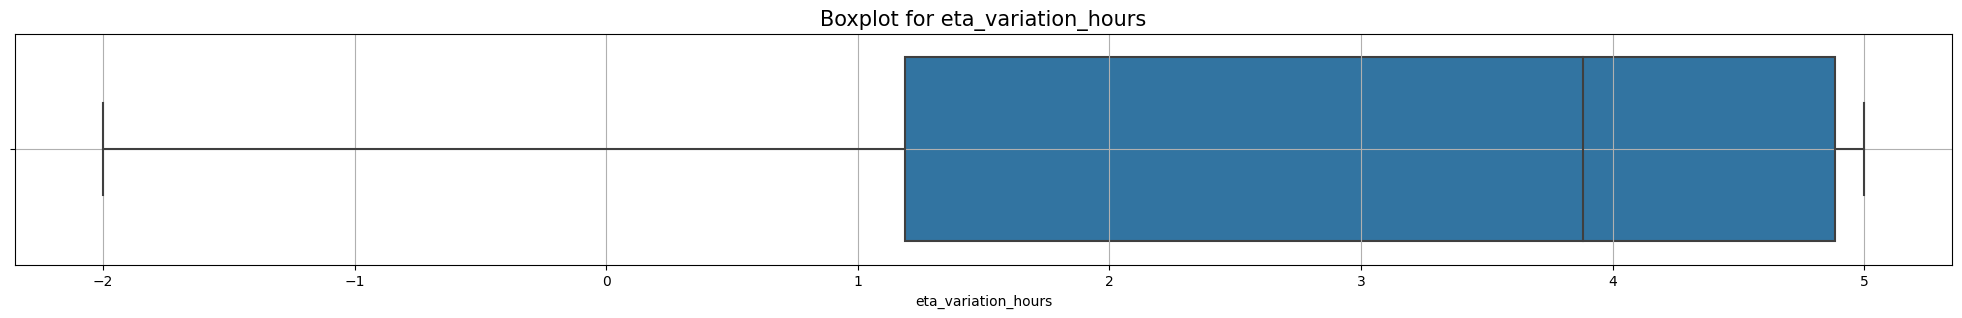

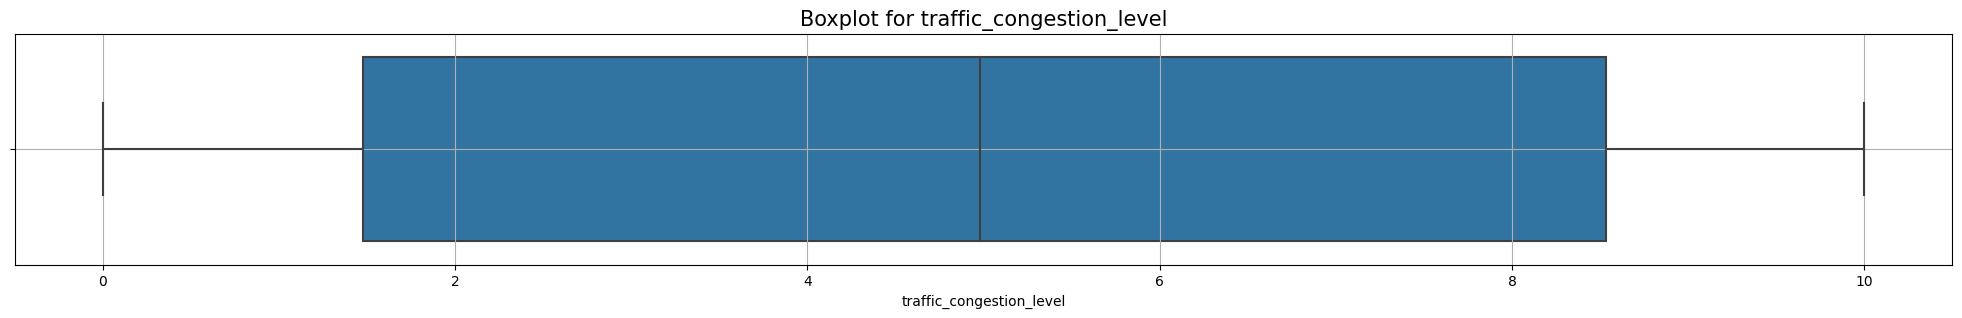

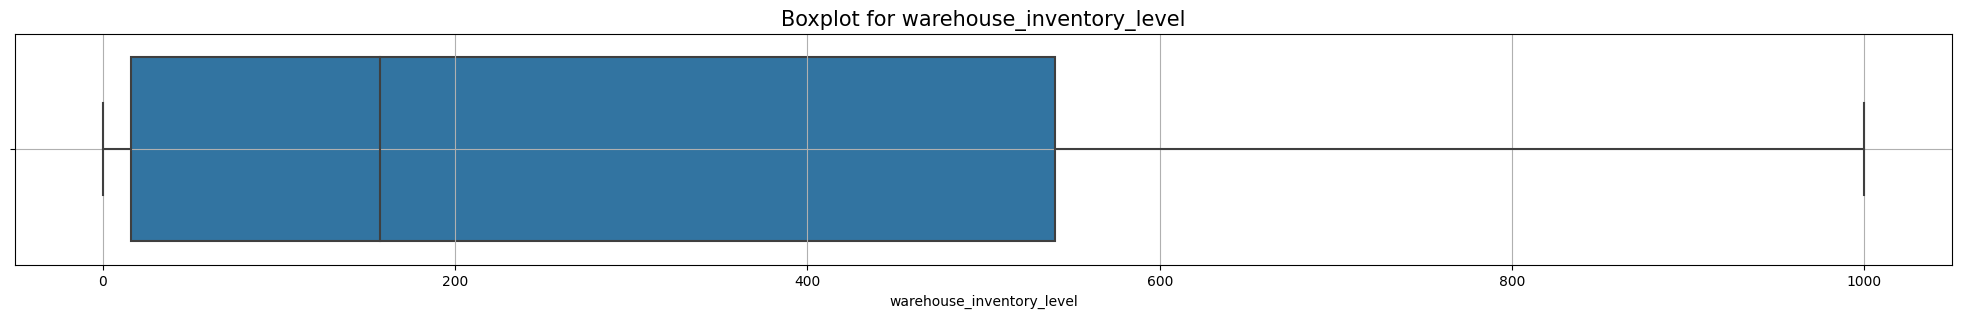

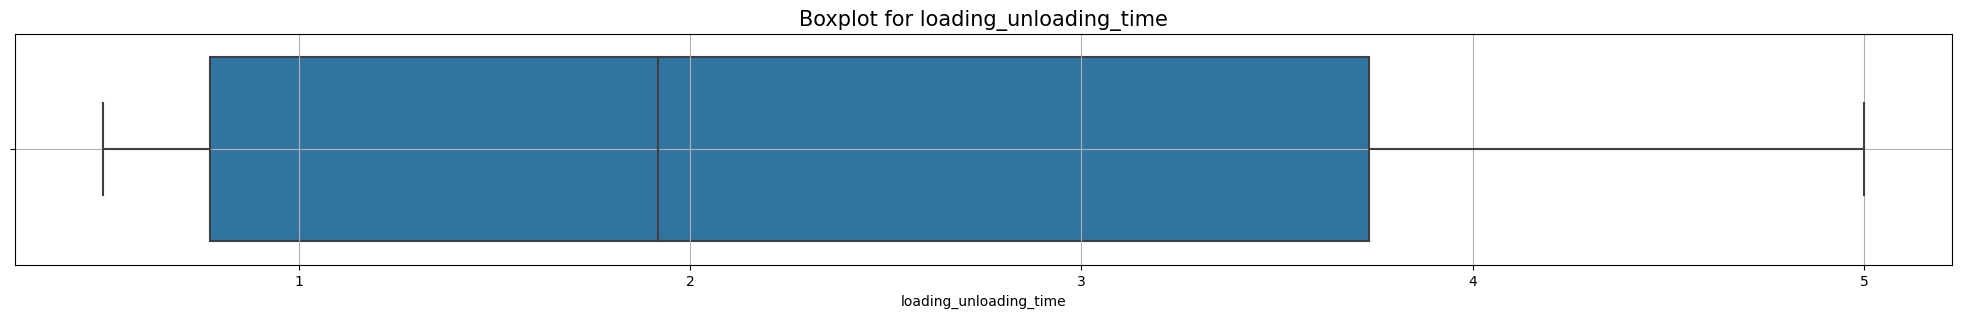

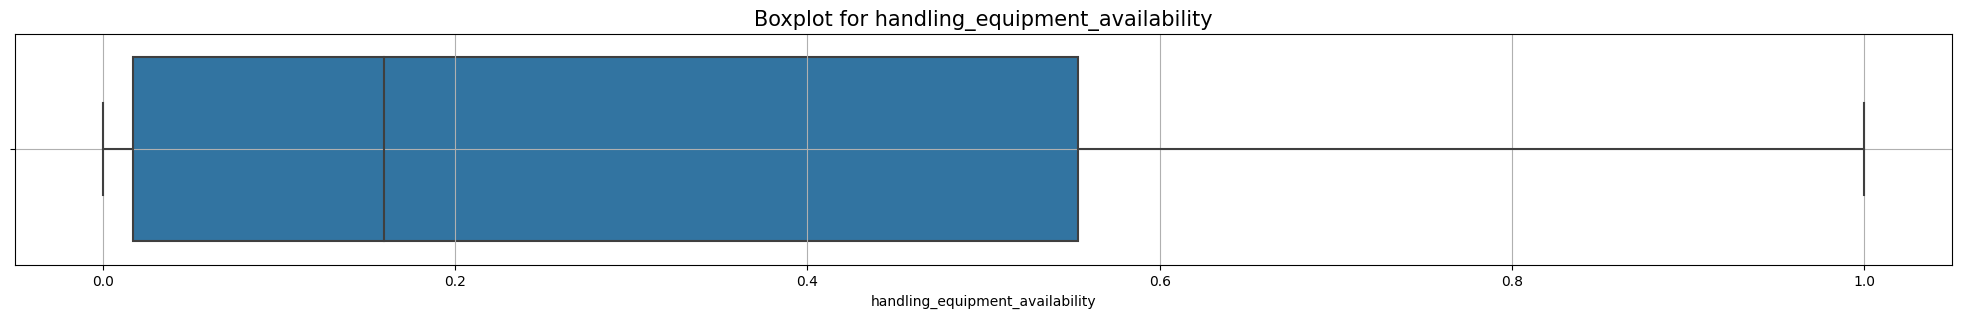

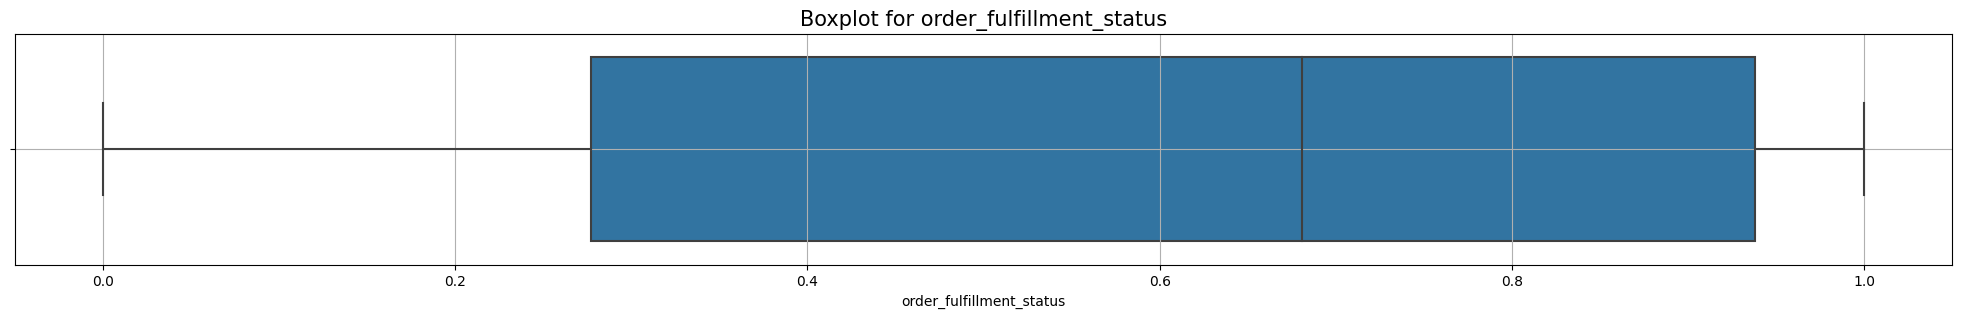

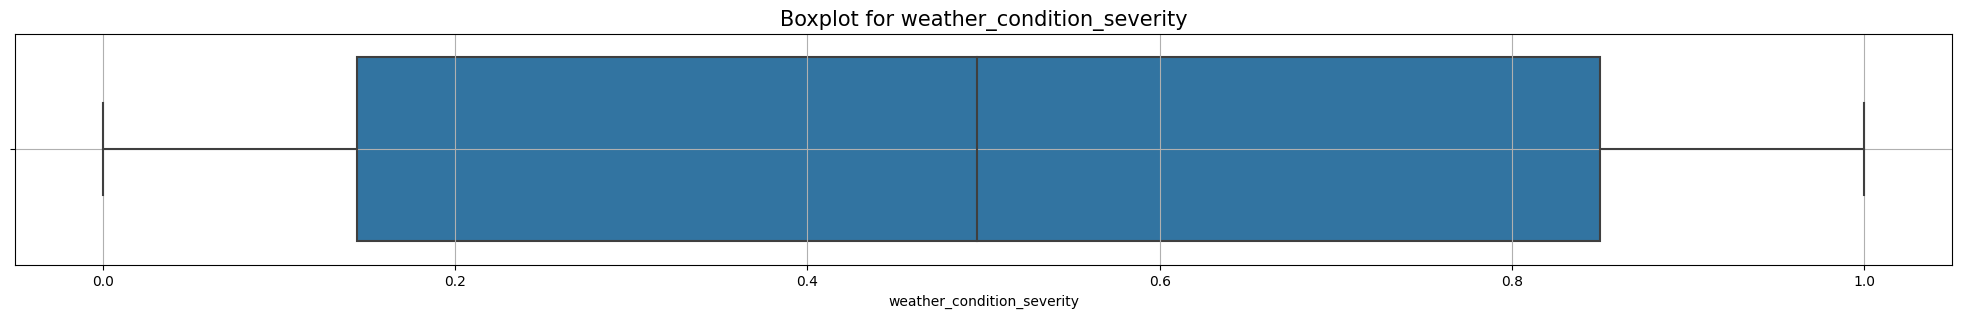

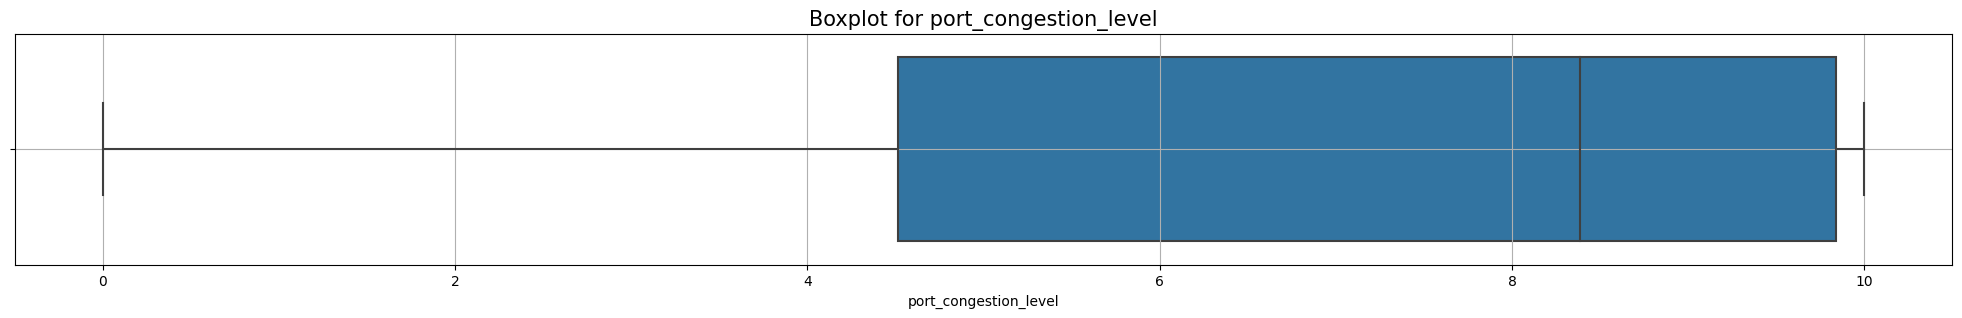

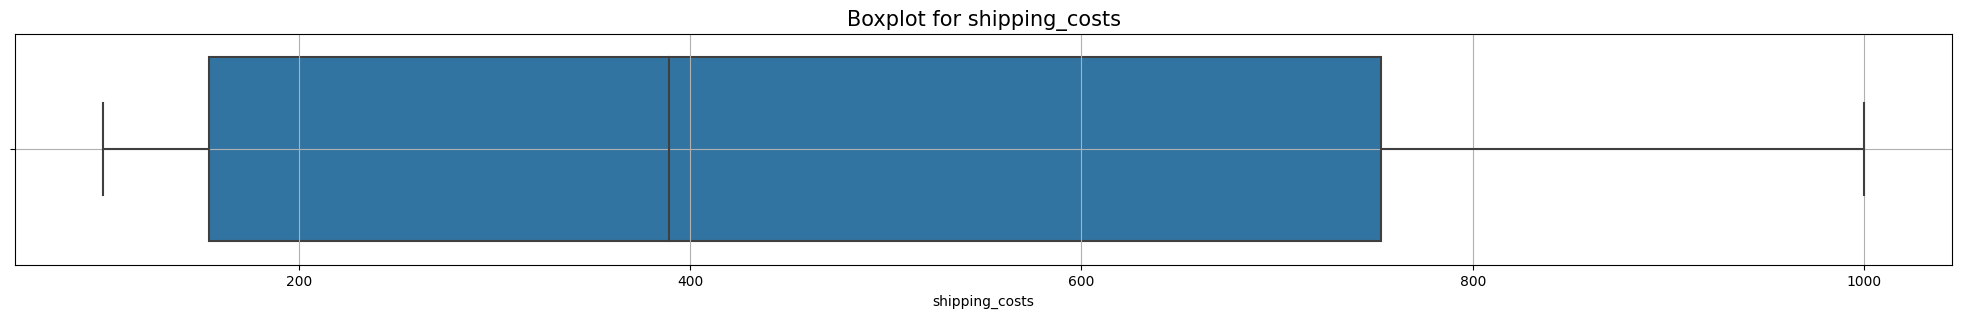

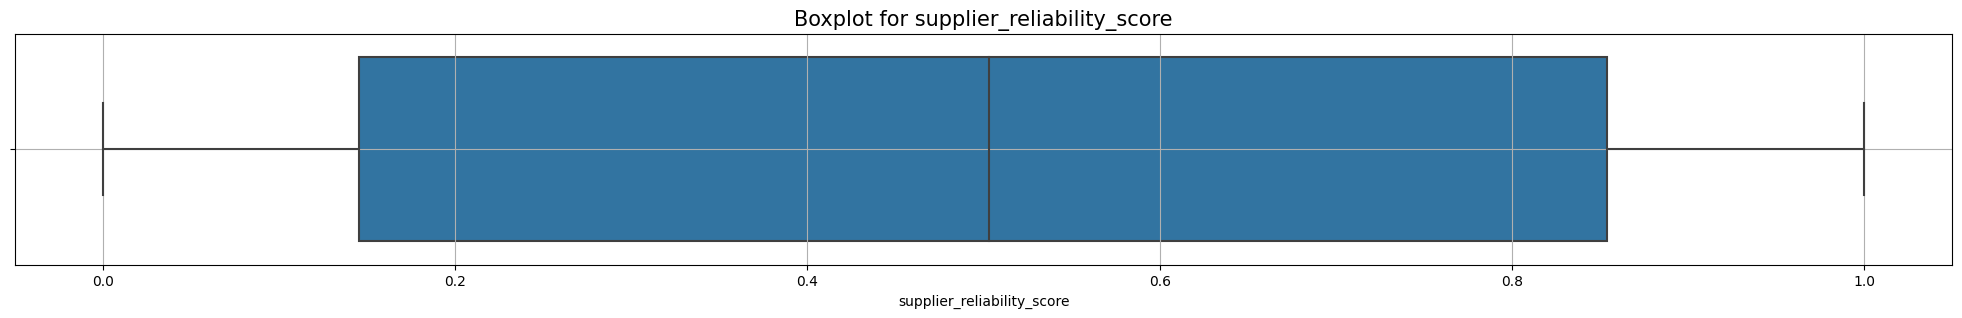

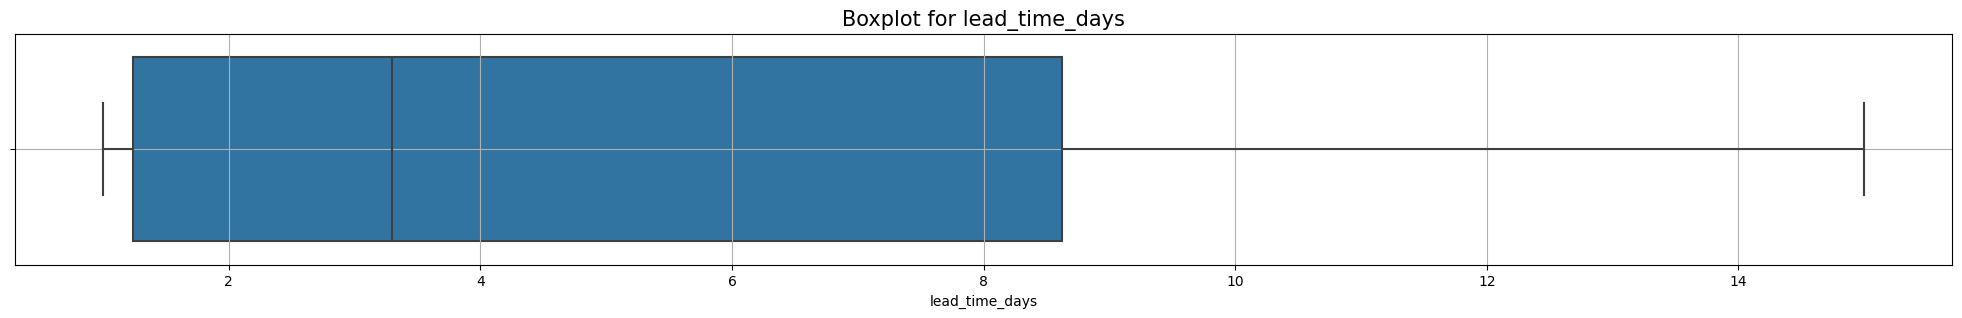

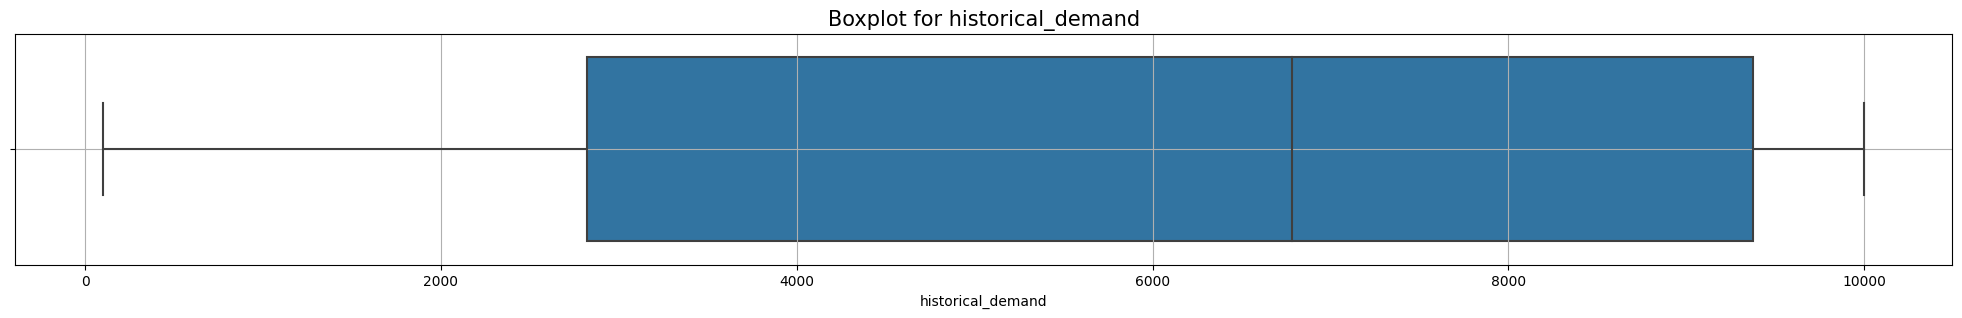

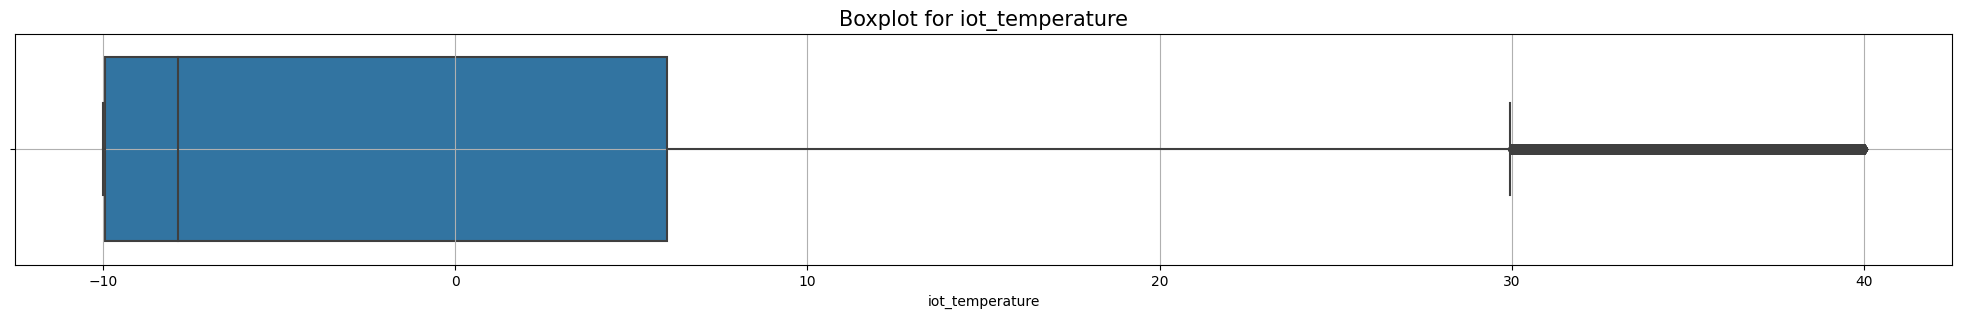

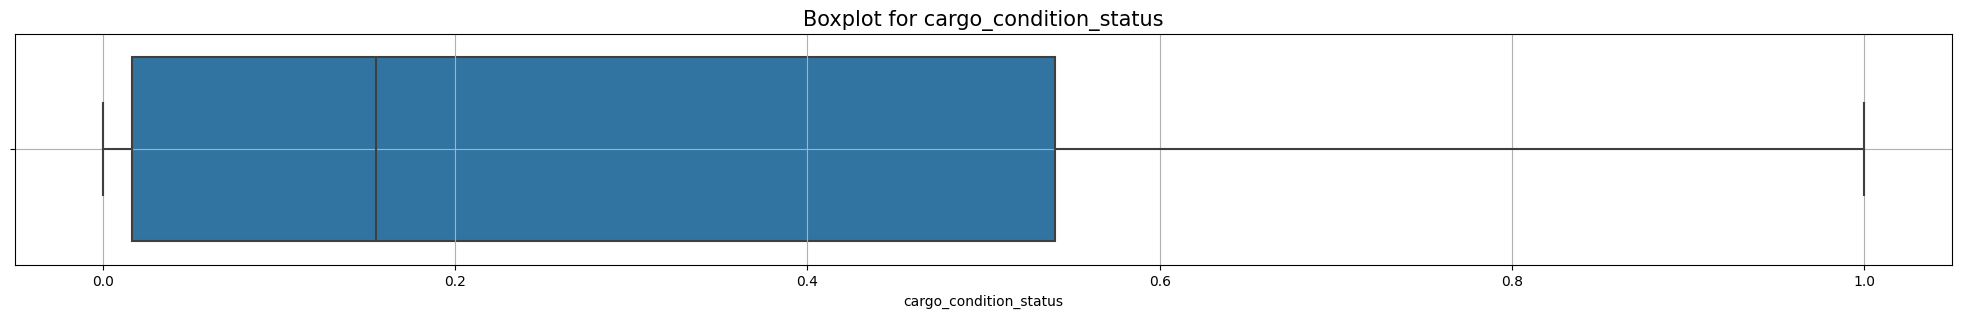

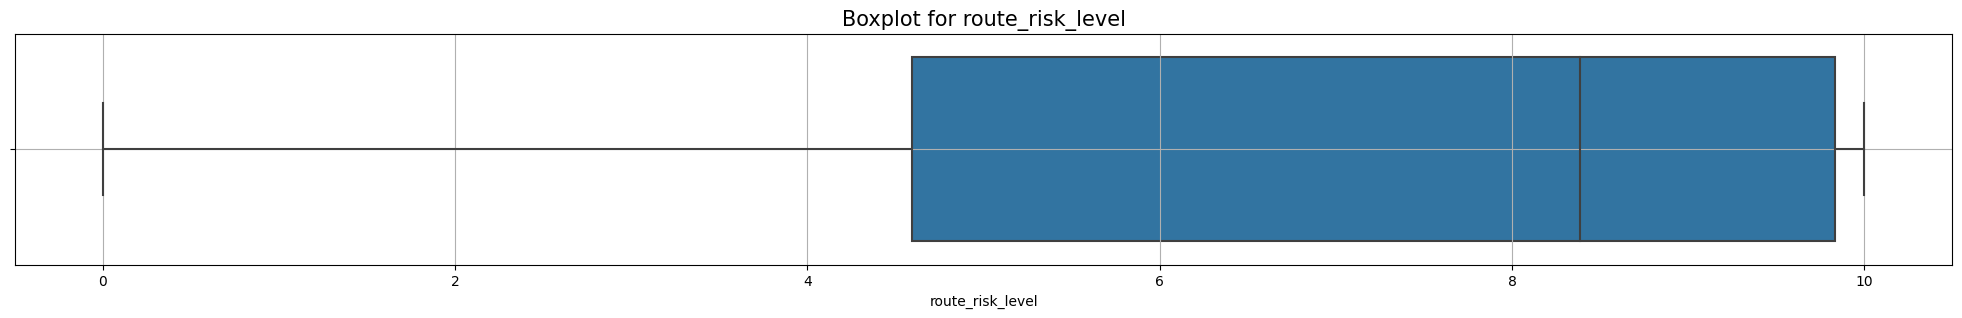

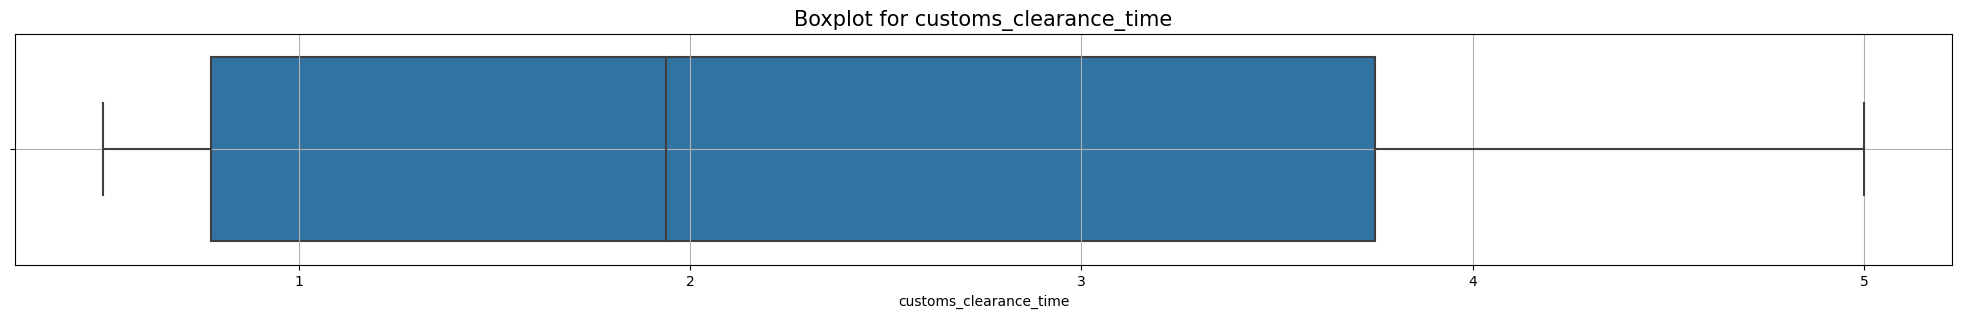

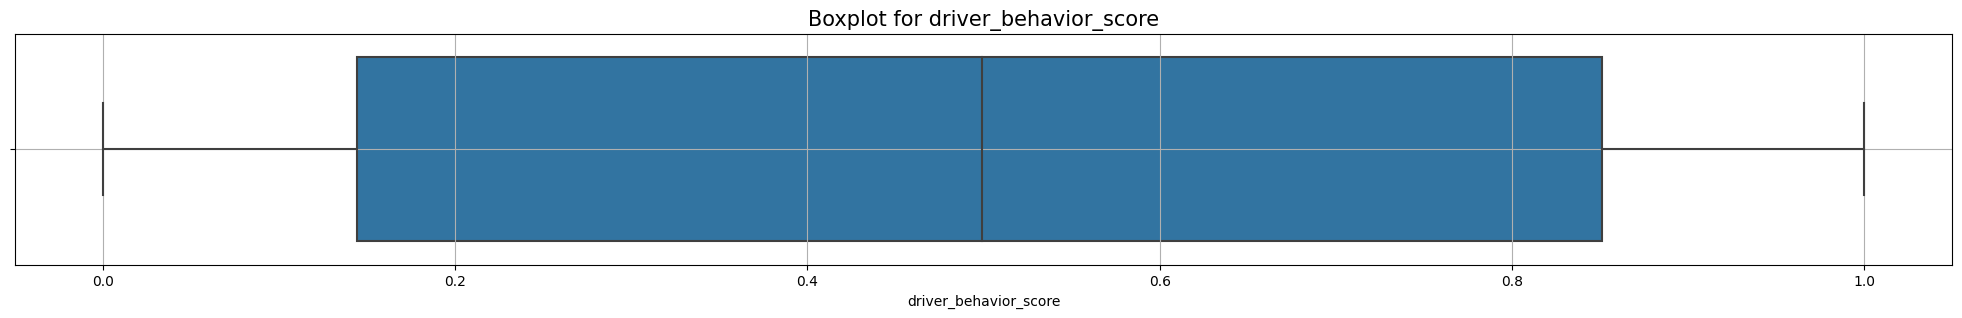

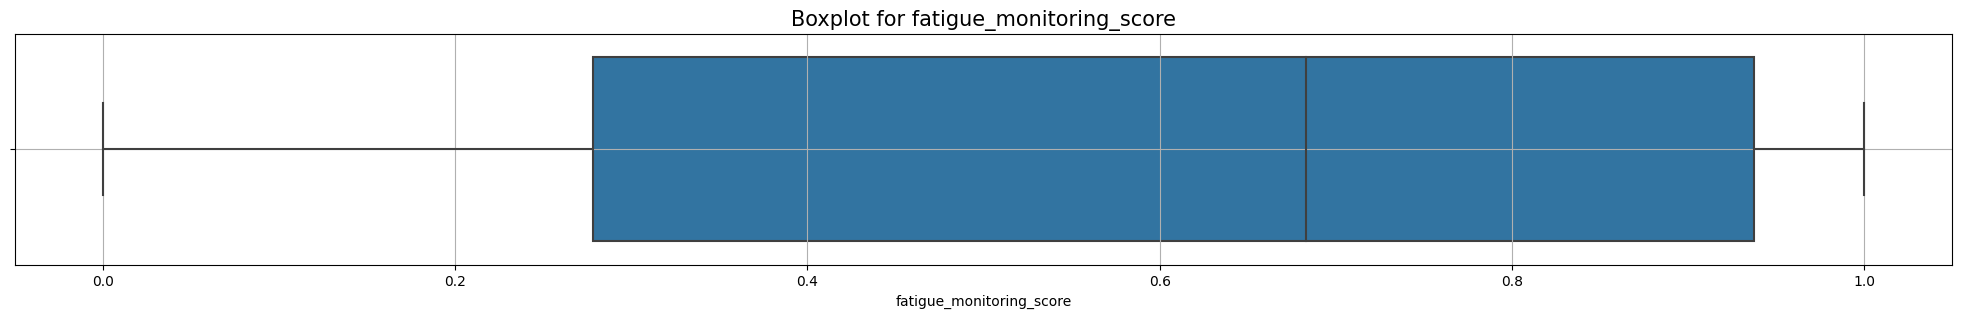

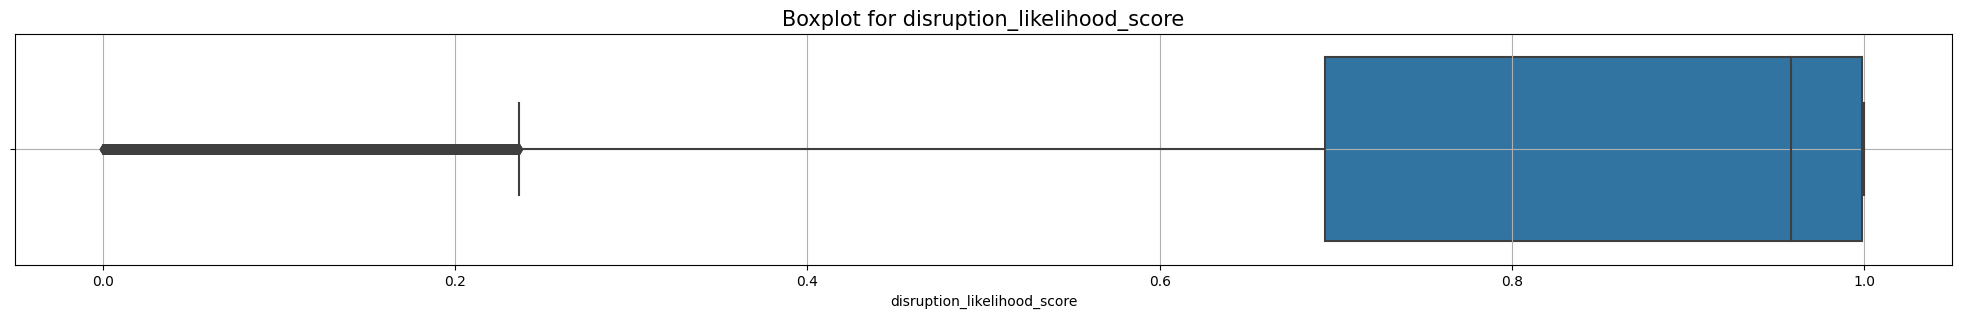

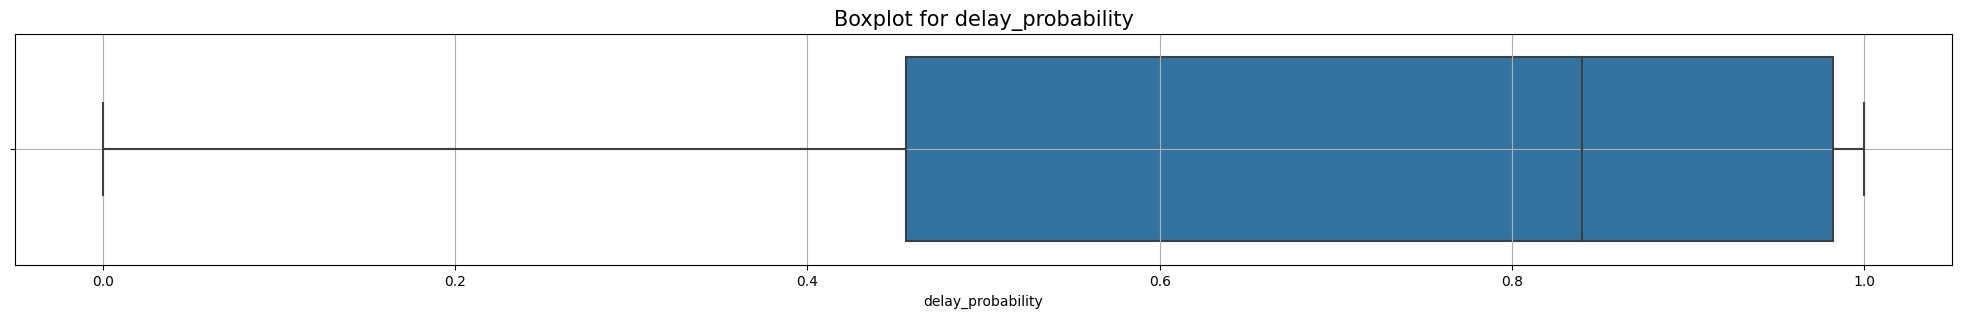

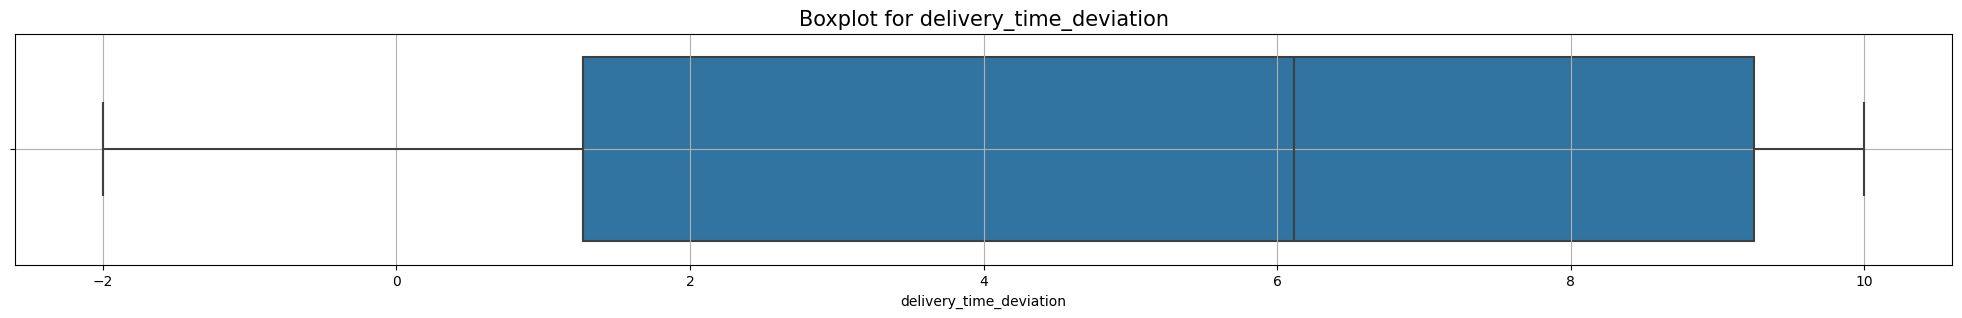

In [16]:
# Outlier analysis using Box-plots based on Tukey's theorem
for i in cols_a:
    plt.figure(figsize=(25, 3))
    sns.boxplot(forecast_del, x = forecast_del[i])
    plt.title(f'Boxplot for {i}', fontsize=15)
    plt.grid(True);

From the above Box-plots, we can see that most of the features mentioned in the dataset are already within specified data ranges (such as the maximum value for `traffic_congestion_level` being at `10`). Even if we look at maximum values, which are not in the same scale for most of the features, the values seem to be reasonably within limits, such as the maximum values for the `shipping_costs` being up to $1,000 and the `historical_demand` being at around 10,000 units. Also, the outliers present in the `fuel_consumption_rate` and `iot_temperature`, the data points are said to be mappings and logs obtained from sensor data, while those seen in the `disruption_likelihood_score` is on the lower side with its minimum within the specified range of the data descriptors. The most significant observation that speaks against these data points being outliers for 'extreme' points however, is that the farthest outlier point is not significantly away from the expected distribution as an isolated point, but rather is still in the vicinity of other points to some extent.

The initial findings for these outliers may indicate that:

- The vehicle may have spent most of its time in high traffic areas, or climbing slopes with a full load. This causes strain on the engine, which would have likely caused an increase in the fuel consumption rate.

- The vehicle may have been outfitted with a refrigeration unit for cold storage items, and the outliers may indicate reduction in items stored, which causes the overall temperature to reduce as there are fewer items to maintain at freezing temperatures due to lower overall mass present in the unit. On the flip side, it can also mean that special care has had to be taken for cold storage items, with very low maximum temperatures allowed, which could also be an indication of higher fuel consumption rate as the engine is forced to work with an extra load to run the refrigeration unit.

- The disruption likelihood scores showing outliers on the lower side shows that there are very few chances of seeing any form of disruption in the route taken by the vehicle, such as tyre blowouts, accidents on main roads causing traffic jams, maintenance work causing overall speed to reduce, among others. 

Let us see if the same outliers hold up when we conduct a percentile based outlier check, with _1st percentile_ being the lower limit and the _99th percentile_ being the upper limit. These limits are taken due to the dataset observations being automated logs of sensor readings and concurrent observations of real world environmental conditions.

#### <u>Isolation Forest Outlier Analysis</u>

In order to prevent any assumptions about the distribution of the features in question, while also being robust enough to be be insensitive to noise, we will be using the __Isolation Forest__ method of outlier analysis. However, since we are working with a time series data, we cannot allow the model to start taking random values from the feature range. It needs to be taught to keep in mind that the order of the dataset is paramount and is a rule that cannot be violated. As such, we will instead teach it to look at the sudden spikes in readings in recent history, such as __lags in readings__ 1 hour prior (as well as 1 day prior) while also feeding it a __rolling window__ history. This is for the following reasons:

- __Lagged history__ helps the model understand if the data has sudden spikes in history compared to immediate period of time receding it, as well as the relative change in readings in the same window 1 cycle of time period earlier (24 hour lag)

- __Rolling window__ helps the model understand the _'normal'_ working conditions of the environment over a specific time period.

Let us add these features by means of feature engineering to get a dataset of lagged features.

In [17]:
# Conducting percentile based outlier analysis
from sklearn.ensemble import IsolationForest

# Extract the features with outliers seen in the Box plot analysis
out_feat = ['fuel_consumption_rate', 'iot_temperature', 'disruption_likelihood_score']
iso_data = forecast_del.loc[:, out_feat].copy()

# Add lagged features for 1 hour and 24 hour lag window
for i in out_feat:
    # 1 hour lag/shift in readings for checking sudden changes
    # 24 hour lag/shift to compare with similar conditions in previous cycle
    iso_data.loc[:,f'{i}_1hr_lag'] = iso_data.loc[:, i].shift(1)
    iso_data.loc[:,f'{i}_24hr_lag'] = iso_data.loc[:, i].shift(24)

    # 24 hour rolling window to check changes with respect to normal conditions
    iso_data.loc[:, f'{i}_rolling_mean_24h'] = iso_data.loc[:, i].rolling(window=24).mean()
    iso_data.loc[:, f'{i}_rolling_std_24h'] = iso_data.loc[:, i].rolling(window=24).std()

# Drop all rows with NaN values as their data has been captured
iso_data = iso_data.dropna()
iso_data

fuel_consumption_rate  iot_temperature  \
timestamp                                                     
2021-01-02 00:00:00               5.555734        -5.844804   
2021-01-02 01:00:00               5.011879        14.546815   
2021-01-02 02:00:00               5.000424        -9.909989   
2021-01-02 03:00:00               5.451173        -4.319054   
2021-01-02 04:00:00               5.515055        14.416068   
...                                    ...              ...   
2024-08-28 20:00:00               5.421806        -8.835069   
2024-08-28 21:00:00              10.624778        -2.517654   
2024-08-28 22:00:00               5.071596        29.410878   
2024-08-28 23:00:00               5.000000        -6.951137   
2024-08-29 00:00:00               5.000046        18.796515   

                     disruption_likelihood_score  \
timestamp                                          
2021-01-02 00:00:00                     0.999619   
2021-01-02 01:00:00                     0.999986   
2021-01-02 02:00:00                     0.831117   
2021-01-02 03:00:00                     0.999981   
2021-01-02 04:00:00                     0.610688   
...                                          ...   
2024-08-28 20:00:00                     0.953467   
2024-08-28 21:00:00                     0.995329   
2024-08-28 22:00:00                     0.442299   
2024-08-28 23:00:00                     0.999999   
2024-08-29 00:00:00                     0.996928   

                     fuel_consumption_rate_1hr_lag  \
timestamp                                            
2021-01-02 00:00:00                       5.965114   
2021-01-02 01:00:00                       5.555734   
2021-01-02 02:00:00                       5.011879   
2021-01-02 03:00:00                       5.000424   
2021-01-02 04:00:00                       5.451173   
...                                            ...   
2024-08-28 20:00:00                       5.144438   
2024-08-28 21:00:00                       5.421806   
2024-08-28 22:00:00                      10.624778   
2024-08-28 23:00:00                       5.071596   
2024-08-29 00:00:00                       5.000000   

                     fuel_consumption_rate_24hr_lag  \
timestamp                                             
2021-01-02 00:00:00                        5.136512   
2021-01-02 01:00:00                        5.101512   
2021-01-02 02:00:00                        5.090803   
2021-01-02 03:00:00                        8.219558   
2021-01-02 04:00:00                        5.000075   
...                                             ...   
2024-08-28 20:00:00                        5.314959   
2024-08-28 21:00:00                       19.819185   
2024-08-28 22:00:00                        5.000075   
2024-08-28 23:00:00                        5.000056   
2024-08-29 00:00:00                        5.001053   

                     fuel_consumption_rate_rolling_mean_24h  \
timestamp                                                     
2021-01-02 00:00:00                                6.676309   
2021-01-02 01:00:00                                6.672575   
2021-01-02 02:00:00                                6.668809   
2021-01-02 03:00:00                                6.553459   
2021-01-02 04:00:00                                6.574917   
...                                                     ...   
2024-08-28 20:00:00                                8.206196   
2024-08-28 21:00:00                                7.823096   
2024-08-28 22:00:00                                7.826076   
2024-08-28 23:00:00                                7.826074   
2024-08-29 00:00:00                                7.826032   

                     fuel_consumption_rate_rolling_std_24h  \
timestamp                                                    
2021-01-02 00:00:00                               3.243036   
2021-01-02 01:00:00                               3.244979   
2021-01-02 02:00:00                  

From the above feature engineering, the Isolation Forest can now learn what a 'normal' sequence of events looks like. An anomaly would be flagged not because a value is high in isolation, but because it is unusual given its recent history. Let us now apply Isolation Forest on the new dataset.

In [18]:
# Apply Isolation Forest on the new time-dependent dataset
from sklearn.ensemble import IsolationForest

# Extract the values, timestamps won't make a difference
# as relative changes have already been taken into account
iso_context = iso_data.loc[:, :].values

# Model the Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.01, max_samples=256, random_state=42)
iso.fit(iso_context)

# Add new columns for anomaly scores and flags
iso_data.loc[:, 'anomaly_scores'] = iso.decision_function(iso_context)
iso_data.loc[:, 'anomaly'] = iso.predict(iso_context)

# View the final dataset
display(iso_data)
print('\n')
display(iso_data.loc[:, 'anomaly'].value_counts())

fuel_consumption_rate  iot_temperature  \
timestamp                                                     
2021-01-02 00:00:00               5.555734        -5.844804   
2021-01-02 01:00:00               5.011879        14.546815   
2021-01-02 02:00:00               5.000424        -9.909989   
2021-01-02 03:00:00               5.451173        -4.319054   
2021-01-02 04:00:00               5.515055        14.416068   
...                                    ...              ...   
2024-08-28 20:00:00               5.421806        -8.835069   
2024-08-28 21:00:00              10.624778        -2.517654   
2024-08-28 22:00:00               5.071596        29.410878   
2024-08-28 23:00:00               5.000000        -6.951137   
2024-08-29 00:00:00               5.000046        18.796515   

                     disruption_likelihood_score  \
timestamp                                          
2021-01-02 00:00:00                     0.999619   
2021-01-02 01:00:00                     0.999986   
2021-01-02 02:00:00                     0.831117   
2021-01-02 03:00:00                     0.999981   
2021-01-02 04:00:00                     0.610688   
...                                          ...   
2024-08-28 20:00:00                     0.953467   
2024-08-28 21:00:00                     0.995329   
2024-08-28 22:00:00                     0.442299   
2024-08-28 23:00:00                     0.999999   
2024-08-29 00:00:00                     0.996928   

                     fuel_consumption_rate_1hr_lag  \
timestamp                                            
2021-01-02 00:00:00                       5.965114   
2021-01-02 01:00:00                       5.555734   
2021-01-02 02:00:00                       5.011879   
2021-01-02 03:00:00                       5.000424   
2021-01-02 04:00:00                       5.451173   
...                                            ...   
2024-08-28 20:00:00                       5.144438   
2024-08-28 21:00:00                       5.421806   
2024-08-28 22:00:00                      10.624778   
2024-08-28 23:00:00                       5.071596   
2024-08-29 00:00:00                       5.000000   

                     fuel_consumption_rate_24hr_lag  \
timestamp                                             
2021-01-02 00:00:00                        5.136512   
2021-01-02 01:00:00                        5.101512   
2021-01-02 02:00:00                        5.090803   
2021-01-02 03:00:00                        8.219558   
2021-01-02 04:00:00                        5.000075   
...                                             ...   
2024-08-28 20:00:00                        5.314959   
2024-08-28 21:00:00                       19.819185   
2024-08-28 22:00:00                        5.000075   
2024-08-28 23:00:00                        5.000056   
2024-08-29 00:00:00                        5.001053   

                     fuel_consumption_rate_rolling_mean_24h  \
timestamp                                                     
2021-01-02 00:00:00                                6.676309   
2021-01-02 01:00:00                                6.672575   
2021-01-02 02:00:00                                6.668809   
2021-01-02 03:00:00                                6.553459   
2021-01-02 04:00:00                                6.574917   
...                                                     ...   
2024-08-28 20:00:00                                8.206196   
2024-08-28 21:00:00                                7.823096   
2024-08-28 22:00:00                                7.826076   
2024-08-28 23:00:00                                7.826074   
2024-08-29 00:00:00                                7.826032   

                     fuel_consumption_rate_rolling_std_24h  \
timestamp                                                    
2021-01-02 00:00:00                               3.243036   
2021-01-02 01:00:00                               3.244979   
2021-01-02 02:00:00                  

anomaly
 1    31720
-1      321
Name: count, dtype: int64

The above dataset shows that we can now map those anomalies that show up as outliers in the sensor readings and see how far they are from the normal working conditions seen across the dataset. As a summary, we can see that no more than `321` readings across the entire timeline were identified as anomalies. The Supply Chain Manager can conduct further analyses on those anomalies to find the unusual readings for the same, and even specify special protocols that be enacted in case any of those conditions are encountered. 

We can visualise those anomalies to see their scores and get an idea of how far away they might be from normal operating conditions to be classified as outliers.

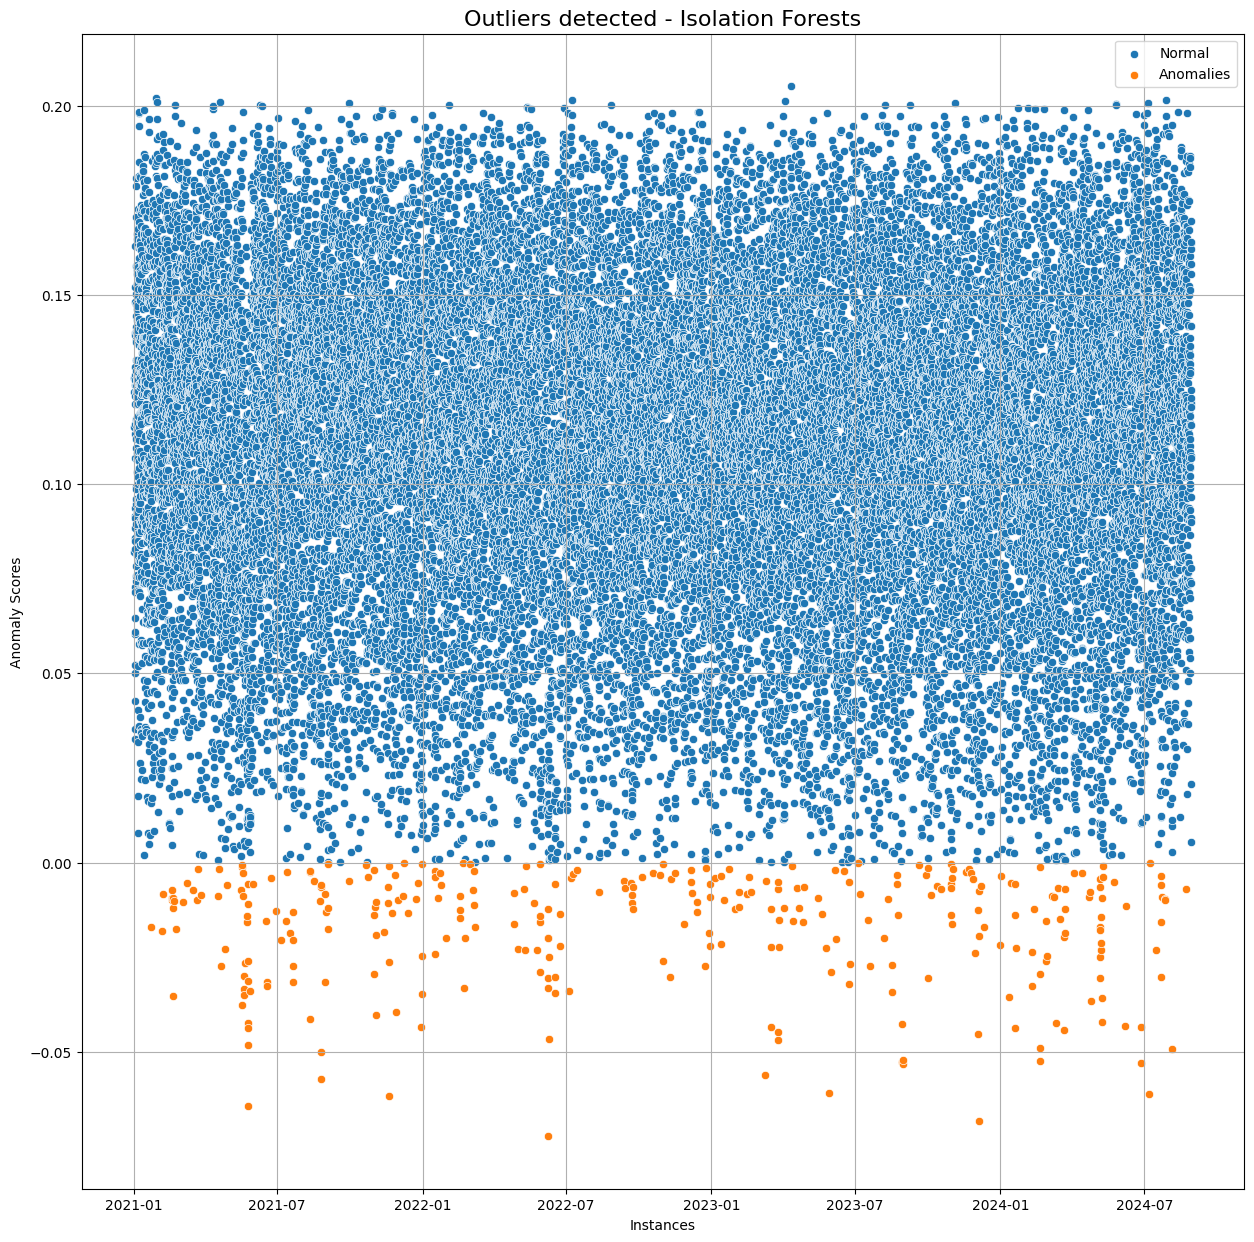

In [19]:
# Identify the normal and outlier readings
normal = iso_data.loc[(iso_data.loc[:, 'anomaly'] == 1), :]
outliers = iso_data.loc[(iso_data.loc[:, 'anomaly'] == -1), :]

# Map the outliers identified
plt.figure(figsize=(15, 15))
sns.scatterplot(normal.loc[:, 'anomaly_scores'], label='Normal')
sns.scatterplot(outliers.loc[:, 'anomaly_scores'], label='Anomalies')
plt.title('Outliers detected - Isolation Forests', fontsize=16)
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Anomaly Scores')
plt.grid(True);

Even when we see that outliers are present, as discussed before, the values of these outliers are still within operational parameters of the features defined in the data descriptors. As such, __no outlier wrangling procedures__ will be carried out due to excessively small number of outliers assumed for the dataset.

These are however, simply preliminary analyses from the raw data and must be kept in mind that the outliers are calculate on the basis of __Tukey's theorem__ for outliers, which assumes that outliers lie beyond the 75th percentile with the whiskers being at 1.5 times the Inter-Quartile Range; any further insights can be seen from the actual EDA after the data has been aggregated. As such, even if we do any sort of outlier analysis, outliers seen in values are due to ground truths having unusual readings, but not 'extreme' values due to error in entries.

Let us plot the __contextual__ information that can be gleaned from the __top 5 outliers__ which would be helpful to an Operations Manager looking at these anomalies. This way, not only would the manager get the anomaly in a feature, but also understand the context behind the presence of that anomaly. Out of the three features we observed with outliers, we will focus on showing the `fuel_consumption_rate` as that has the biggest impact on supply chain planning.

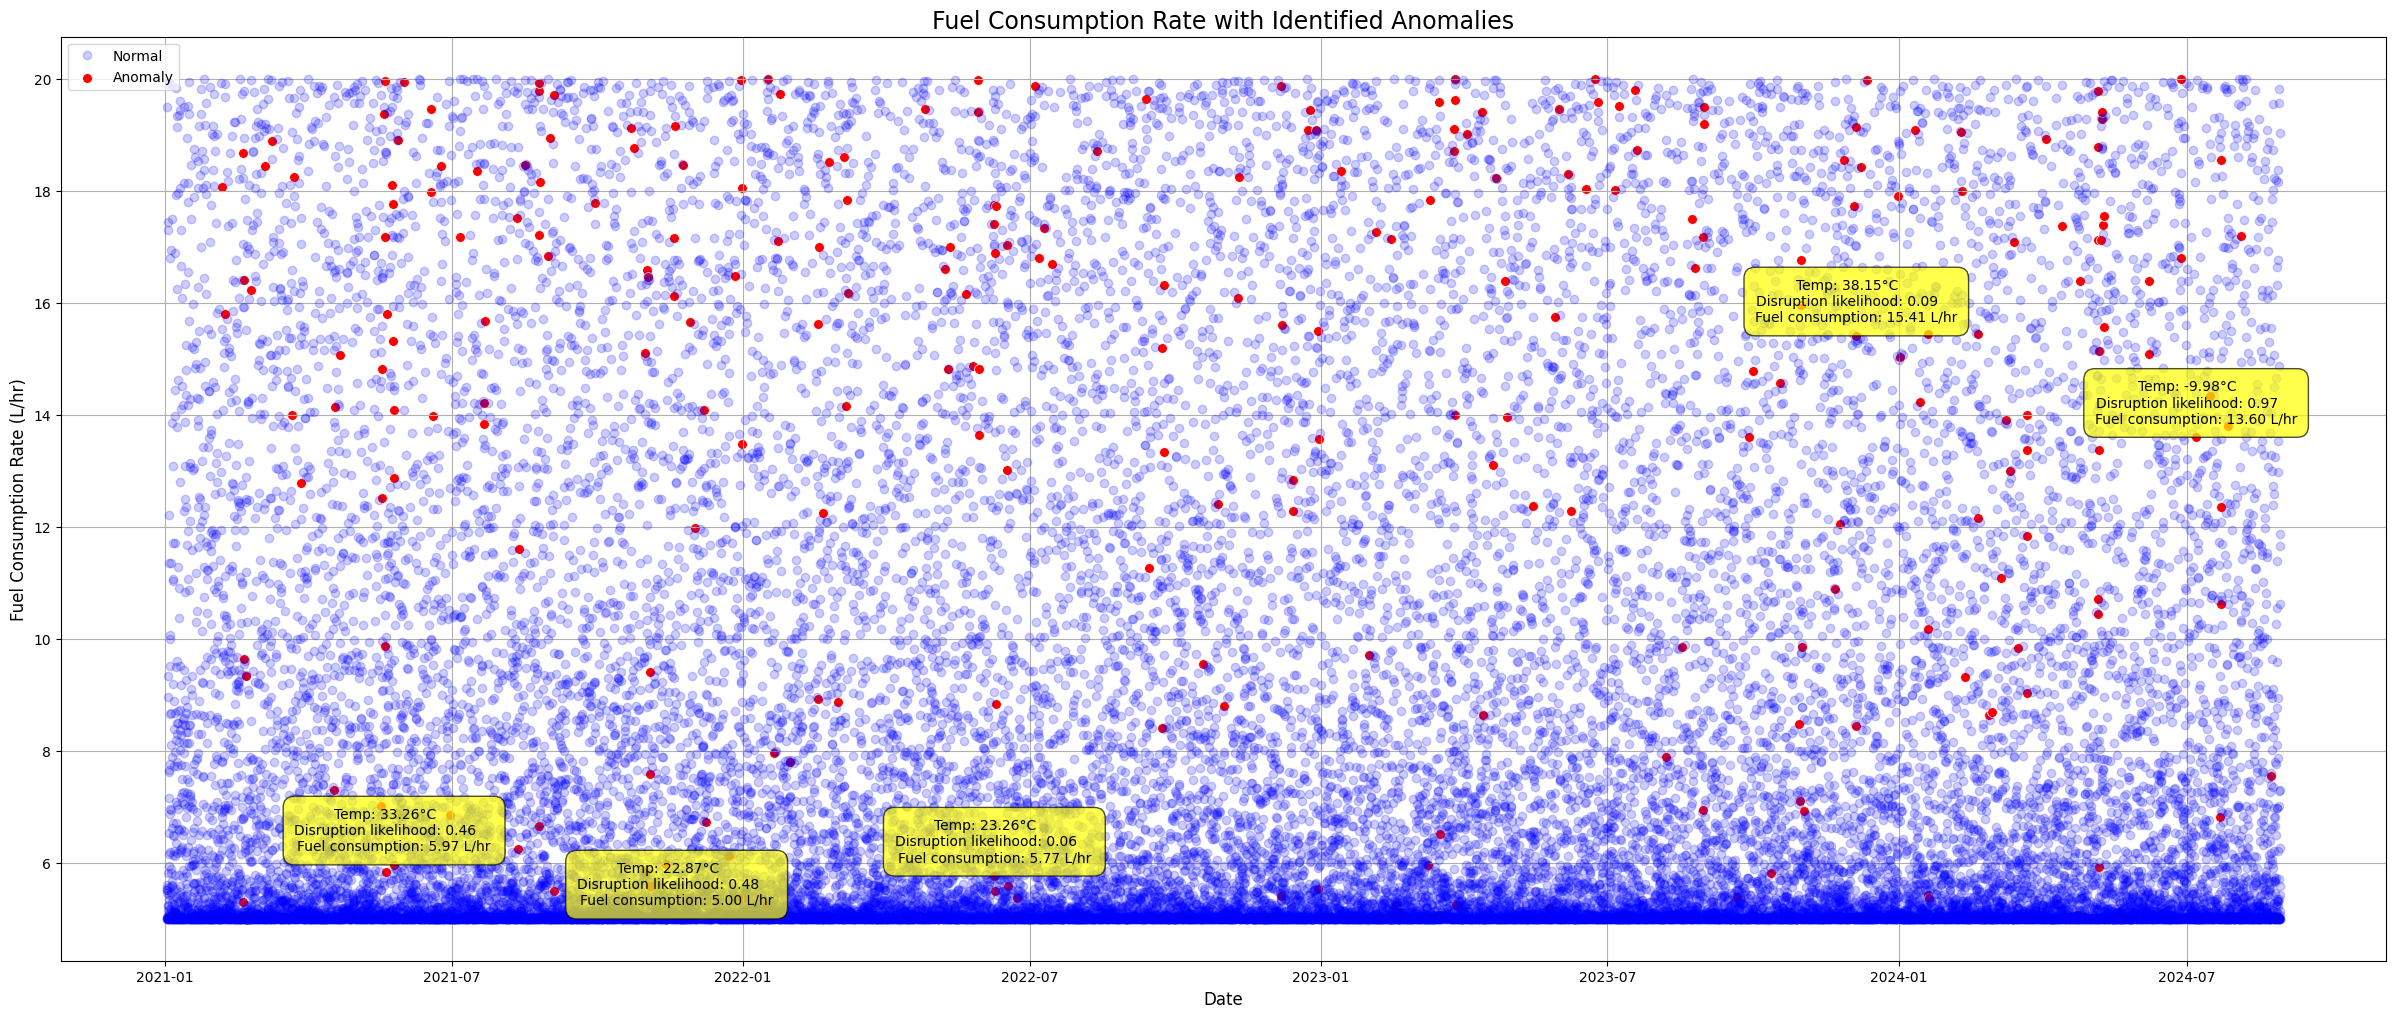

In [20]:
# Plotting the fuel consumption rate
plt.figure(figsize = (30, 12))
plt.plot(normal.index, normal.loc[:, 'fuel_consumption_rate'], 'bo', label='Normal', alpha=0.2)
sns.scatterplot(data=outliers, x=outliers.index, y=outliers.loc[:, 'fuel_consumption_rate'], 
                label='Anomaly', s=50, color='red')

for index, row in outliers.sort_values(by='anomaly_scores', ascending=True)[:5].iterrows():
    text = f"Temp: {row['iot_temperature']:0.2f}°C\
    \nDisruption likelihood: {row['disruption_likelihood_score']:0.2f}\
    \nFuel consumption: {row['fuel_consumption_rate']:0.2f} L/hr"
    plt.annotate(text, (row.name, row['fuel_consumption_rate']),
                textcoords='offset points', xytext=(0, 10),
                ha='center', bbox=dict(boxstyle='round,pad=0.8', fc='yellow', ec='black',
                                       lw=1, alpha=0.7))

plt.title('Fuel Consumption Rate with Identified Anomalies', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fuel Consumption Rate (L/hr)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

From the above anomaly mapping for the top 5 anomaly scores, we can advise the project planner or the Operations Manager to focus on the routes/dates where the temperature recorded seems to be for trucks with __no refrgeration units__ yet had the maximum disruption likelihood score and the fuel consumption rate was the maximum, indicating that either the route taken had disuptions due to traffic jams, or was simply the issue of bad maintenance where the driver was hauling excessive load well beyond the prescribed limit. These are just some of the initial observations that the data can provide, which the management can correct immediately without the use of advanced statistical modelling. Let us now move on to the heart of the projects, viz., the time-series forecasting and classification algorithms.

## **PROJECT A:** <u>Time Series Analysis (Delivery Time Deviation Forecasting)</u>

This phase is dedicated to transforming the raw, high-frequency logistics data into a format suitable for advanced time-series analysis and predictive modelling. Recognizing the inherent noise and computational burden of hourly data, we have systematically aggregated key features and target variables by downsampling it to a day-wise level. This process is crucial for extracting meaningful trends and seasonal patterns, which are vital for effective forecasting for `delivery_time_deviation`. This step ensures our models are not misled by momentary fluctuations and are instead trained on data that accurately reflects daily and weekly operational realities. The resulting dataset will serve as the foundation for our predictive models, providing a streamlined and business-relevant view of the logistics network's performance.

## Time-Series Data Aggregation

For our first stage in Demand Forecasting, we will __downsample__ the timestamped dataset by aggregating the hourly data to __daily__ aggregated values. Keeping the data at an hourly granularity is generally not the best approach for this specific problem due to the following reasons:

- **Noise Reduction**: Hourly data can be very noisy and volatile. Customers place orders at different times of the day for many reasons, not all of which are meaningful for long-term trends. Aggregating the data smooths out this noise, making it easier to identify the underlying trends and seasonality; making any system too responsive will also contribute to making it volatile, and will be forced to become a 'reactive' system, rather than a 'predictive' system which is more stable and easier to control.

- **Seasonality**: While we have hourly seasonality (e.g., more orders during the day than at night), most strategic and tactical business decisions (like inventory management) are made on a daily, weekly, or monthly basis. Aggregating to these levels will reveal more significant, practical and actionable patterns, such as a spike in demand on weekends or during the end of the month; this will also help prevent excessive demand fluctuations and bull-whip effects.

For the rest of the project, we will aggregate the readings into daily readings based on the nature of the column, such as count-based readings being aggregated using the `sum` of all the hourly values, and so on. Also, since we will be conducting SARIMAX modelling, we will conduct the aggregation for _all_ the features, and __only the target variable `delivery_time_deviation`__ as shown below. This dataset is what will be used for our SARIMAX modelling.

In [21]:
# Checking the columns of the dataset for the first phase project
forecast_del.columns

Index(['fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'delivery_time_deviation'],
      dtype='object')

In [22]:
# Downsample the dataset to have day-wise aggregations
daywise_orders = forecast_del.resample('D').agg({
    'historical_demand': 'sum',
    'warehouse_inventory_level': 'sum',
    'handling_equipment_availability': 'mean',
    'fuel_consumption_rate': 'mean',
    'shipping_costs': 'mean',
    'supplier_reliability_score': 'mean',
    'driver_behavior_score': 'mean',
    'fatigue_monitoring_score': 'mean',
    'eta_variation_hours': 'mean',
    'loading_unloading_time': 'mean',
    'lead_time_days': 'mean',
    'customs_clearance_time': 'mean',
    'delay_probability': 'mean',
    'route_risk_level': 'mean',
    'traffic_congestion_level': 'max',
    'weather_condition_severity': 'max',
    'port_congestion_level': 'max',
    'iot_temperature': 'mean',
    'cargo_condition_status': 'mean',
    'order_fulfillment_status': 'mean',
    'disruption_likelihood_score': 'mean',
    'delivery_time_deviation': 'mean',
})

daywise_orders

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  delay_probability  route_risk_level  \
timestamp                           ...                                        
2021-01-01                2.540595  ...           0.659014          6.777202   
2021-01-02                2.321280  ...           0.738776          7.373138   
2021-01-03                2.642499  ...           0.727337          6.605774   
2021-01-04                2.551933  ...           0.731175          6.34

In [23]:
# Check for aggregated dataset
daywise_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337 entries, 2021-01-01 to 2024-08-29
Freq: D
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   historical_demand                1337 non-null   float64
 1   warehouse_inventory_level        1337 non-null   float64
 2   handling_equipment_availability  1337 non-null   float64
 3   fuel_consumption_rate            1337 non-null   float64
 4   shipping_costs                   1337 non-null   float64
 5   supplier_reliability_score       1337 non-null   float64
 6   driver_behavior_score            1337 non-null   float64
 7   fatigue_monitoring_score         1337 non-null   float64
 8   eta_variation_hours              1337 non-null   float64
 9   loading_unloading_time           1337 non-null   float64
 10  lead_time_days                   1337 non-null   float64
 11  customs_clearance_time           1337 non-null   float64

In [24]:
# Check for 5-number summary of the aggregated readings
daywise_orders.describe().T

count           mean           std  \
historical_demand                1337.0  144424.436220  17309.622506   
warehouse_inventory_level        1337.0    7176.965589   1650.426911   
handling_equipment_availability  1337.0       0.302827      0.067707   
fuel_consumption_rate            1337.0       8.009576      0.884832   
shipping_costs                   1337.0     459.190136     63.213690   
supplier_reliability_score       1337.0       0.501038      0.072825   
driver_behavior_score            1337.0       0.498732      0.071762   
fatigue_monitoring_score         1337.0       0.600986      0.071663   
eta_variation_hours              1337.0       2.893910      0.457148   
loading_unloading_time           1337.0       2.291609      0.323387   
lead_time_days                   1337.0       5.226804      0.926154   
customs_clearance_time           1337.0       2.296320      0.322773   
delay_probability                1337.0       0.699292      0.068797   
route_risk_level                 1337.0       6.997640      0.694547   
traffic_congestion_level         1337.0       9.926392      0.162327   
weather_condition_severity       1337.0       0.991818      0.016001   
port_congestion_level            1337.0       9.995804      0.063854   
iot_temperature                  1337.0       0.058233      2.975094   
cargo_condition_status           1337.0       0.297697      0.066860   
order_fulfillment_status         1337.0       0.601016      0.070603   
disruption_likelihood_score      1337.0       0.803794      0.056170   
delivery_time_deviation          1337.0       5.175442      0.844436   

                                         min            25%            50%  \
historical_demand                9742.624803  133193.434663  144504.105920   
warehouse_inventory_level          16.669708    6081.148178    7191.616173   
handling_equipment_availability     0.111353       0.255964       0.298613   
fuel_consumption_rate               5.000046       7.397194       7.959796   
shipping_costs                    202.229823     417.414100     459.632603   
supplier_reliability_score          0.227939       0.450357       0.502661   
driver_behavior_score               0.263892       0.450836       0.497442   
fatigue_monitoring_score            0.371256       0.553625       0.602860   
eta_variation_hours                 1.245473       2.592137       2.926316   
loading_unloading_time              1.300874       2.078501       2.275582   
lead_time_days                      2.241326       4.554626       5.195056   
customs_clearance_time              1.490215       2.064555       2.290714   
delay_probability                   0.468544       0.654897       0.702503   
route_risk_level                    2.112655       6.551882       7.000145   
traffic_congestion_level            7.156608       9.923722       9.981403   
weather_condition_severity          0.839800       0.991632       0.998067   
port_congestion_level               7.693643       9.998958       9.999900   
iot_temperature                    -7.578492      -2.056074      -0.056838   
cargo_condition_status              0.099238       0.251482       0.295468   
order_fulfillment_status            0.408762       0.551590       0.602199   
disruption_likelihood_score         0.589020       0.764709       0.807051   
delivery_time_deviation             2.099656       4.602679       5.181495   

                                           75%            max  
historical_demand                155854.914870  195415.964427  
warehouse_inventory_level          8205.377923   12803.193904  
handling_equipment_availability       0.348681       0.562390  
fuel_consumption_rate                 8.574819      11.024081  
shipping_costs                      501.130927     697.032287  
supplier_reliability_score            0.551747       0.762965  
driver_behavior_score                 0.546825       0.974045  
fatigue_monitoring_score              0.649797       0.813714  
eta_va

Similar to the original preliminary observations, we can see that the distribution of the aggregated data is such that for the features aggregated on the basis of their average, their _mean_ does not vary much from the _median_ of the features, indicating that the data already has a __normal Gaussian__ distribution, meaning most of the assumptions on statistical analysis techniques will hold true on these feature sets. The features aggreagated with the maximum however, have __extrememly skewed__ distributions. 

For now, we can split the dataset into features and the target variable, and check for any other distribution characteristics.  Since we are working with time-stamped data, we will try to maintain the integrity while conducting their EDA, both univariate and multivariate. Before we do so however, we will try to split the dataset into features and the target variable as below.

In [25]:
# Spliting the dataset into features and target
target = daywise_orders.loc[:, 'delivery_time_deviation']
feat = daywise_orders.drop(columns='delivery_time_deviation')

display(feat)
display(target)

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  customs_clearance_time  \
timestamp                           ...                           
2021-01-01                2.540595  ...                2.235946   
2021-01-02                2.321280  ...                1.880268   
2021-01-03                2.642499  ...                1.840277   
2021-01-04                2.551933  ...                2.496738   
2021-01-05                1.902655  ...                2.336704   
...

timestamp
2021-01-01    5.629205
2021-01-02    5.897185
2021-01-03    5.165200
2021-01-04    5.478182
2021-01-05    4.698579
                ...   
2024-08-25    2.698435
2024-08-26    4.289387
2024-08-27    4.525422
2024-08-28    4.188722
2024-08-29    2.099656
Freq: D, Name: delivery_time_deviation, Length: 1337, dtype: float64

#### <u>Univariate EDA</u>

Although we know the data has uniform distribution due to the closeness of the mean and median of the features, we will still try to plot the univariate spread of the same features to confirm out assumptions. The histograms providing the distribution analysis is as follows.

<Figure size 640x480 with 0 Axes>

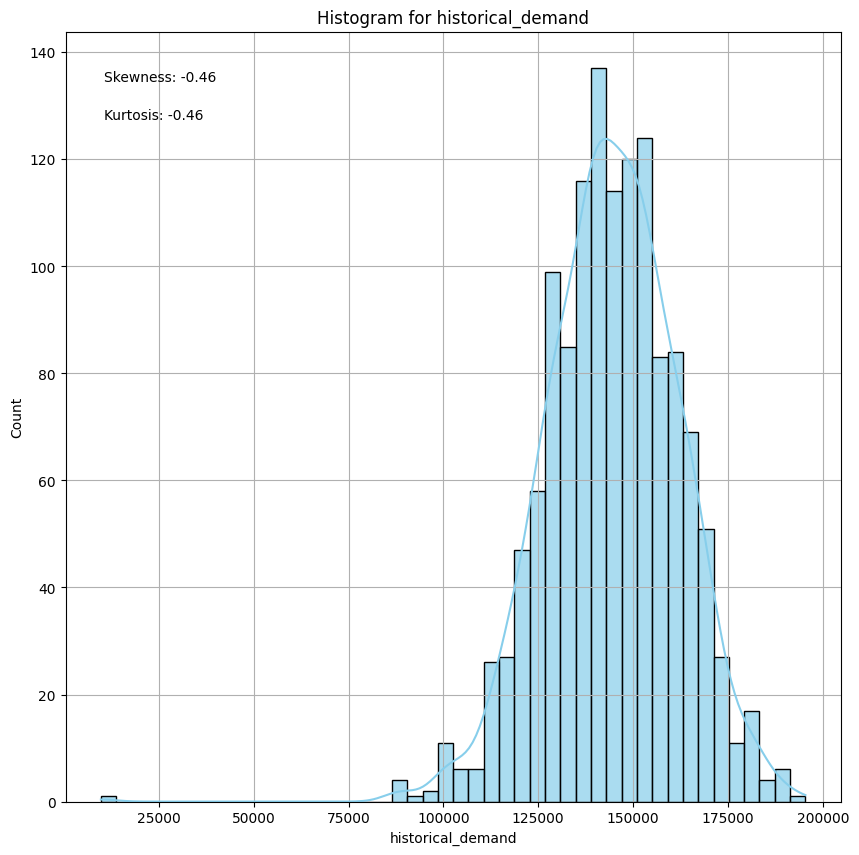

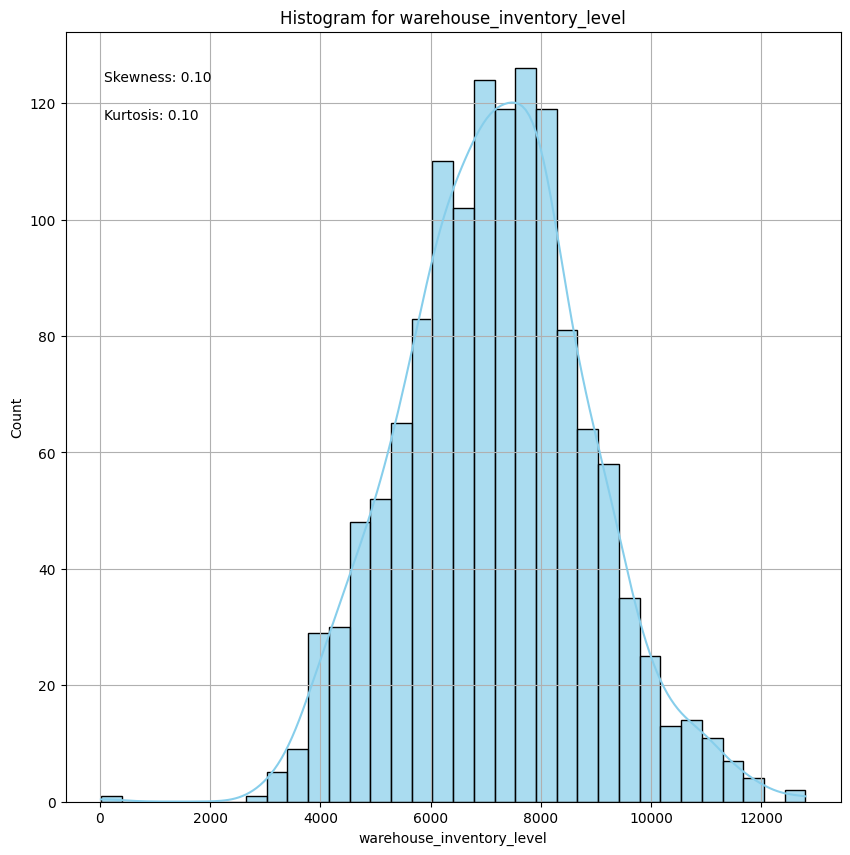

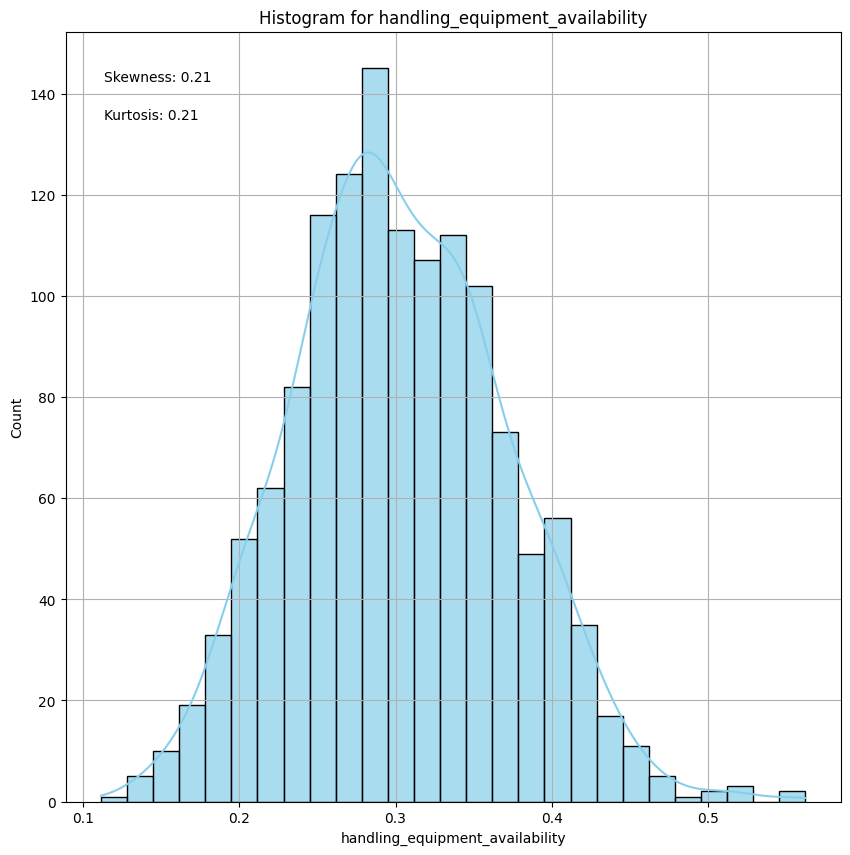

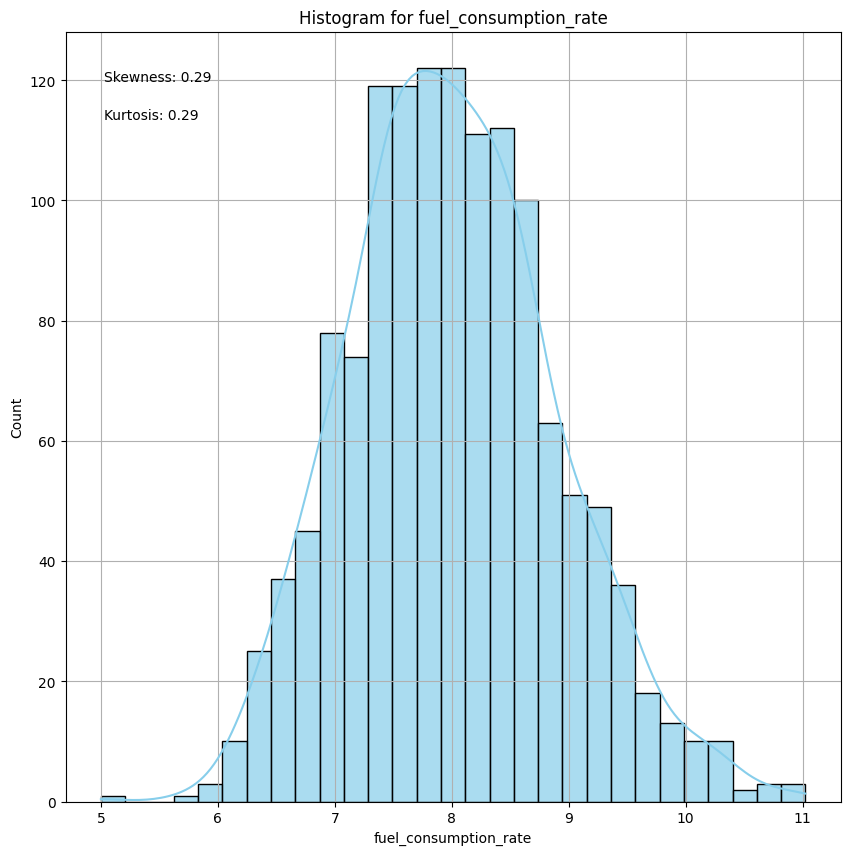

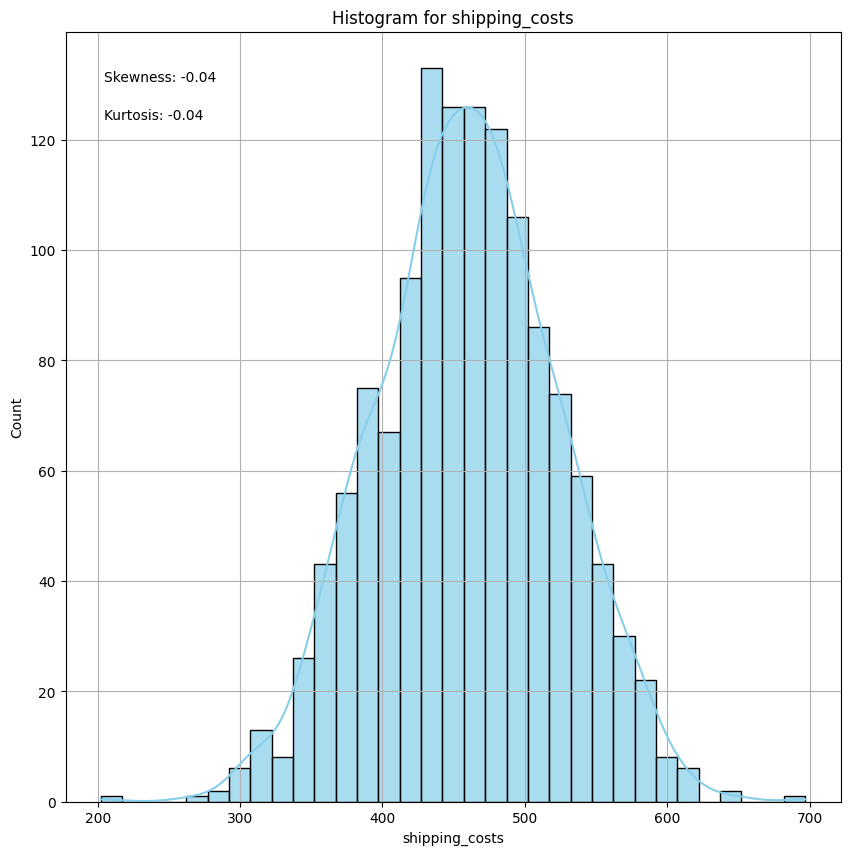

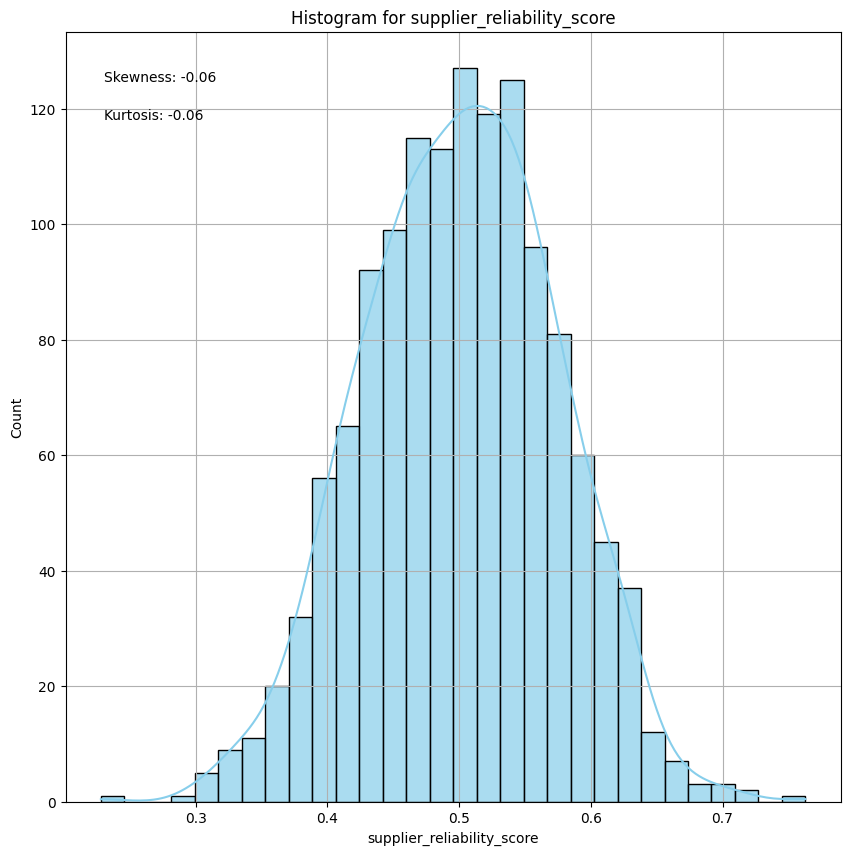

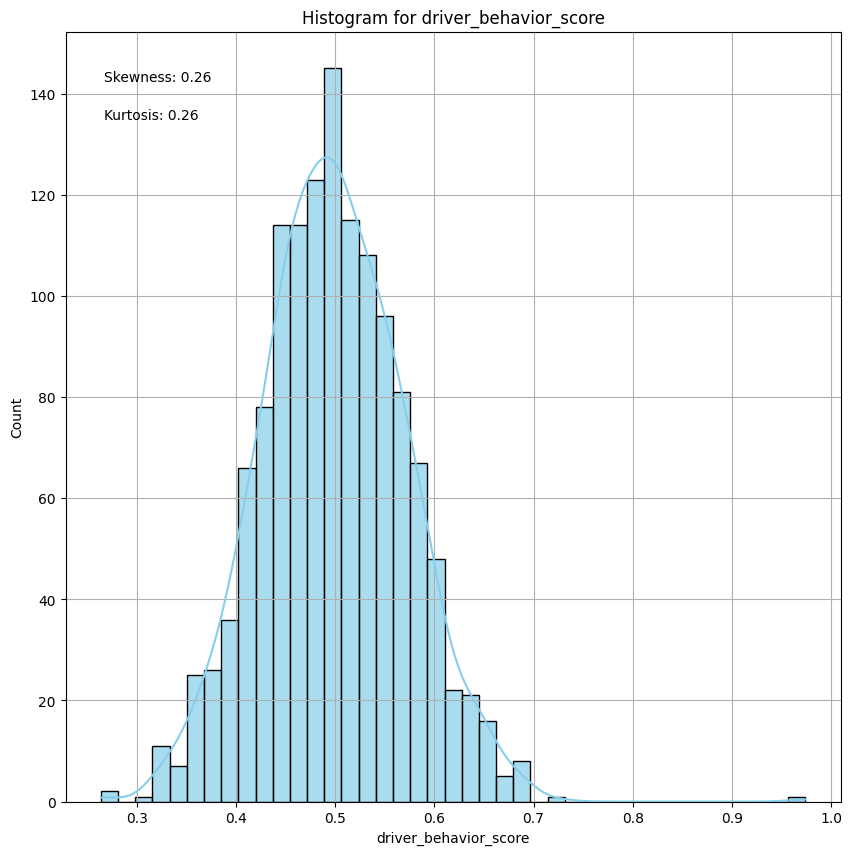

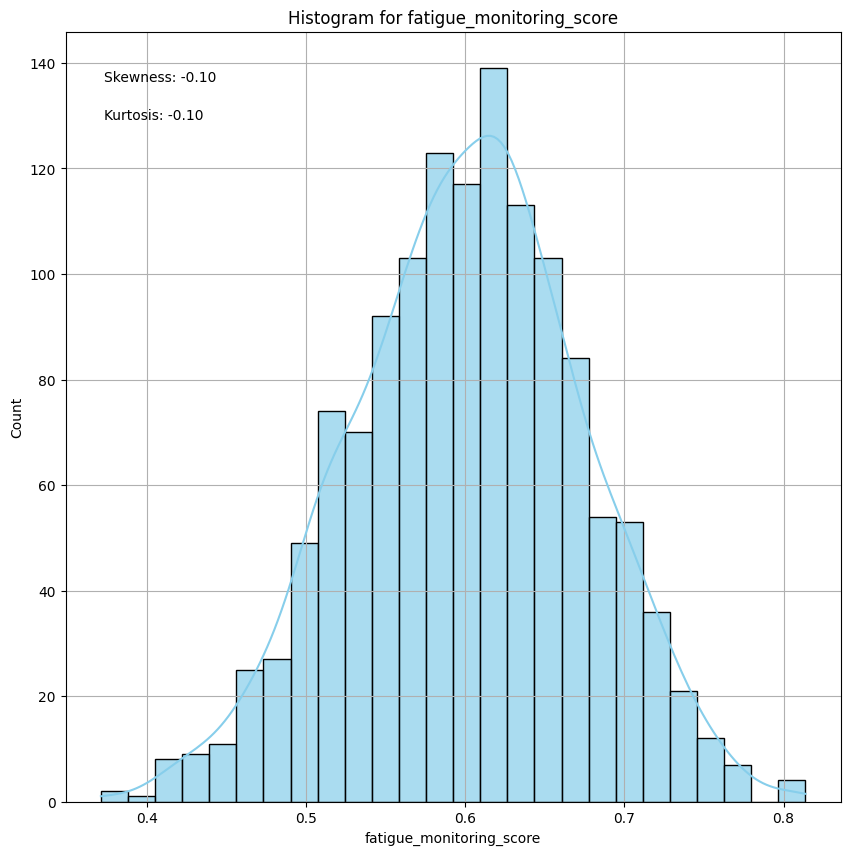

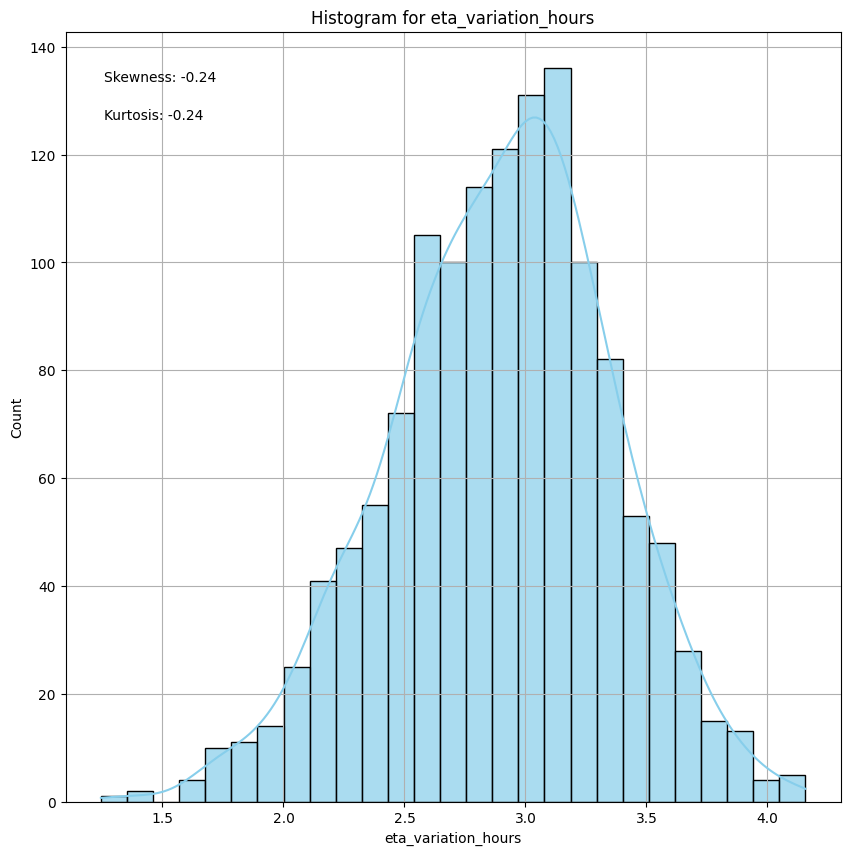

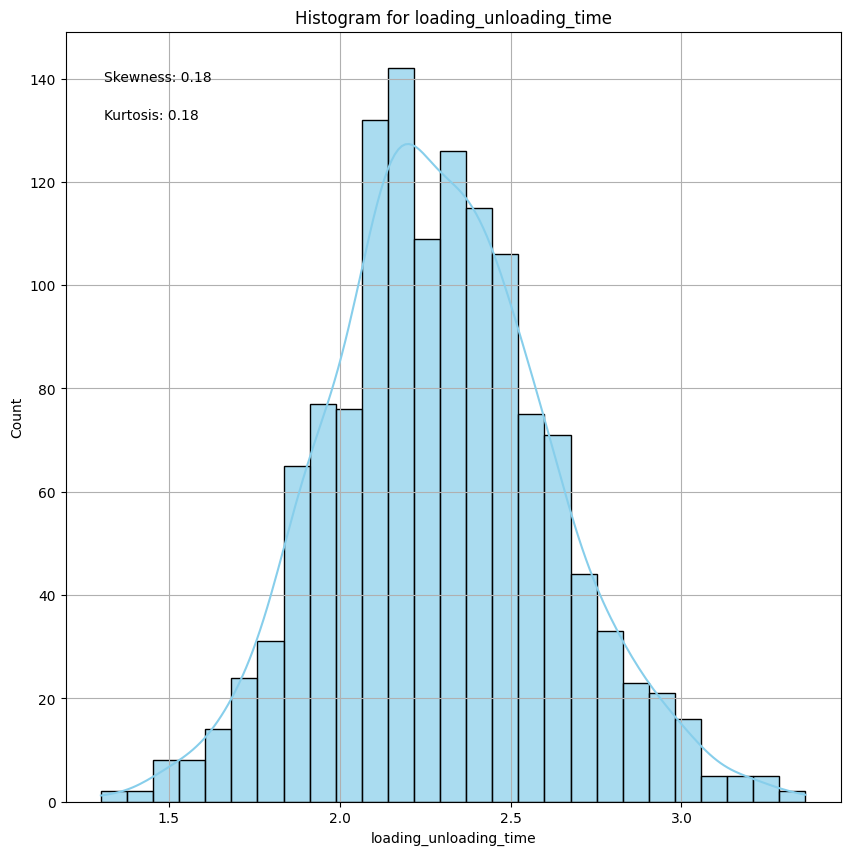

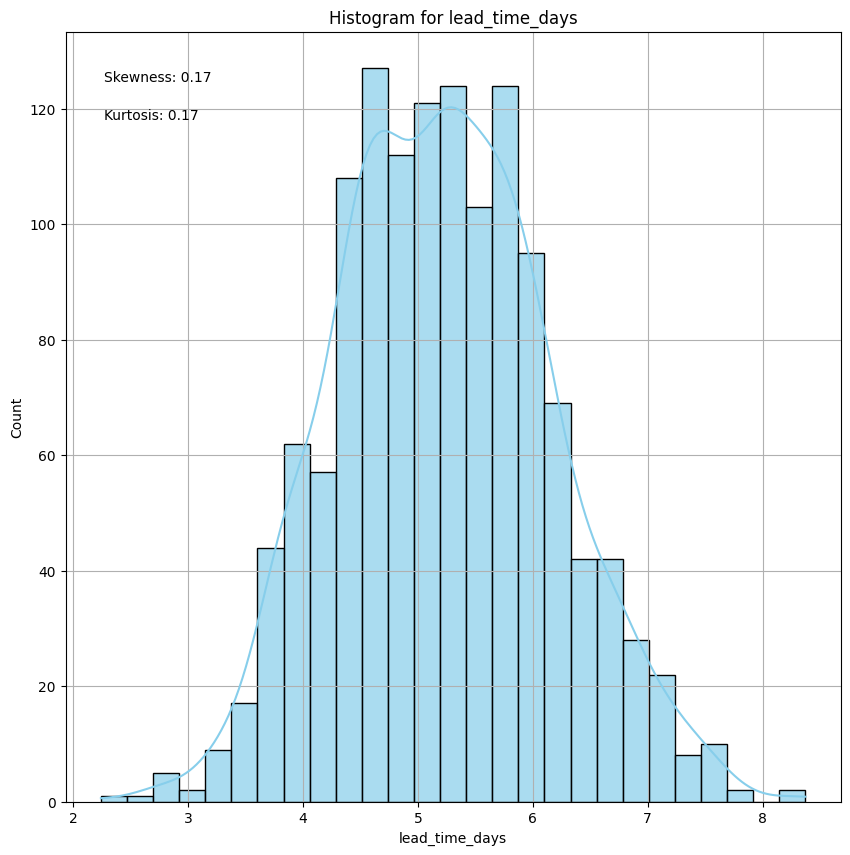

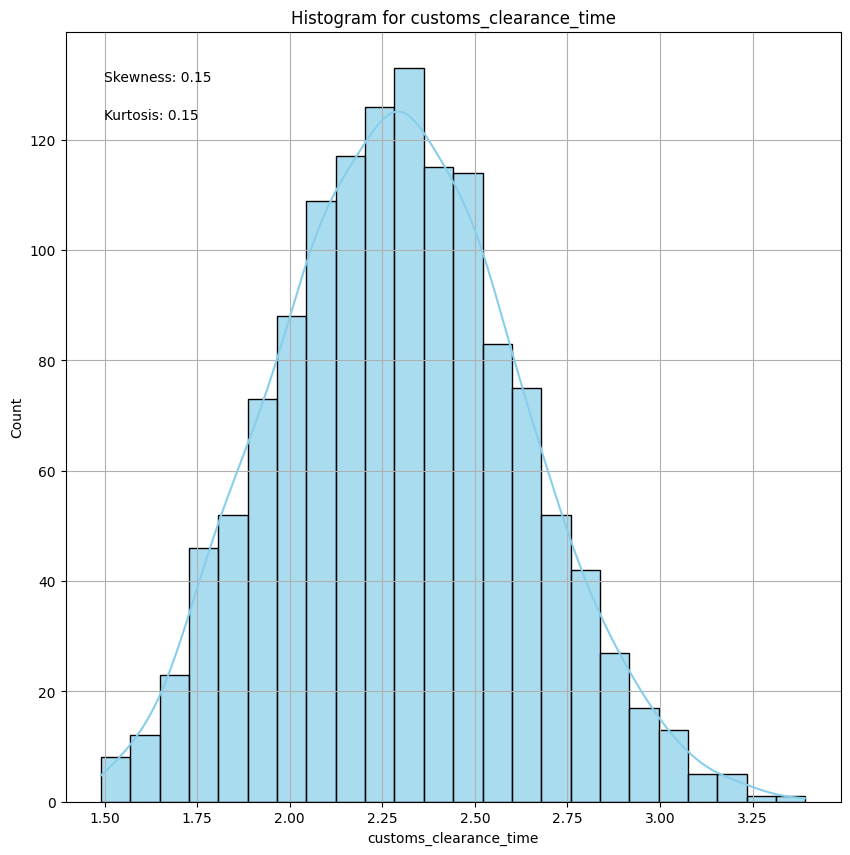

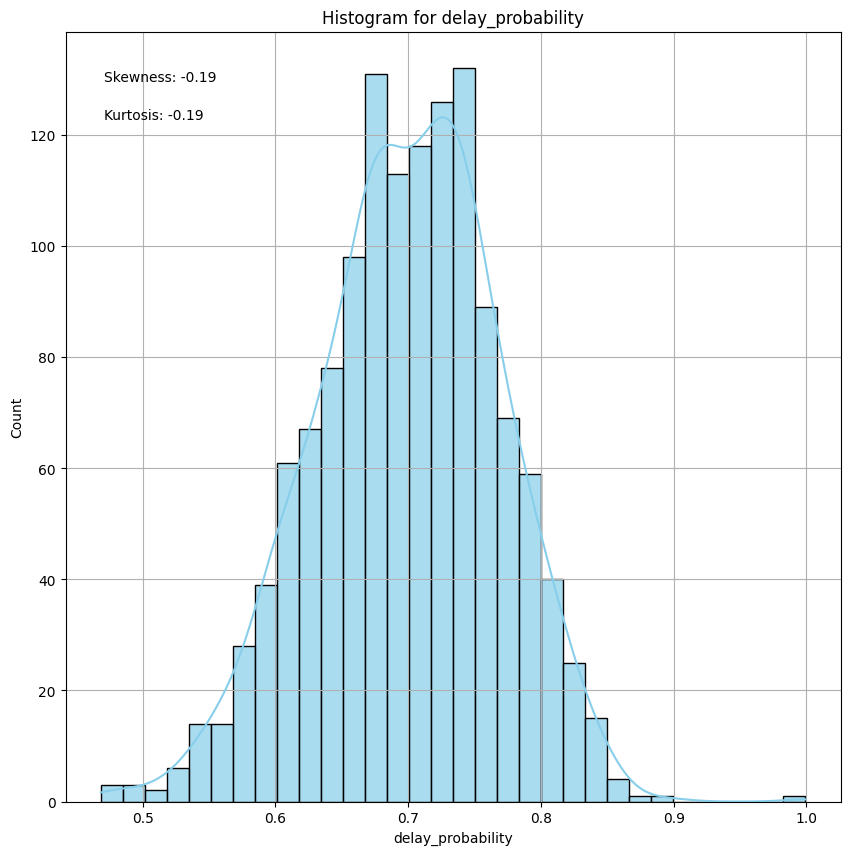

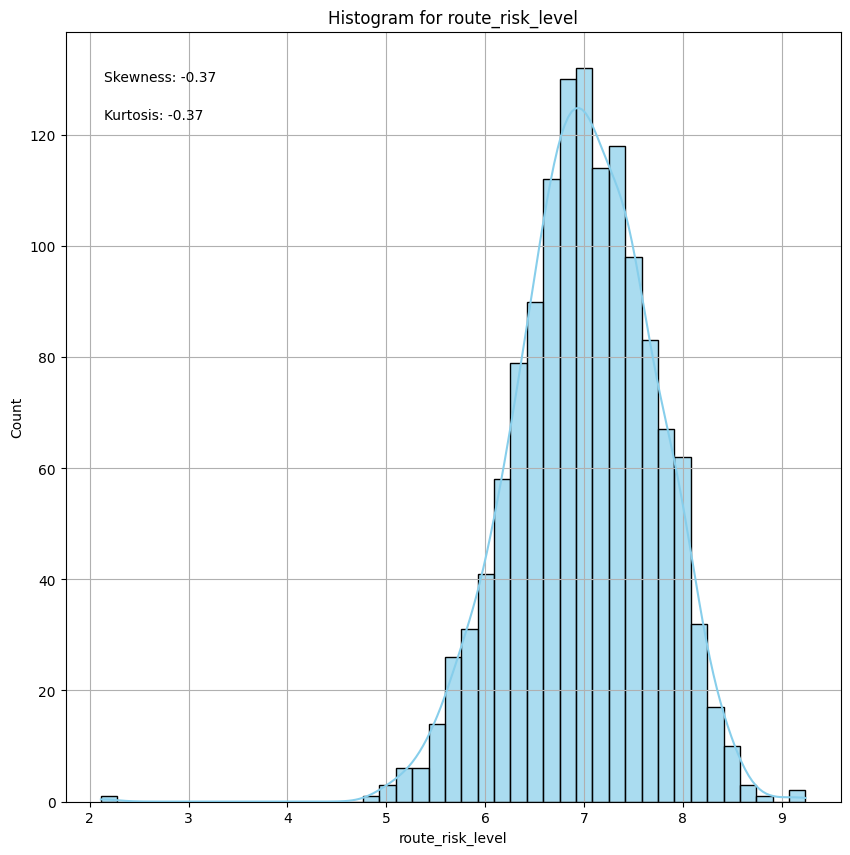

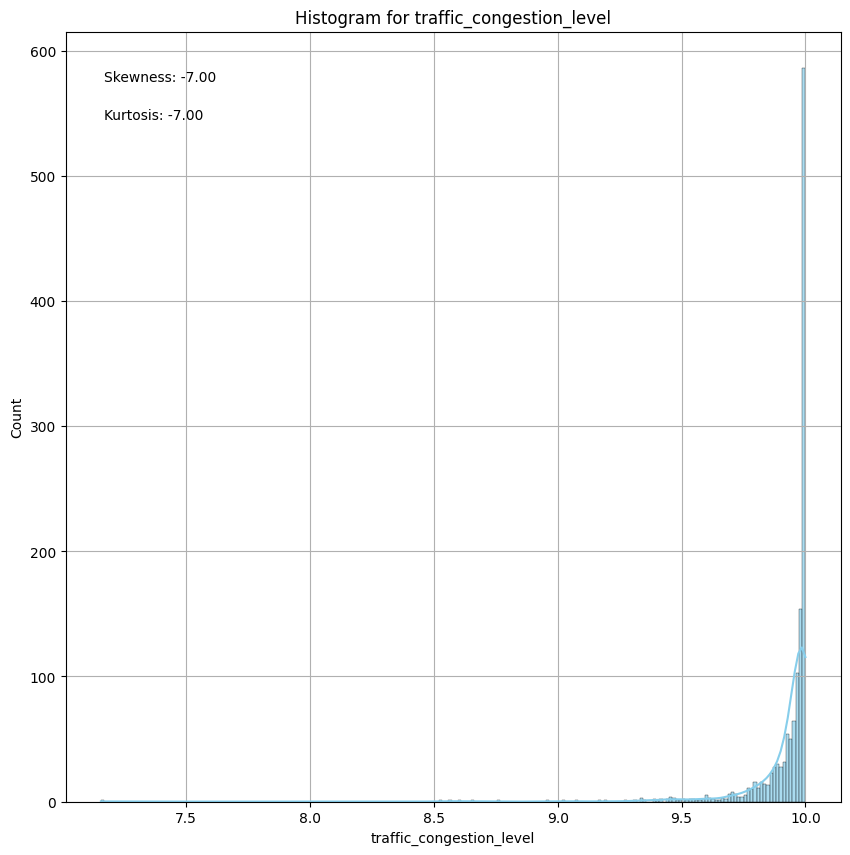

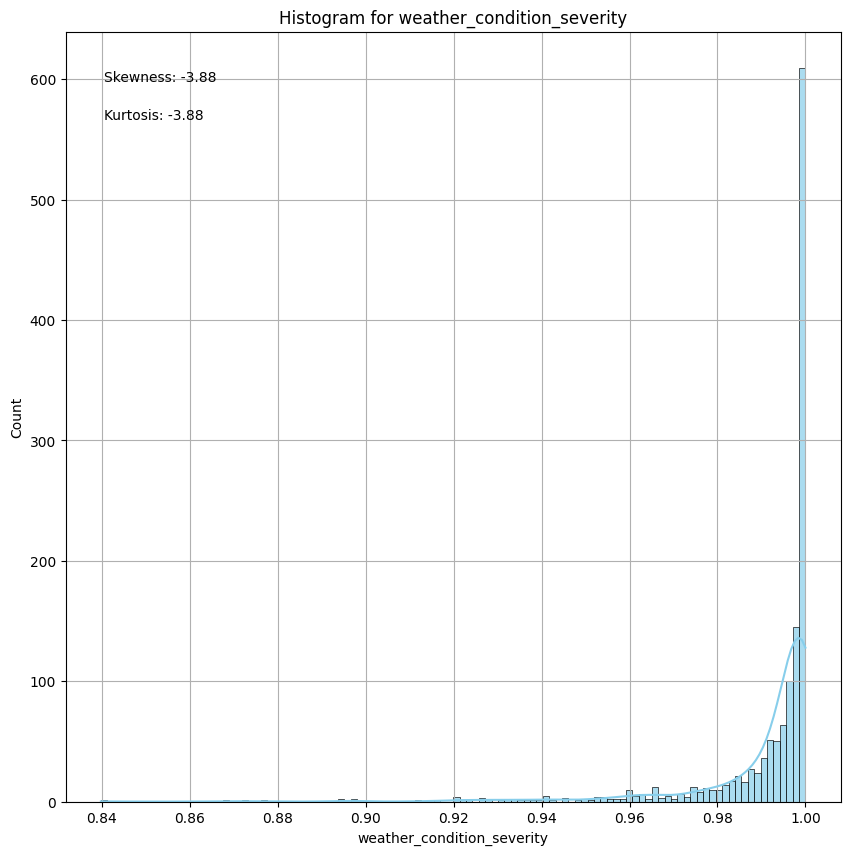

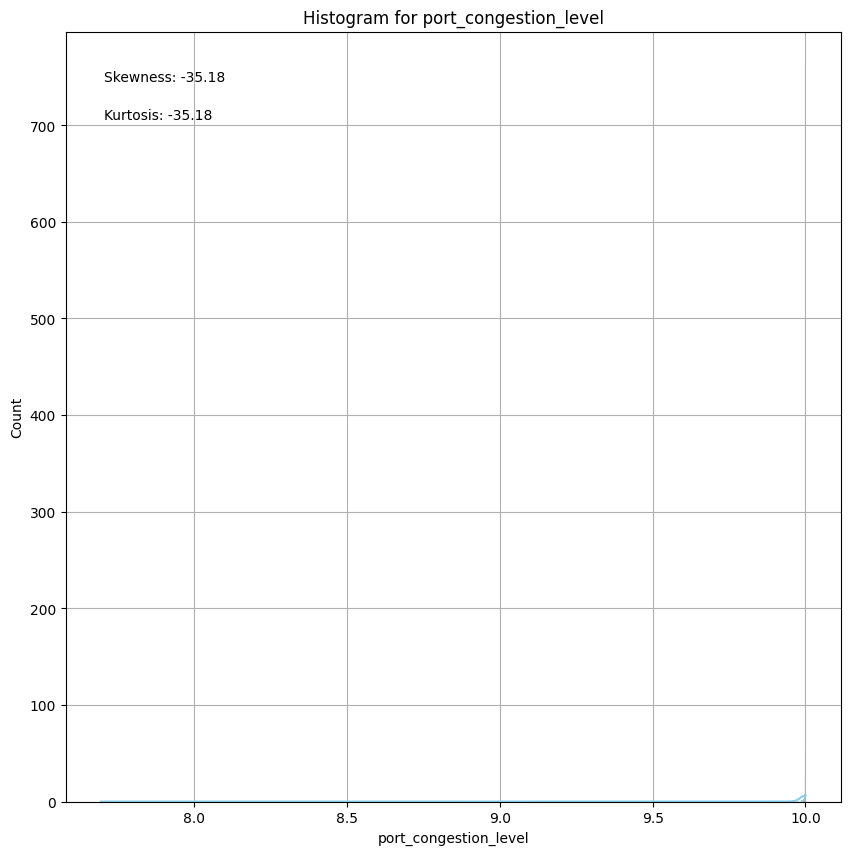

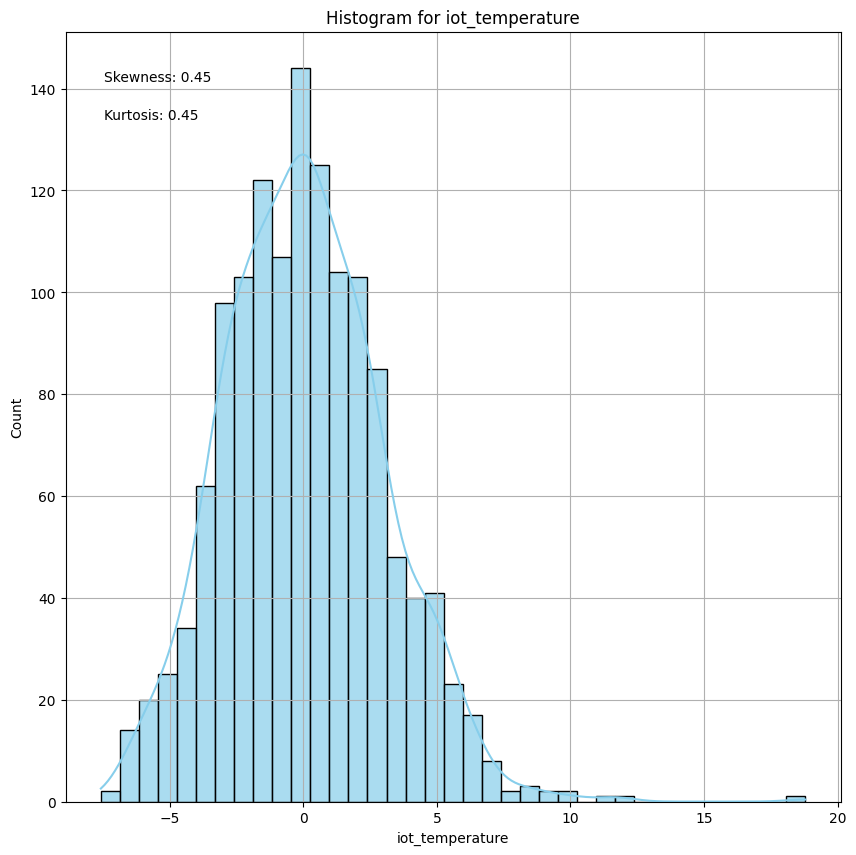

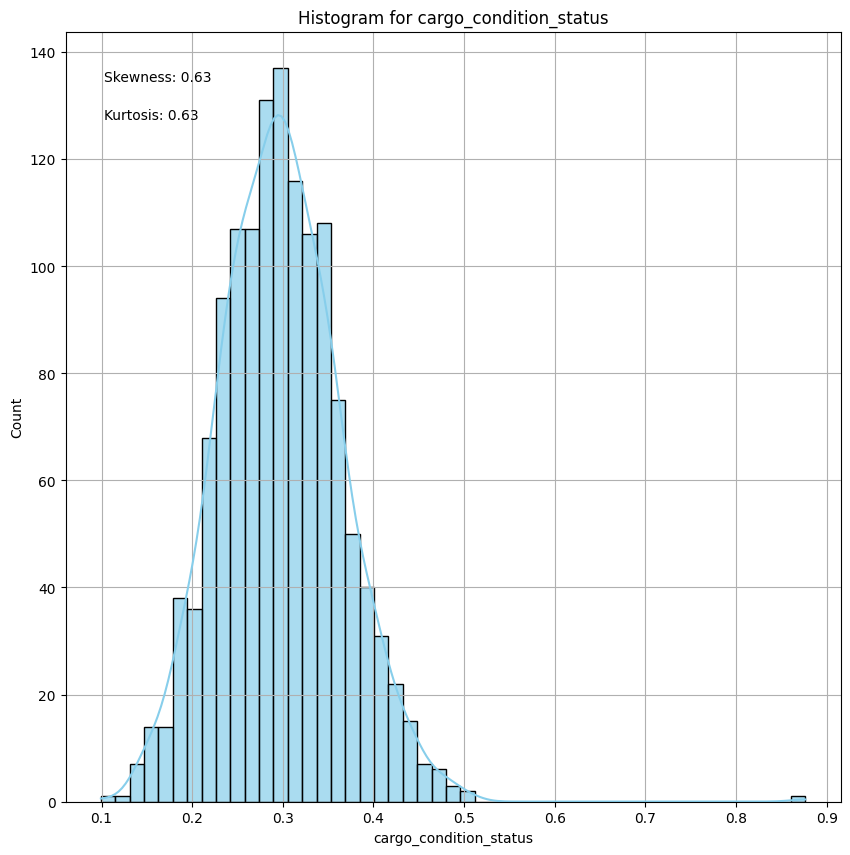

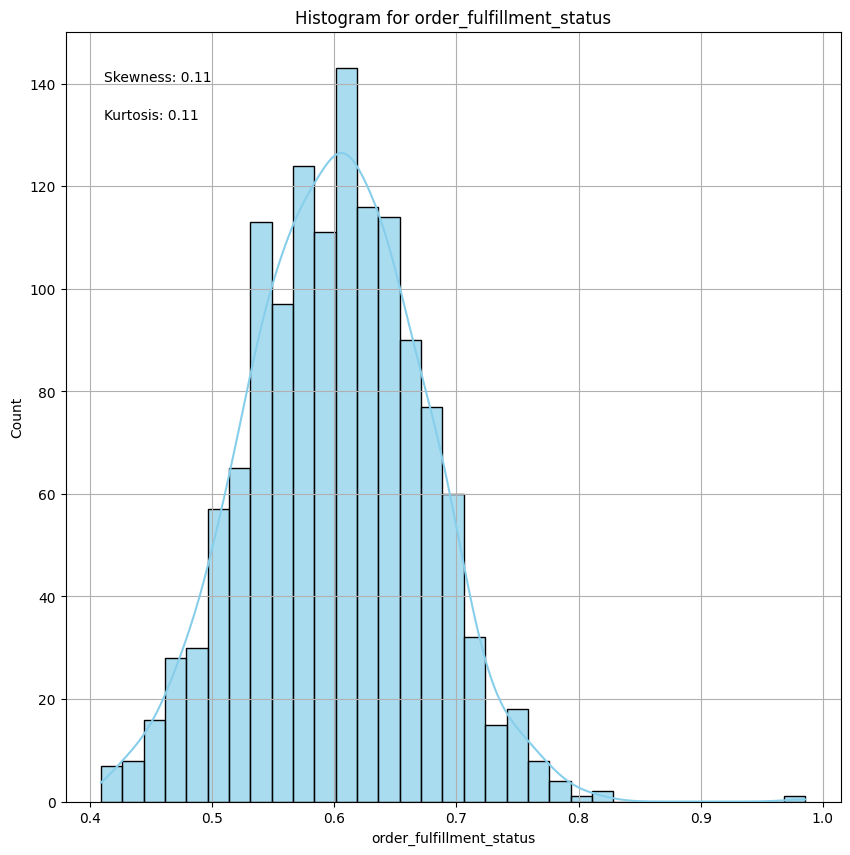

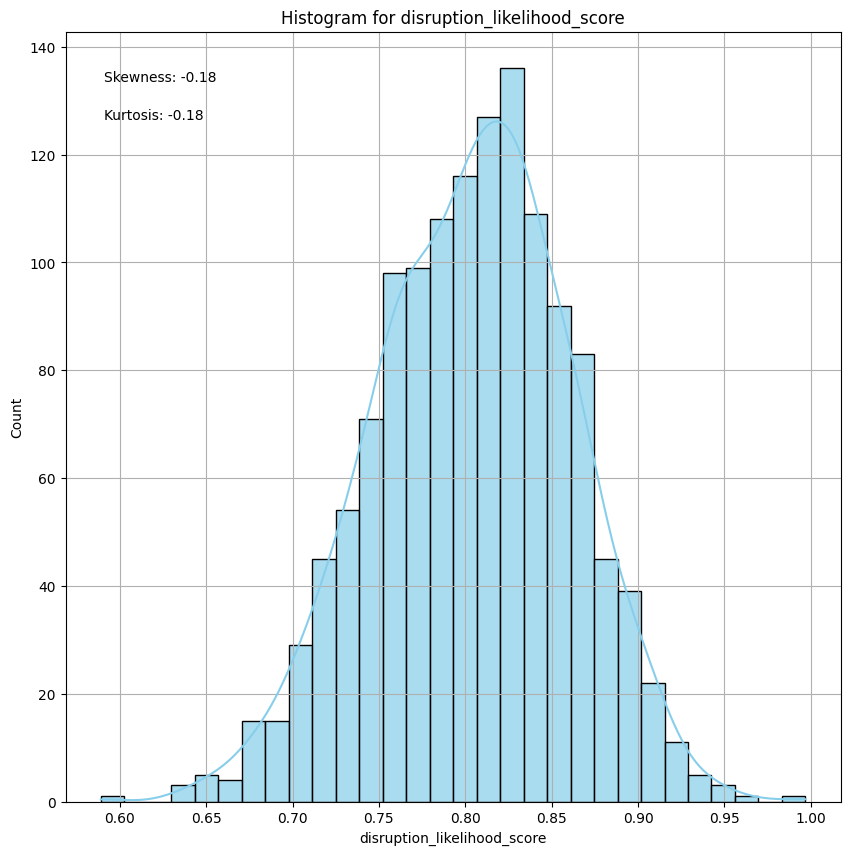

In [26]:
# Plotting the columns
plt.suptitle('Distribution Analysis of Features', fontsize=17)
for i in feat.columns:
    plt.figure(figsize=(10, 10))
    sns.histplot(feat.loc[:, i], kde=True, color='skyblue', alpha=0.7)
    plt.title(f'Histogram for {i}', fontsize=12)
    plt.text(0.05, 0.95, f'Skewness: {feat.loc[:, i].skew():.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.90, f'Kurtosis: {feat.loc[:, i].skew():.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
    plt.grid();

plt.show();

#### <u>Mutlivariate EDA</u>

Due to the presence of so many features, it will be impossible to plot their plots and make sense of their relationships with one another. As such, we will plot their correlation matrices using the Pearson Correlation Coefficient; their common time-stamped indices will ensure they are using the observations from the same readings or time-frames as follows.

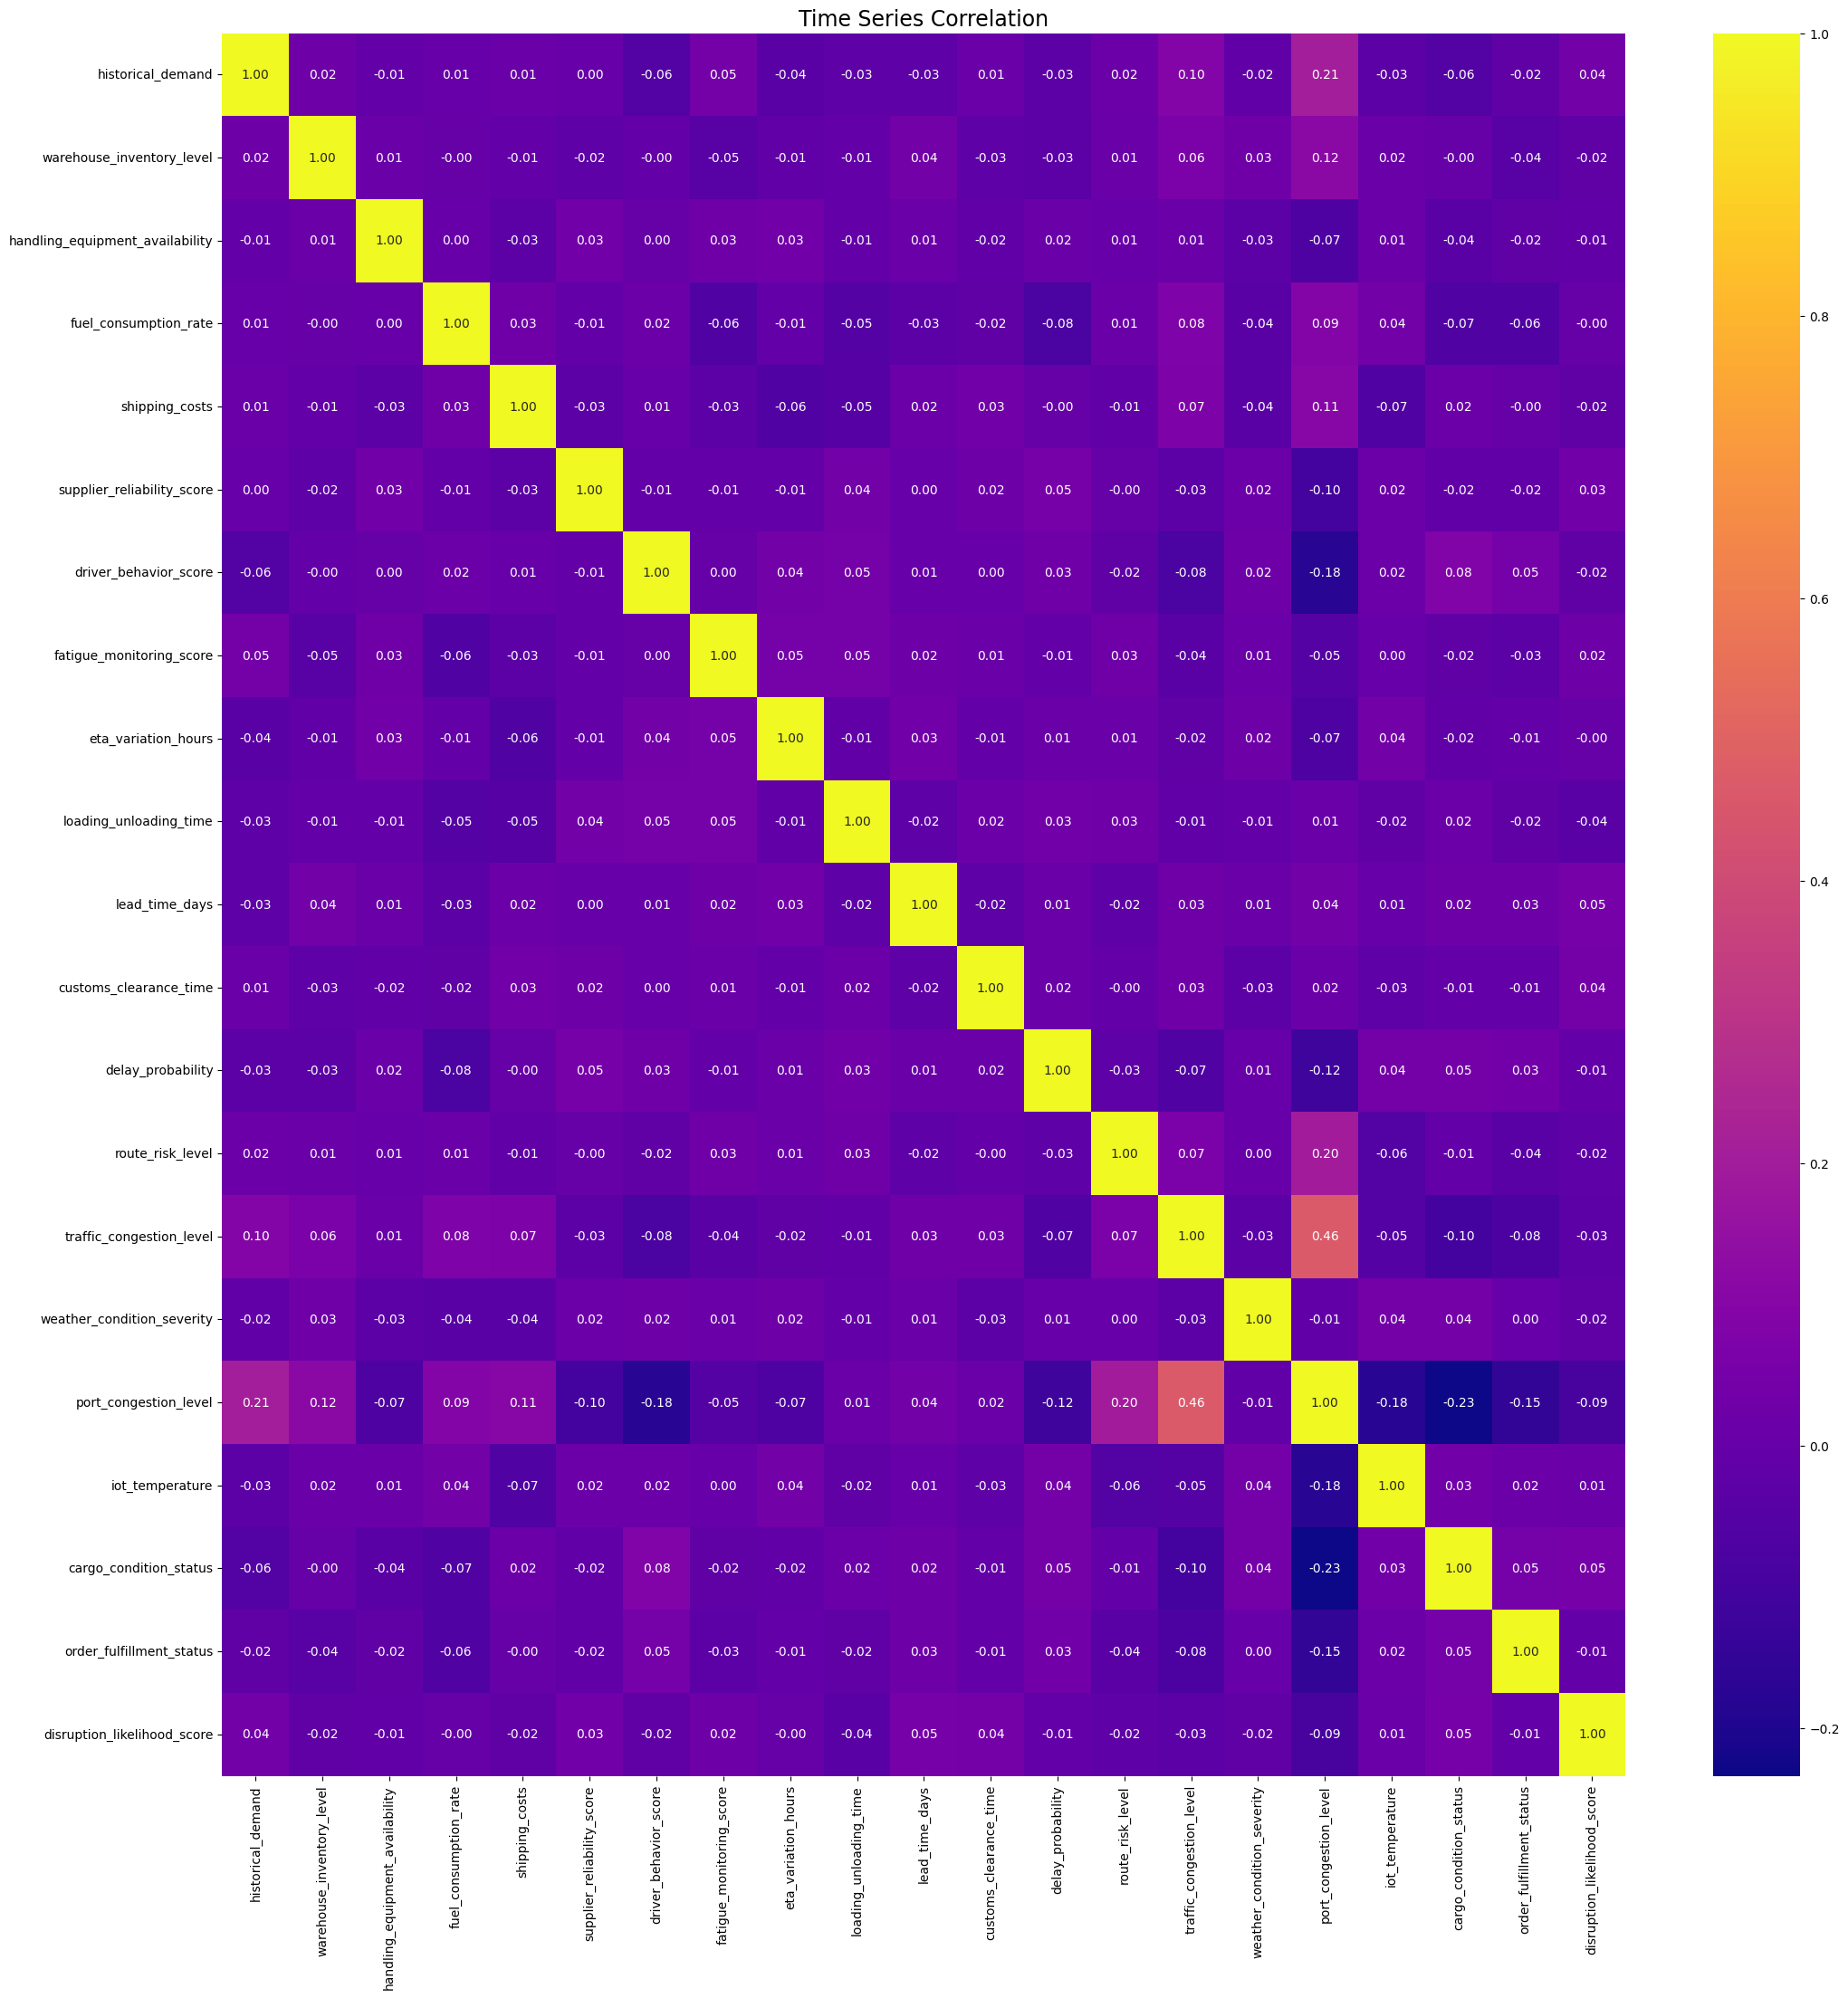

In [27]:
# Plotting the correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(feat.corr(), cmap='plasma', fmt='0.2f', annot=True, cbar=True)
plt.title('Time Series Correlation', fontsize=17);

From the above correlation coefficients, we can understand that the only moderate correlation is between `port_congestion_level` and `traffic_congestion_level` indicating that they have some level of influence on each other; it seems that the level of congestion at the port and in traffic seem to occur due to high amounts of choke up in routes. This may be caused by slow loading times, which in turn cause a lot of traffic to be backed up, which in turn increases the congestion at the port as many vehicles may be breaking the line to reduce the loading times. However, looking at the correlation matrix as a whole, it seems that apart from the two variables identified, there seems to be __very weak__ correlation with each other, and we can thus safely conclude that we __do not require__ any form of _feature engineering_ (such as feature dropping, among others) As such, all the features will be considered for our model.

## <b>Time Series Analysis</b>

With the dataset now having undergone feature analysis to help represent the underlying processes in supply chain operations and their performance features, we can now conduct time series analysis for our target variable separately and help predict the future delivery time deviation performance based on the operations related to each feature.

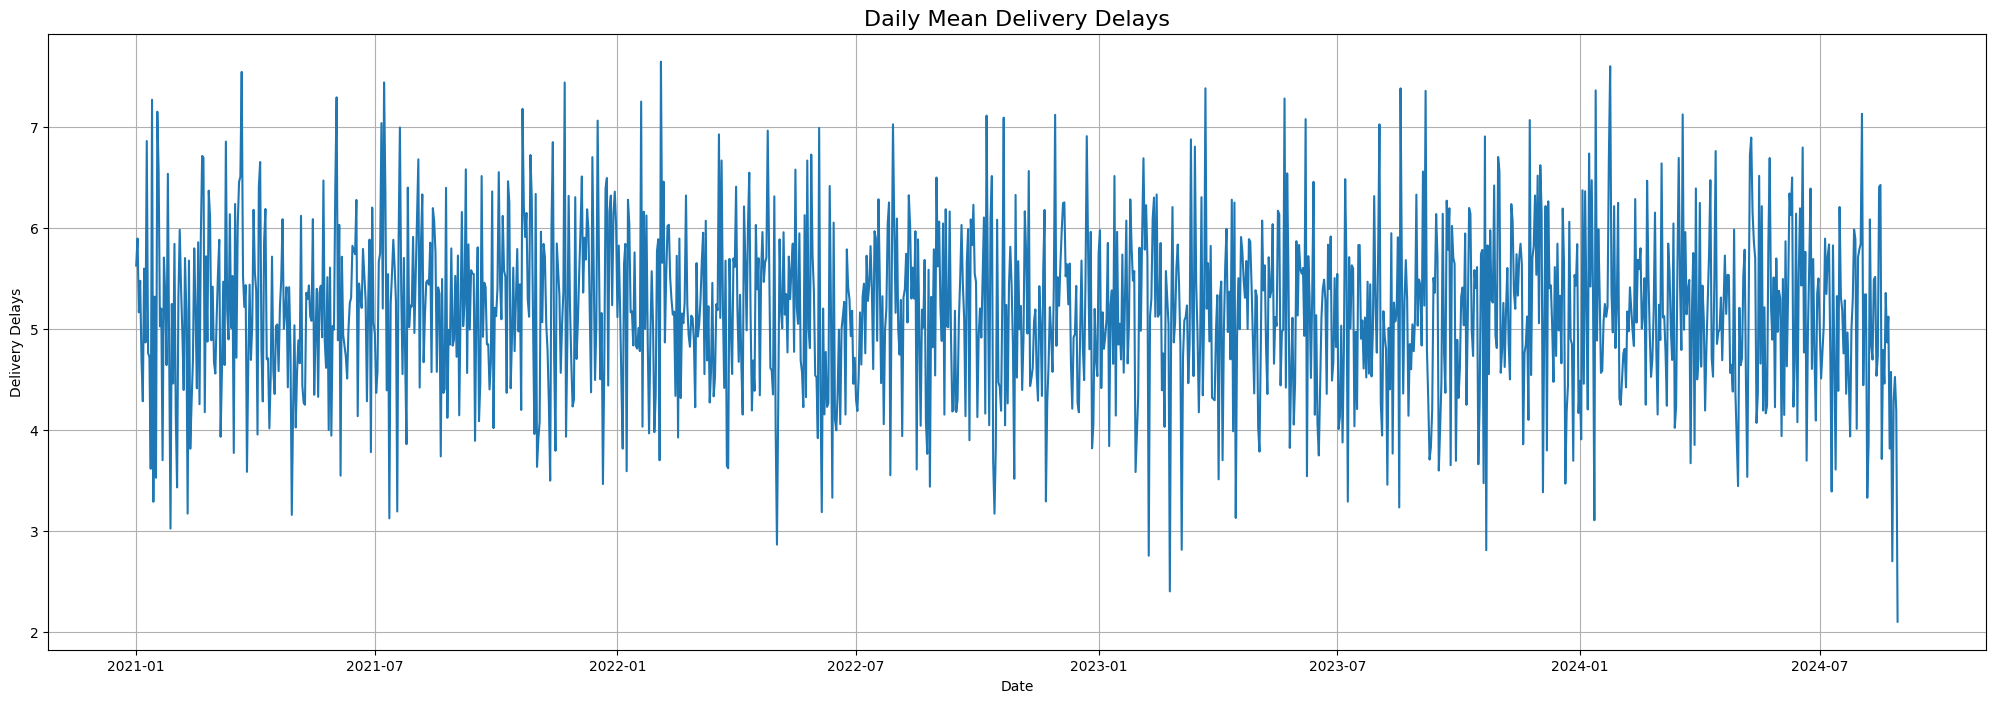

In [28]:
# Checking the time-series graph for our target variable
plt.figure(figsize=(25, 8))
plt.plot(target)
plt.xlabel('Date')
plt.ylabel('Delivery Delays')
plt.title('Daily Mean Delivery Delays', fontsize=16)
plt.grid();

Now, looking at the original time series graph shows no indication if the time series is additive or multiplicative; we have only assumed that the model is by default additive due to no obvious increase/decrease in magnitude when looking at the trend. As such, we can conduct a test wherein we will plot the histograms of the original times series and compare it with the histogram of the log-transform comparison $(log\frac{x_{i+1}}{x_i})$. Whichever of the two histograms are 'more normal' is the model we should go for, i.e., if the histogram of the original time series is more normal, then the model is additive, else the model is multiplicative. The 'level' of normality between these histograms can be compared by plotting their __Q-Q__ Plots; the plot with more datatpoints following a straight line is closer to a normal distribution.

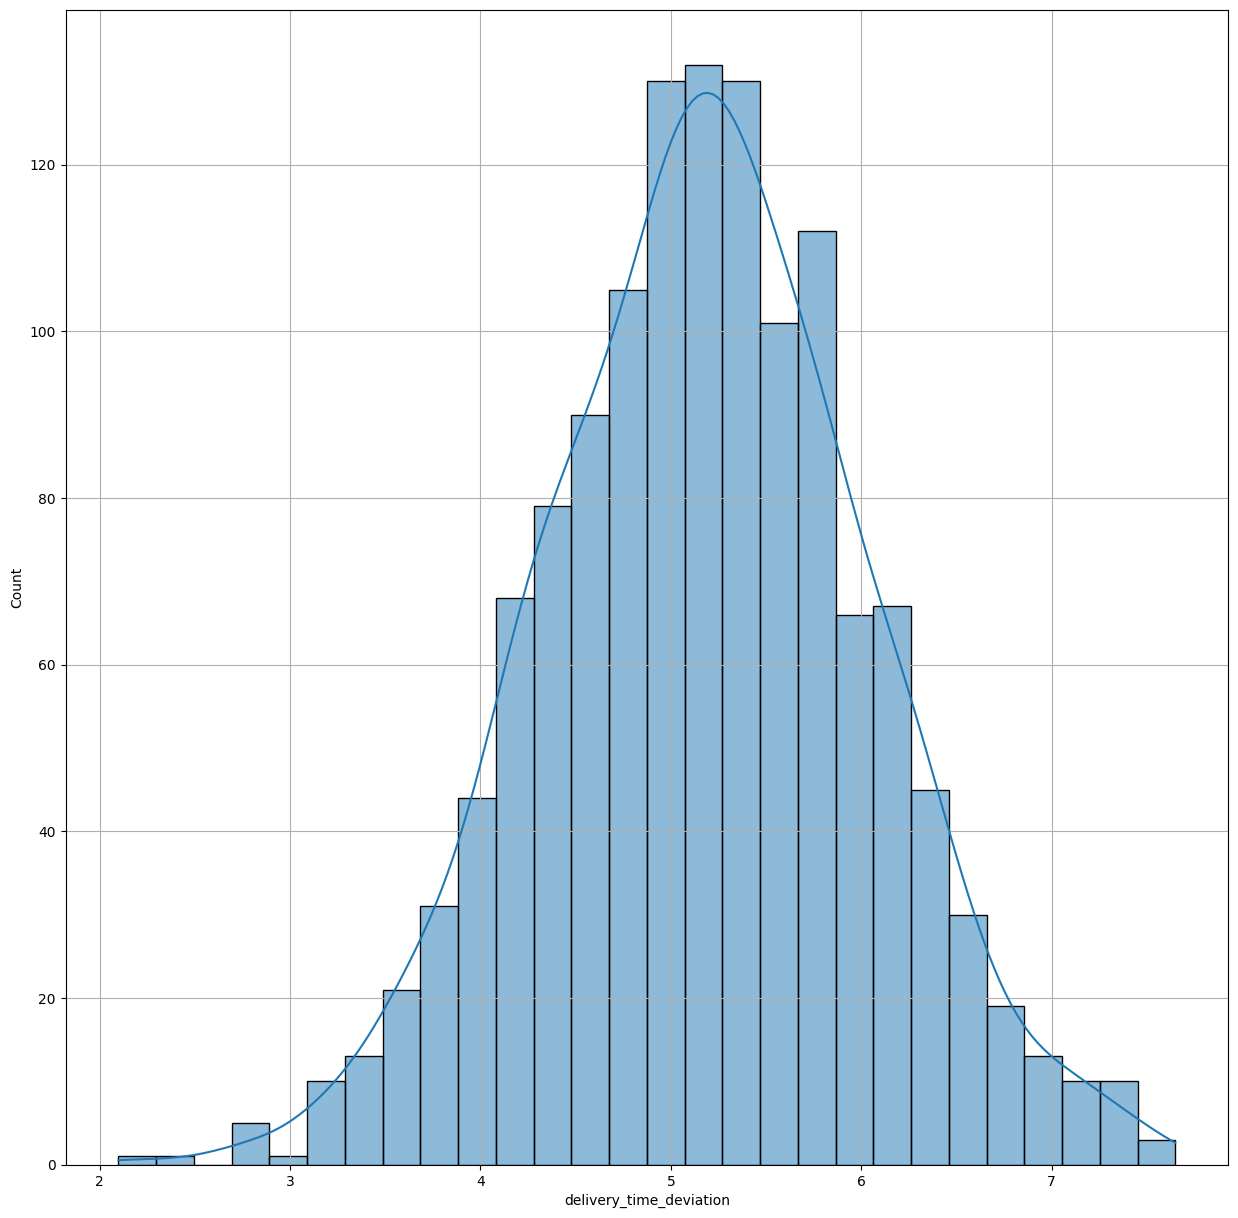

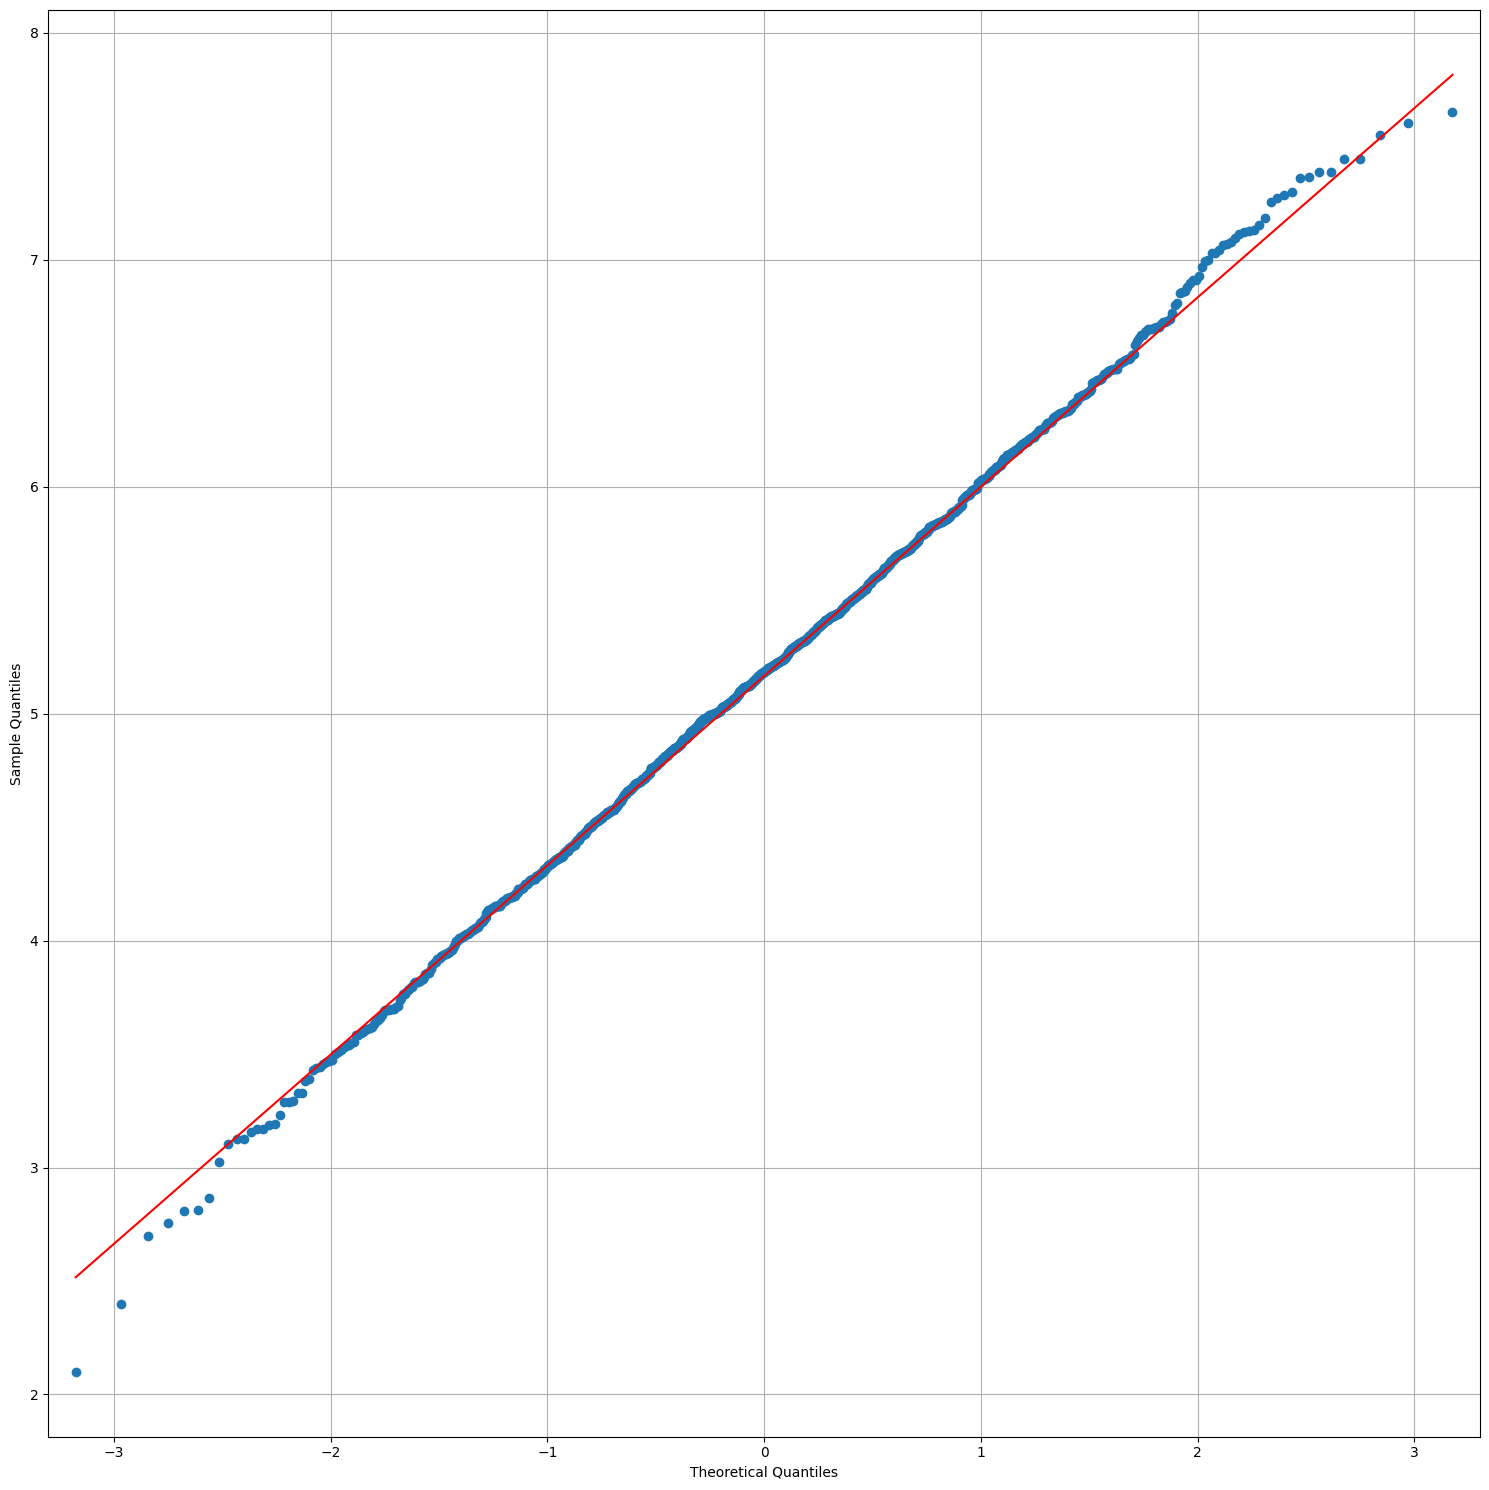

In [29]:
# Import the libraries and plot the series
import statsmodels.api as sm

# Plot the original series histogram
plt.figure(figsize=(15, 15))
sns.histplot(target, kde=True)
plt.grid()

# Plot the Q-Q plot to check for normality
qq_raw = sm.qqplot(target, line='q')
qq_raw.set_size_inches((15, 15))
qq_raw.tight_layout()
plt.grid()
plt.show()

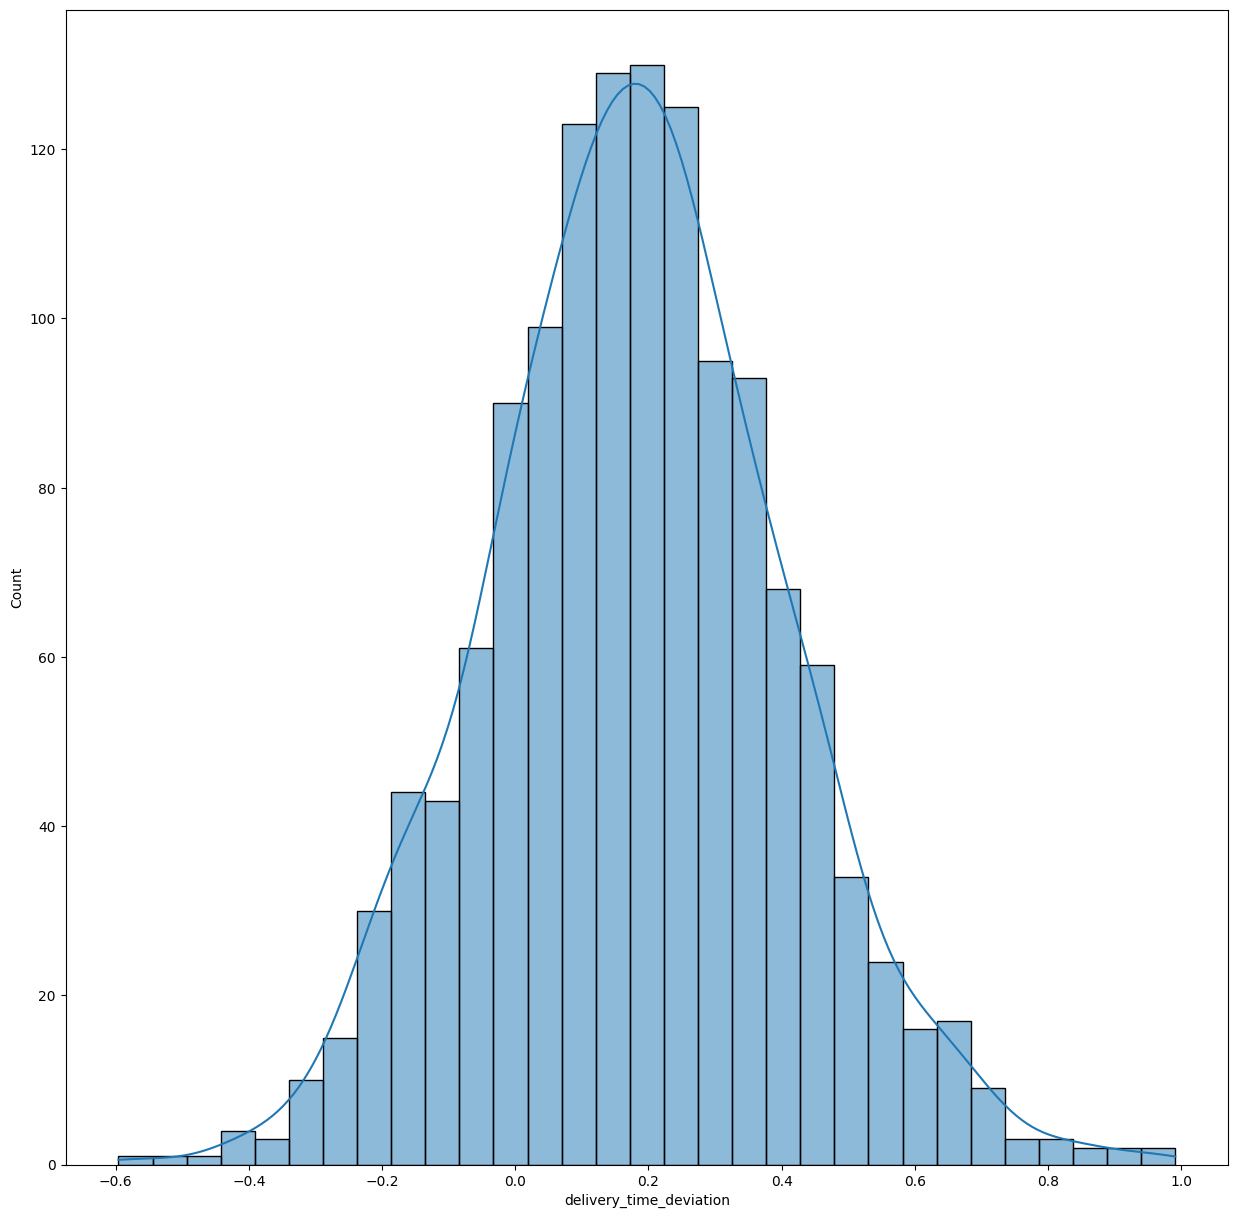

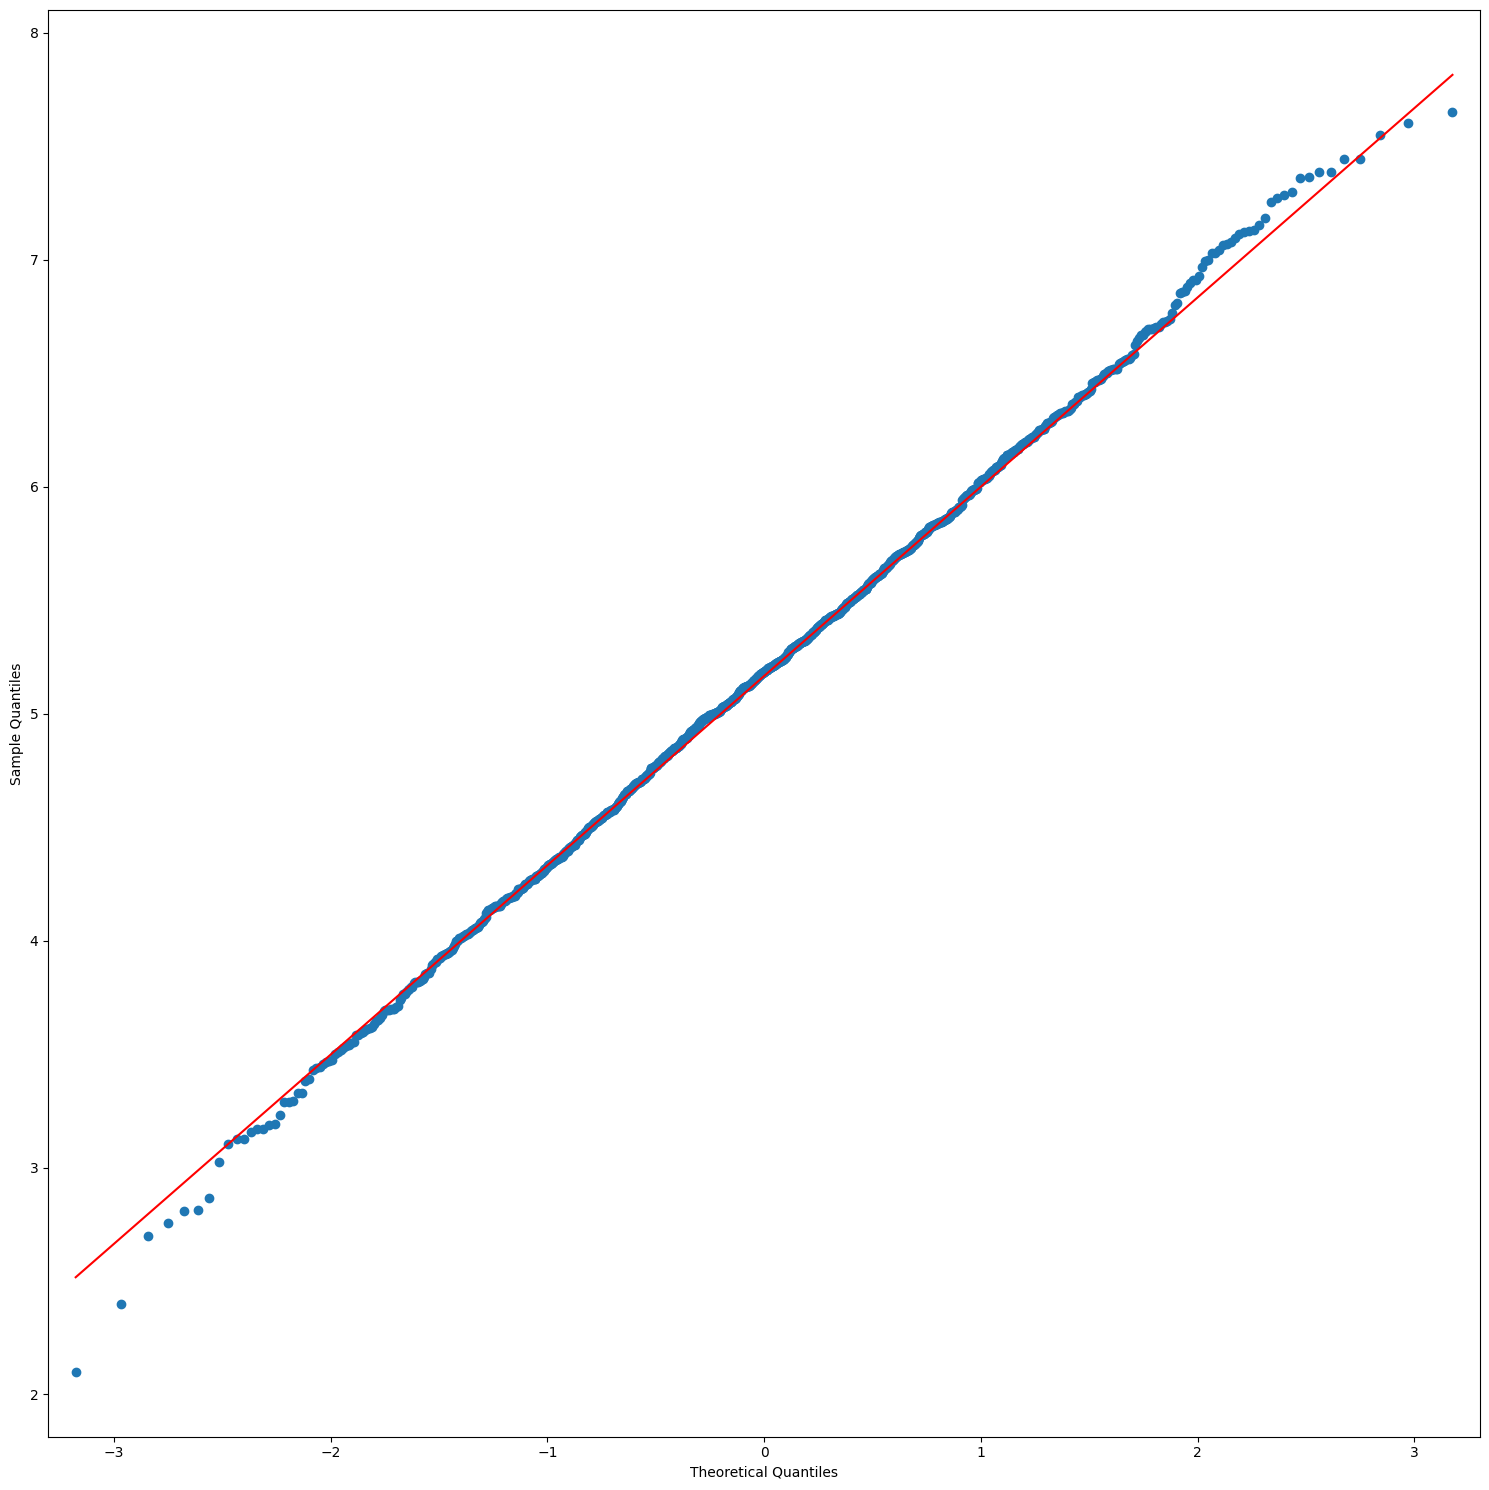

In [30]:
# Transform the series using natural logarithm
target_log = np.log((target.shift(-1) + 1) / target)

# Plot the original series histogram
plt.figure(figsize=(15, 15))
sns.histplot(target_log, kde=True);

# Plot the Q-Q plot to check for normality
qq_raw = sm.qqplot(target, line='q')
qq_raw.set_size_inches((15, 15))
qq_raw.tight_layout()
plt.show()

From the above plot comparisons, we see that even conducting log-shifted transformations, we do not see any difference in the Q-Q plots, leading us to believe that neither of the two distributions are more normal than the other. As such, we can safely, or rather roughly, assume that the time series is __Additive__. For further confirmation, we can visually confirm the same by using _Season Decomposition_ plots to visually inspect the three components of the time series, viz., __Trend__, __Seasonality__ and __Residuals__ and let the function know that we are plotting with the assumption that the series is 'Additive' as well

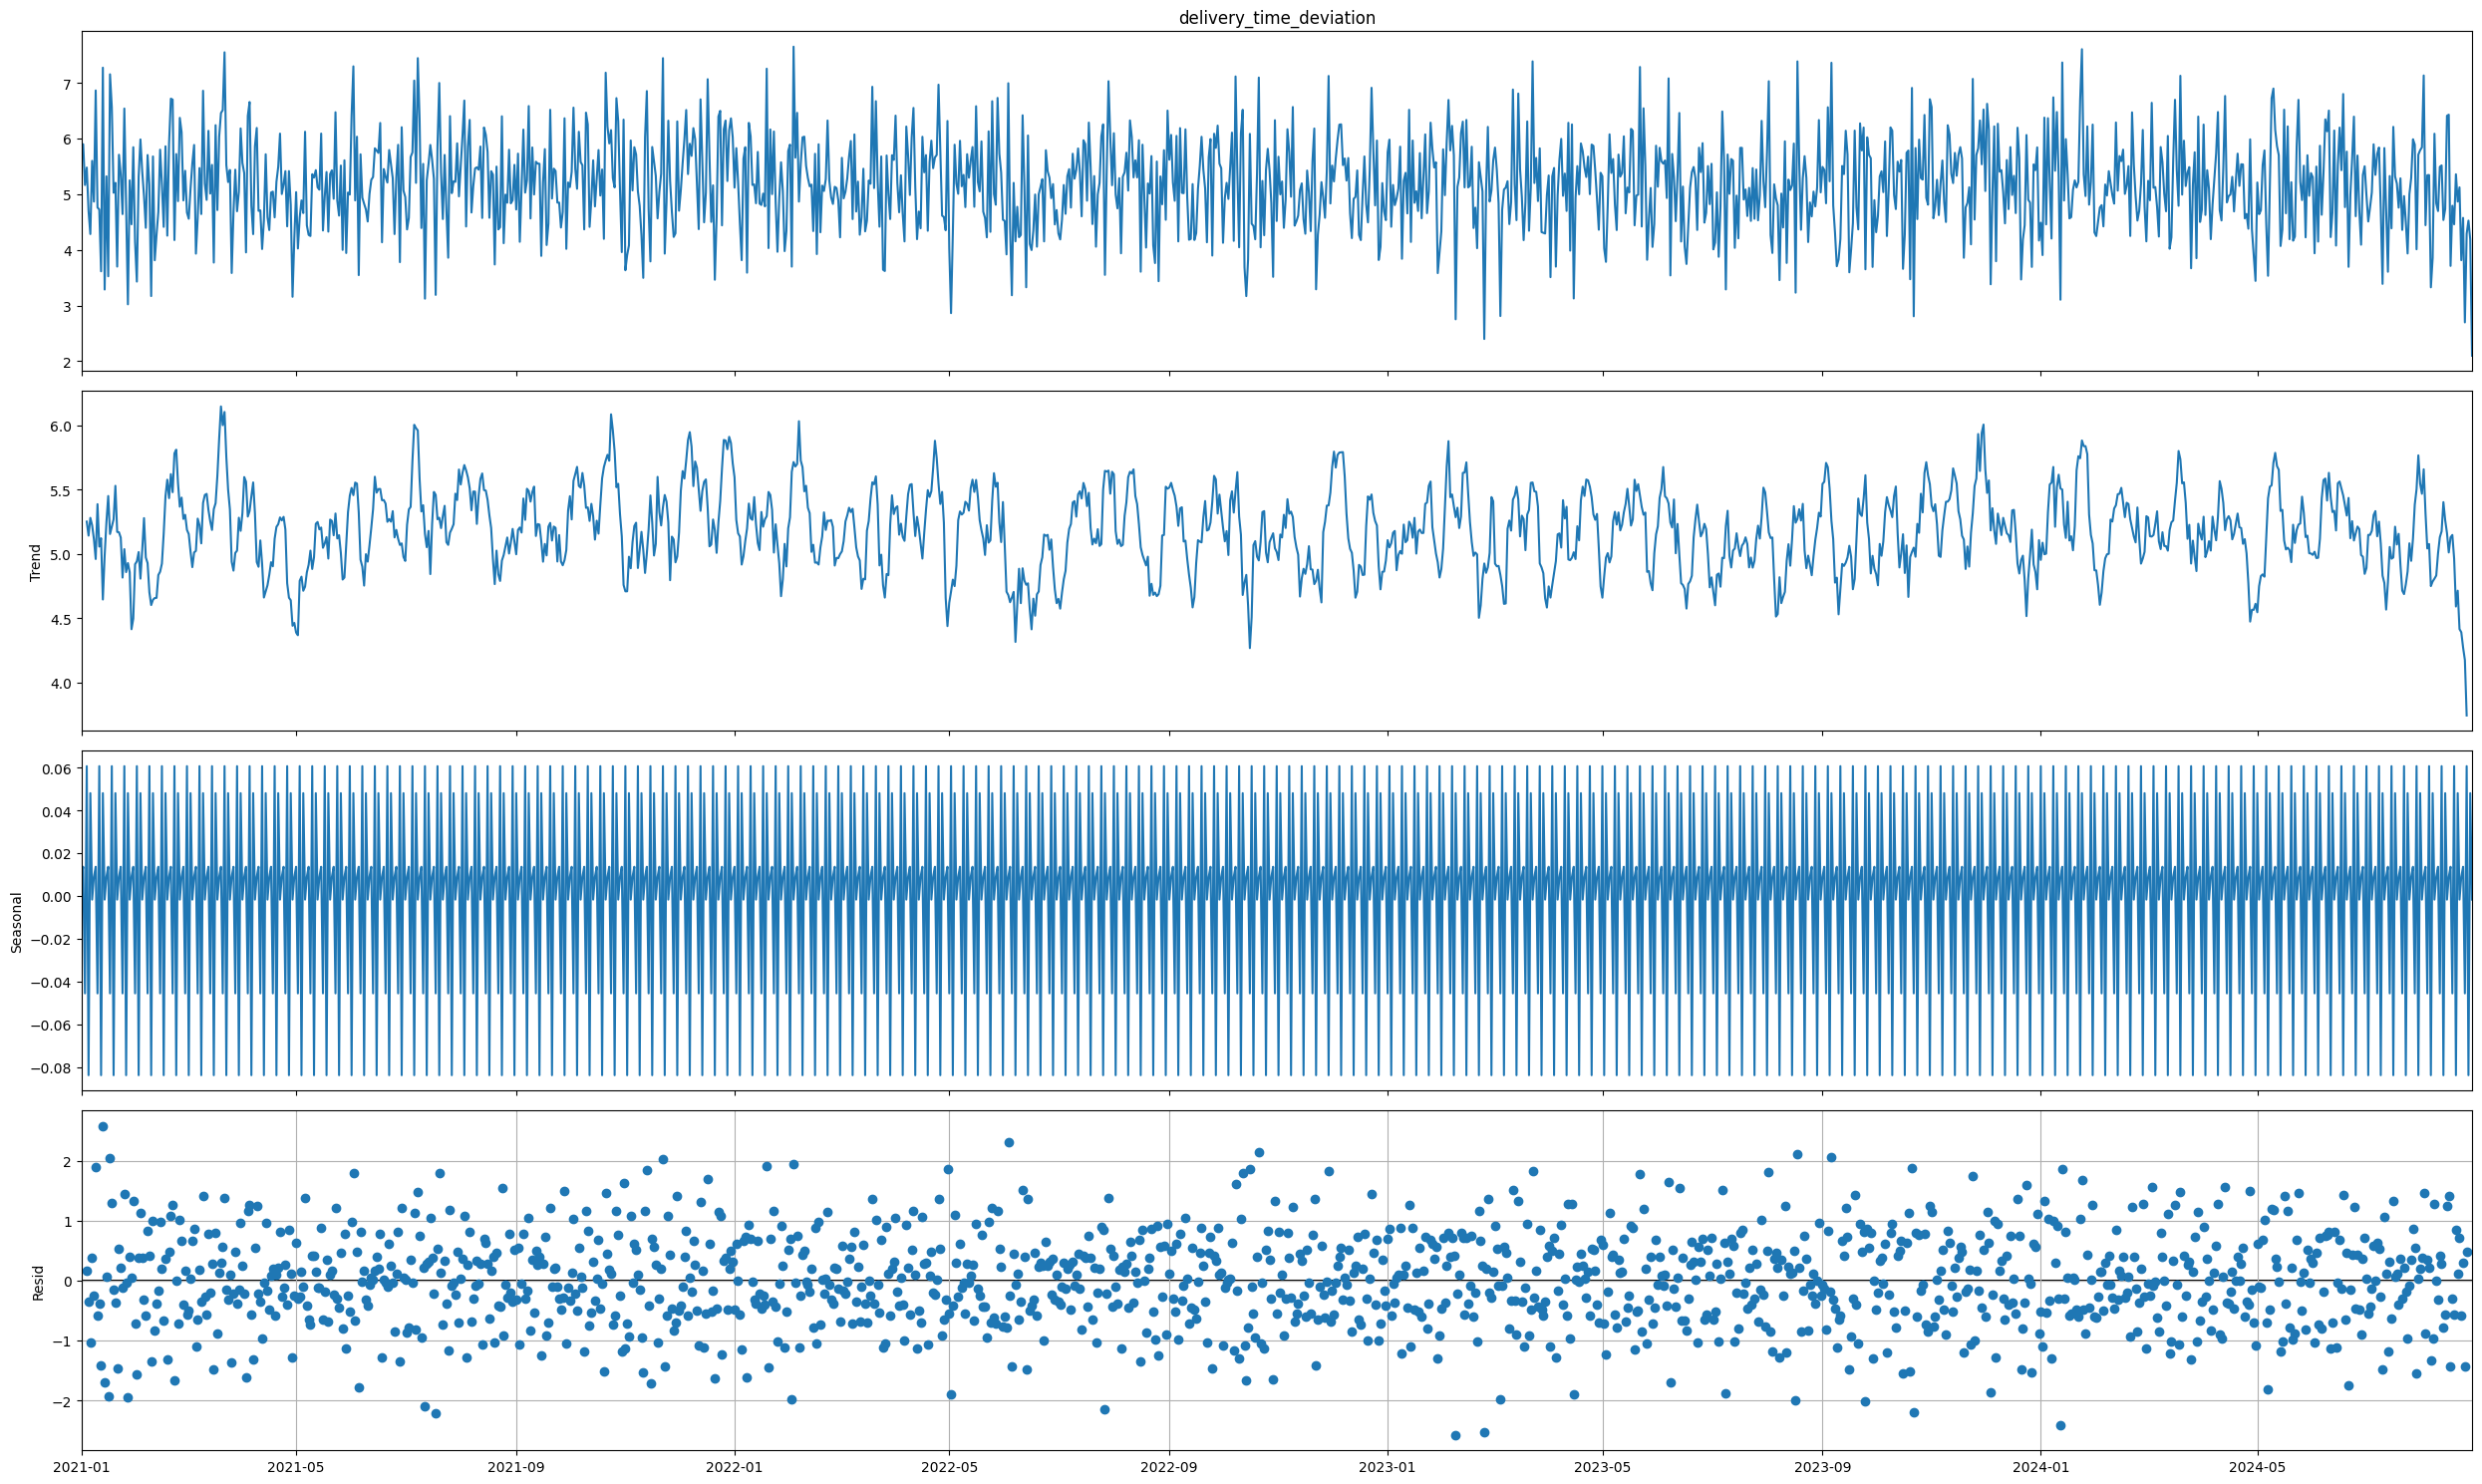

In [31]:
# Load the seasonal decomposition library
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition of Daily Mean Delivery Delays
dec_targ = seasonal_decompose(target, model='add')
fig_add = dec_targ.plot()
fig_add.set_size_inches((25, 15))
plt.grid()

# Clean up the plot
fig_add.tight_layout()
plt.show()

Just as we suspected, the series was __Additive__ in nature from the following observations of the Decomposition plot:

* __Trend__: The time series has __no Trend__ as the change is rather flat, indicating that the process has reached a mature stage in its life cycle, and would either reduce due to innovations in the supply chain, or increase due to disruptions such as geoplotical problems or natural disasters. This can be visualised by looking at the original time series as well, which shows __no change in amplitude__ over time with a very flat slope of the trend-line, and very frequently seen spikes with the same amplitude across the time-series period.

* __Seasonality__: The time series has an __extremely strong and clear SEASONAL__ pattern, likely related to weekly or monthly variations. This indicates that there are no changes in the process despite suffering from several disruptions, such as traffic, port issues, driver fatigue, equipment issues, etc. As such, the system has likely already taken into account all the possible scenarios and is working with all the protocols activated.

* __Residuals__: The Residual plot shows __no clear pattern__ indicating that all the possible underlying features and information has been captured when drafting the seasonal decomposition plot. The scatter of the data points in your plot appears to be uniform. The _vertical band_ of dots (the width of the error) remains __roughly the same height__ throughout the entire period. To see if the residuals are randomly distributed, we can plot a histogram to check its distribution, and a Q-Q plot to confirm if it is normally distributed; the assumption being randomly distributed residuals will forllow a normal distribution.

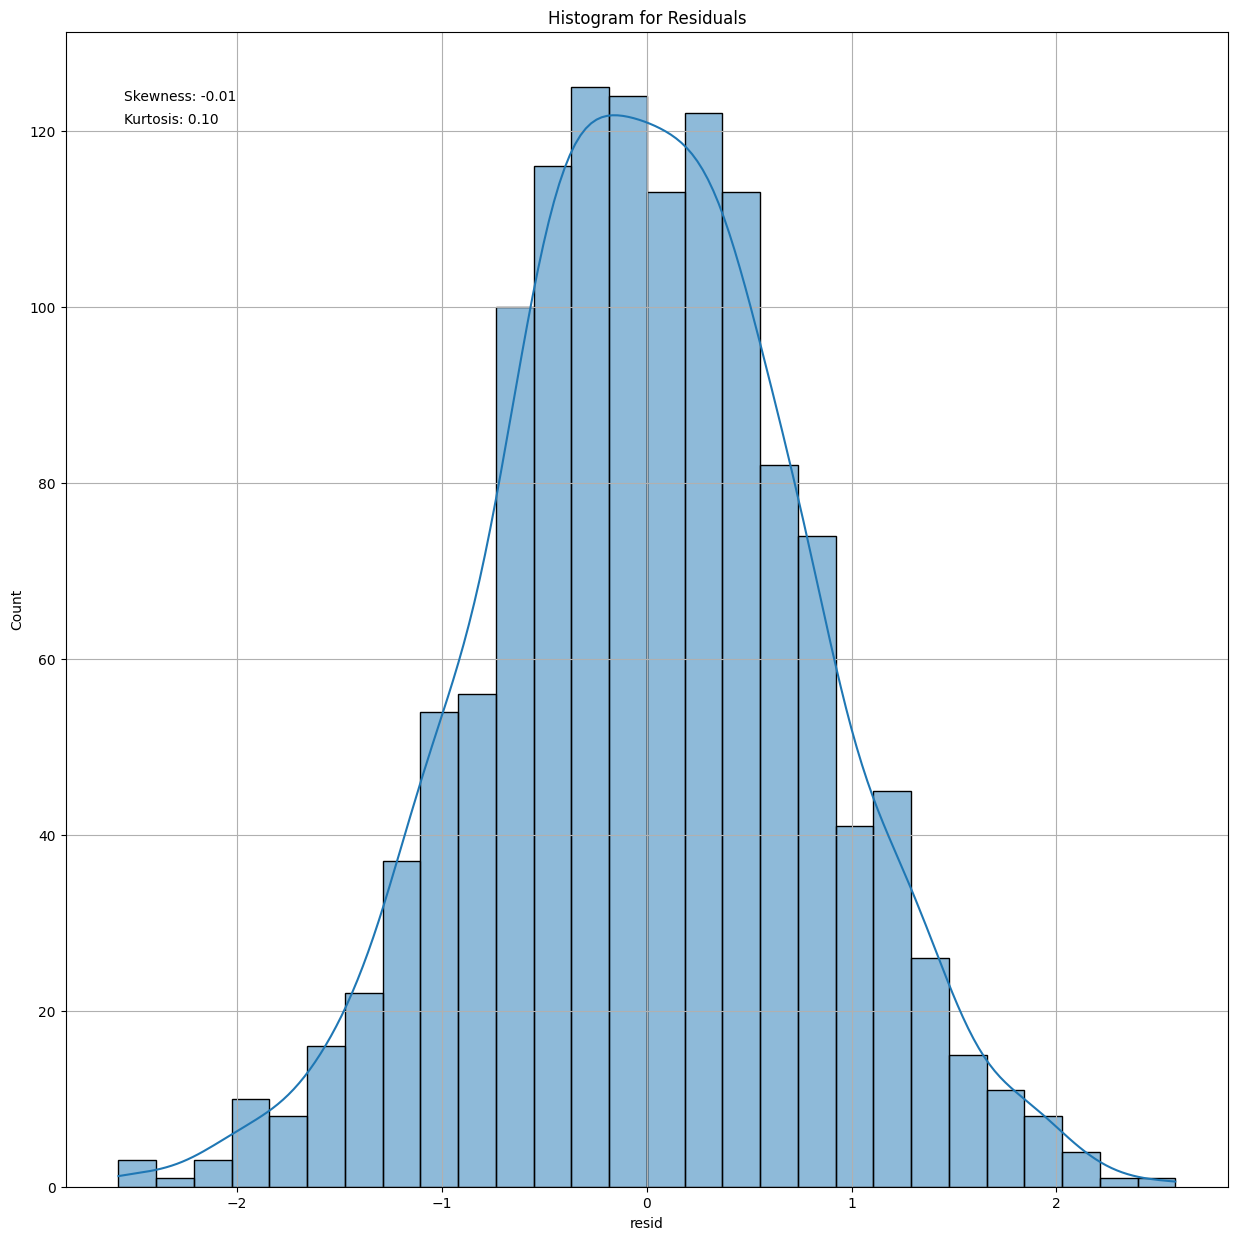

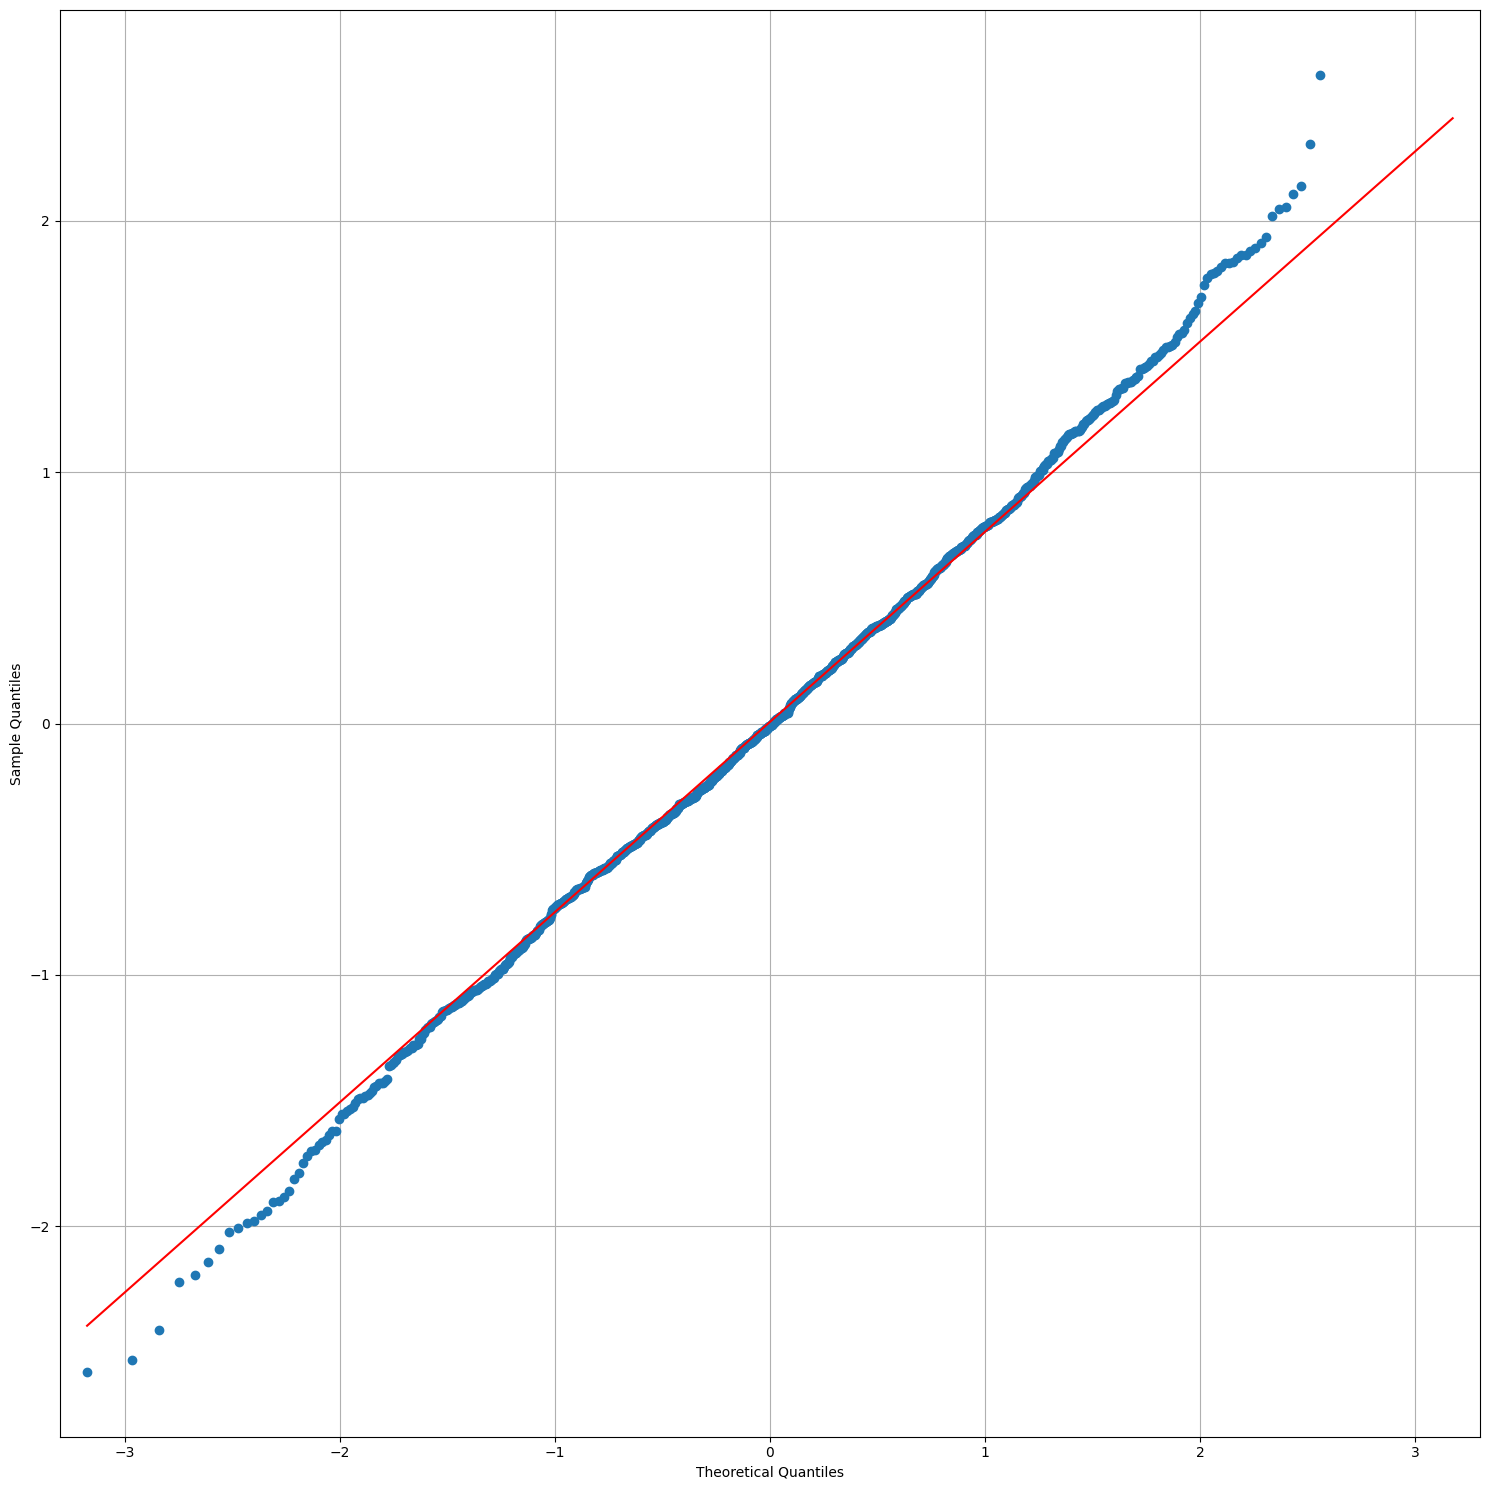

In [32]:
# Plotting the residuals from the seasonal decomposition
plt.figure(figsize=(15, 15))
sns.histplot(dec_targ.resid, kde=True)
plt.title('Histogram for Residuals', fontsize=12)
plt.text(0.05, 0.95, f'Skewness: {dec_targ.resid.skew():.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
plt.text(0.05, 0.93, f'Kurtosis: {dec_targ.resid.kurt():.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
plt.grid()

# Plot the Q-Q plot
res_qq = sm.qqplot(dec_targ.resid, line='q')
res_qq.set_size_inches(15, 15)
res_qq.tight_layout()
plt.grid()
plt.show()

From the above Q-Q plot, and the initial assumption that the series was Additive, we can safely conclude that the model was Additive in nature, hence there is __no need__ for any sort of transformation we would require before going for further tests of _Stationarity_.

### **<u>Stationarity Test</u>**

A fundamental requirement for SARIMAX modeling, __stationarity__ in Time-series has statistical properties — (mean and variance) that remain constant over time. This constancy ensures that the patterns and relationships learned from the past (the training data) are reliable and will hold true in the future, allowing us to generate valid and accurate forecasts. As such, we will use the 2 most widely used tests to check for complete stationarity, viz., the __Augmented Dicky Fuller _(ADF)_ Test__ and the __Kwiatkowsky Phillips Schmidt Shin _(KPSS)_ Test__


In [33]:
# Import the required libraries
from statsmodels.tsa.stattools import adfuller, kpss

In [34]:
def adf_test(timeseries):
    '''
    Conducts the Augmented Dicky Fuller Test on the time-series data
    and returns the 
    '''
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [35]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [36]:
adf_test(target)

Results of Dickey-Fuller Test:
Test Statistic                  -37.523795
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1336.000000
Critical Value (1%)              -3.435254
Critical Value (5%)              -2.863706
Critical Value (10%)             -2.567923
dtype: float64


In [37]:
kpss_test(target)

Results of KPSS Test:
Test Statistic           0.25258
p-value                  0.10000
Lags Used                4.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


/tmp/ipykernel_36/11026176.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


These statistical tests completely cement our assumptions that the time series for Delivery Delays is __completely Stationary__, by looking at the following Test characteristics of each.

* __ADF Test:__ The _p-value_ for the test is __less than the Critical p-value__  measured at 95% Confidence Level for a __left-tailed test__; we can thus, safely __reject the null hypothesis__, meaning there is a complete _absence of a Unit Root_, indicating that the Time Series is __Stationary__. Another formal way to confirm this is the test statistic of `-37.52` which is _much lesser_ as compared to even the `1%` Critical value of `-3.43`, which is another indication that the Null Hypothesis can be rejected.

* __KPSS Test:__ The _p-value_ for the test is __greater than the Critical p-value__ measured at 95% Confidence Level for a __right-tailed test__, meaning we __cannot reject the null hypothesis__ which indicates the presence of _Trend Stationarity_ in the Time Series, which is what we had initially assumed. The other check that confirms our assumptions is the test statistic of `0.25` which is also lesser than the `10%` Critical value of `0.35`, leading further credence to the fact that we must NOT reject the Null Hypothesis.

From these observations, we can thus finally go ahead with the target Time Series as is for our modelling; as the Series is Stationary, we do __not__ require any form of transformation for the same, meaning the Trend Differencing `d` as well as the Seasonal Differencing `D` in the SARIMAX model is `0` .

### **<u>Auto-Correlation Analysis</u>**

Now that we have confirmed our Time Series to have Stationarity with Statistical and Visual confirmations, we can further analyse the Auto-Correlation plots to understand the characteristics required to plot our SARIMAX model. We can plot the ACF and the PACF models to find the best Trend parameters (`p`, `q`) and the Seasonal parameters (`P`, `Q`) to get an idea of the best model parameters of our $\text{SARIMAX(p, d, q)}\text{x}\text{(P, D, Q)}_s$ model.

In [38]:
# Import the dependencies
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

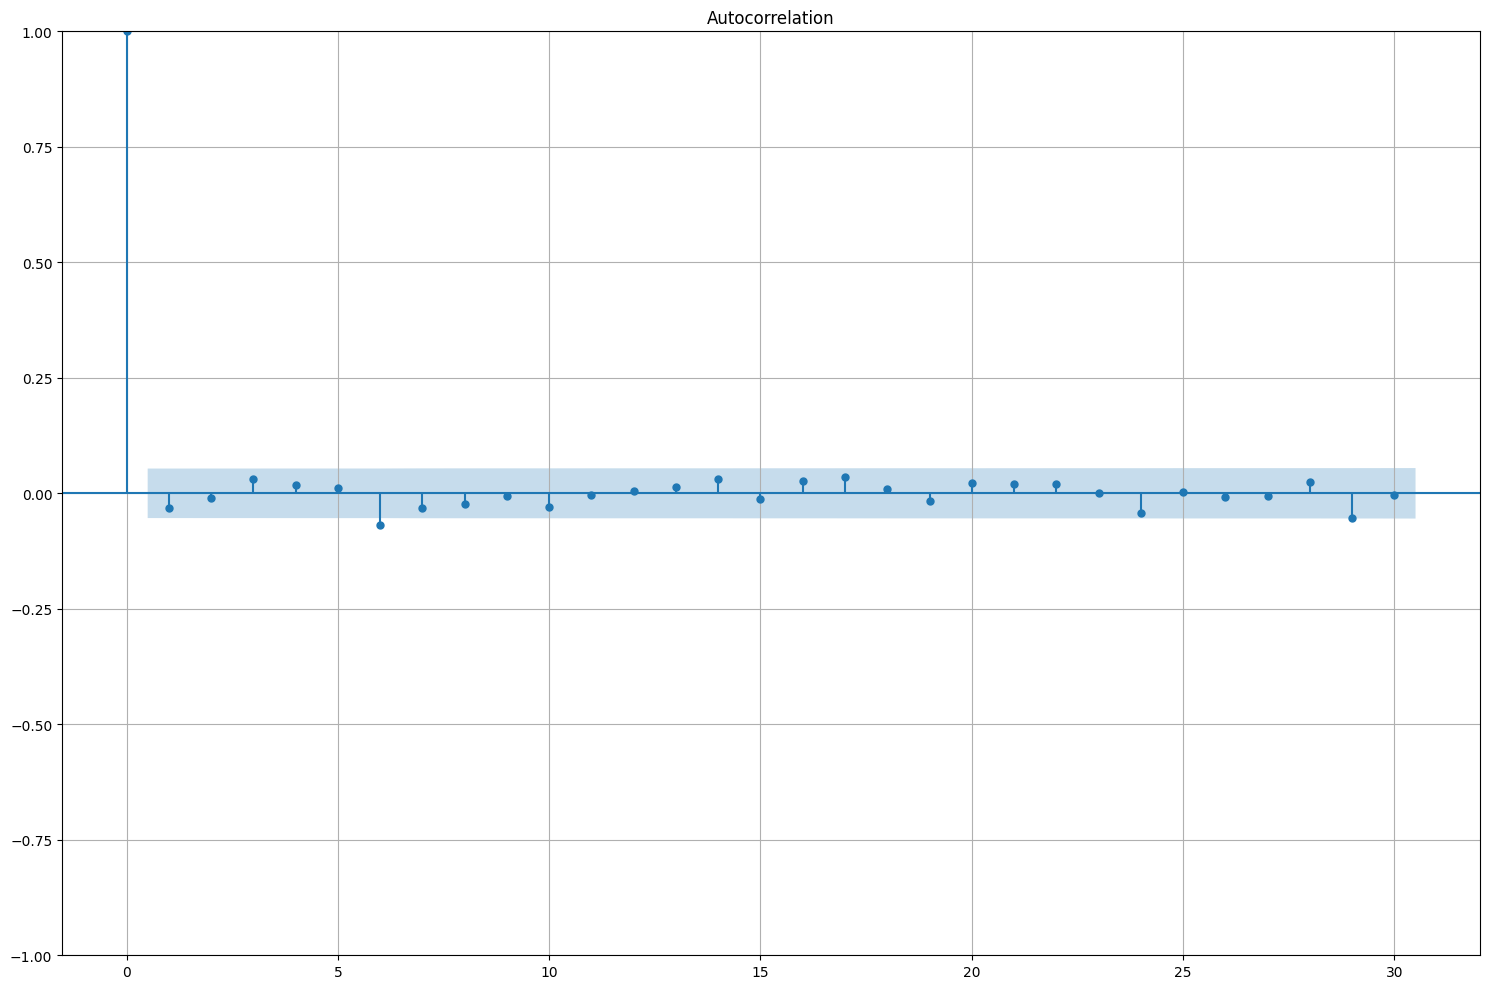

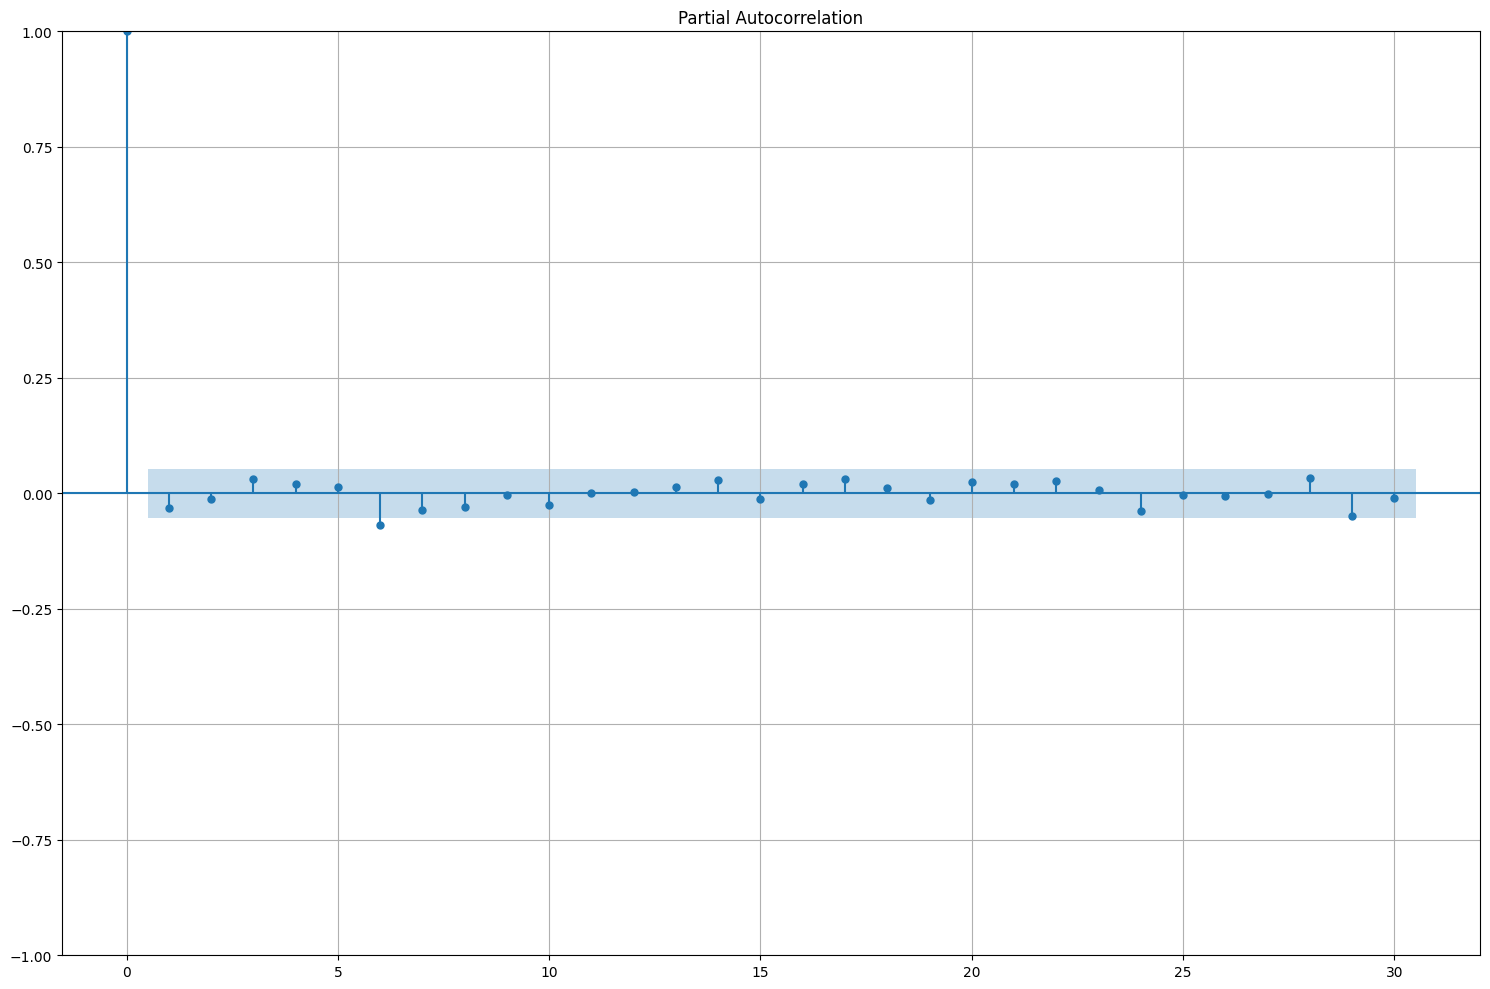

In [39]:
# Plot the Auto-Correlation function for the target
targ_acf = plot_acf(target, lags=30)
targ_acf.set_size_inches((15, 10))
targ_acf.tight_layout()
plt.grid()
plt.show()

# Plot the Partial Auto-Correlation function for the target
targ_pacf = plot_pacf(target, lags=30)
targ_pacf.set_size_inches((15, 10))
targ_pacf.tight_layout()
plt.grid()
plt.show()

The above ACF and PACF plots show an extremely unusual situation, the observations for which can be found below:

* Both the ACF (Autocorrelation) and PACF (Partial Autocorrelation) plots show a strong spike at Lag 0 (which is always 1.0) but then cut off immediately and fall entirely within the blue shaded region (the confidence interval) at Lag 1. As such, for the parameter `p` (Non-Seasonal AR), since the PACF cuts off at Lag 1 (i.e., the first lag outside of the shaded area is Lag 0), the correlation between the series and its past values is not statistically significant, while for `q` (Non-Seasonal MA), since the ACF cuts off at Lag 1, the dependence on past error terms is not statistically significant. We should therefore set `p`=`0` and `q`=`0`.

* The seasonal terms relate to the correlation at the primary seasonal lag, `s`. Since the time series data is _daily aggregated_, the most likely seasonal period is `7` days (weekly seasonality).However, looking specifically at the spike at Lag 7 and other seasonal multiples (14, 21, 28), in both the ACF and PACF plots, the spikes at Lag 7, Lag 14, and all other seasonal lags fall within the blue shaded confidence interval, meaning for `P` (Seasonal AR) as well as `Q` (Seasonal MA), since the PACF at Lag 7 is not statistically significant, we set `P`=`0` and `Q`=`0`.

This means that the $\text{SARIMAX(0, 0, 0)}\text{x}\text{(0, 0, 0)}_7$ model is essentially an Exogenous Regression Model, which suggests that the past values of the delivery delay itself are not useful for prediction; instead, the variations in the target variable are primarily explained by the exogenous features (traffic, temperature, etc.)

### **<u>SARIMAX Modelling</u>**

We can therefore look to make a simple Exogenous Regression model which will form a simplified Time Series model that has statistically insignificant impact of the target's past values, but is instead highly dictated by the impact of its other features in the same time stamp. We can thus go ahead and create the SARIMAX model; however, we will try to see with other Trend and Seasonality parameters to check if there is some effect of auto-regression on the target variable's past values as well.

However, before we actually model the SARIMAX model with the observed parameters from the various statistical tests, let us create a series of models which will run with combinations of parameters, then check and select the one with the lowest AIC score to make the final model.

In [40]:
# Import dependencies
import itertools
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings("ignore")

In [41]:
# Create a combination of parameters to find the best (p,d,q)x(P,D,Q,s)
# which gives the lowest AIC score
p = q = range(0, 3)
d = D = range(0, 1)
s = [7]

# Create a list to store the parameter combinations
param_combs = list()
for params in itertools.product(p, d, q):
    for seasonal_params in itertools.product(p, D, q, s):
        param_combs.append((params, seasonal_params))

In [42]:
# Create a new results list
results_sarimax = list()

# Create a mixture of SARIMAX models based on combinations
for i, (trend_params, seasonal_params) in enumerate(param_combs):
    try:
        p, d, q = trend_params
        P, D, Q, s = seasonal_params
        print(f'Testing SARIMAX({p}, {d}, {q})x({P}, {D}, {Q}, {s}) - {i+1}/{len(param_combs)}')
        sarimax_model = smt.statespace.SARIMAX(target, exog = feat, order = trend_params,
                        seasonal_order =  seasonal_params, enforce_stationarity=False,
                        enforce_invertibility=False, trend='c')
        sarimax_result = sarimax_model.fit(max_iter=1000, disp=False)
        results_sarimax.append({
            'Run': i+1,
            'Trend': trend_params,
            'Seasonal': seasonal_params,
            'AIC Score': sarimax_result.aic
        })

    except Exception as e:
        print(f'Failed for SARIMAX({p}, {d}, {q})x({P}, {D}, {Q}, {s}): {e}')
        continue

Testing SARIMAX(0, 0, 0)x(0, 0, 0, 7) - 1/81
Testing SARIMAX(0, 0, 0)x(0, 0, 1, 7) - 2/81
Testing SARIMAX(0, 0, 0)x(0, 0, 2, 7) - 3/81
Testing SARIMAX(0, 0, 0)x(1, 0, 0, 7) - 4/81
Testing SARIMAX(0, 0, 0)x(1, 0, 1, 7) - 5/81
Testing SARIMAX(0, 0, 0)x(1, 0, 2, 7) - 6/81
Testing SARIMAX(0, 0, 0)x(2, 0, 0, 7) - 7/81
Testing SARIMAX(0, 0, 0)x(2, 0, 1, 7) - 8/81
Testing SARIMAX(0, 0, 0)x(2, 0, 2, 7) - 9/81
Testing SARIMAX(0, 0, 1)x(0, 0, 0, 7) - 10/81
Testing SARIMAX(0, 0, 1)x(0, 0, 1, 7) - 11/81
Testing SARIMAX(0, 0, 1)x(0, 0, 2, 7) - 12/81
Testing SARIMAX(0, 0, 1)x(1, 0, 0, 7) - 13/81
Testing SARIMAX(0, 0, 1)x(1, 0, 1, 7) - 14/81
Testing SARIMAX(0, 0, 1)x(1, 0, 2, 7) - 15/81
Testing SARIMAX(0, 0, 1)x(2, 0, 0, 7) - 16/81
Testing SARIMAX(0, 0, 1)x(2, 0, 1, 7) - 17/81
Testing SARIMAX(0, 0, 1)x(2, 0, 2, 7) - 18/81
Testing SARIMAX(0, 0, 2)x(0, 0, 0, 7) - 19/81
Testing SARIMAX(0, 0, 2)x(0, 0, 1, 7) - 20/81
Testing SARIMAX(0, 0, 2)x(0, 0, 2, 7) - 21/81
Testing SARIMAX(0, 0, 2)x(1, 0, 0, 7) - 22/

In [43]:
# Convert the results into a DataFrame and then sort by AIC scores
sarimax_res = pd.DataFrame(results_sarimax)
sarimax_res

Run      Trend      Seasonal    AIC Score
0     1  (0, 0, 0)  (0, 0, 0, 7)  3361.395229
1     2  (0, 0, 0)  (0, 0, 1, 7)  3349.637790
2     3  (0, 0, 0)  (0, 0, 2, 7)  3319.618228
3     4  (0, 0, 0)  (1, 0, 0, 7)  3351.069948
4     5  (0, 0, 0)  (1, 0, 1, 7)  3350.434090
..  ...        ...           ...          ...
76   77  (2, 0, 2)  (1, 0, 1, 7)  3899.833036
77   78  (2, 0, 2)  (1, 0, 2, 7)  3868.866936
78   79  (2, 0, 2)  (2, 0, 0, 7)  3869.296961
79   80  (2, 0, 2)  (2, 0, 1, 7)  3871.458803
80   81  (2, 0, 2)  (2, 0, 2, 7)  3873.608892

[81 rows x 4 columns]

In [44]:
sarimax_res = sarimax_res.sort_values(by='AIC Score', ascending=True).reset_index(drop=True)
sarimax_res.head()

Run      Trend      Seasonal    AIC Score
0   21  (0, 0, 2)  (0, 0, 2, 7)  3310.196024
1   48  (1, 0, 2)  (0, 0, 2, 7)  3310.785194
2   24  (0, 0, 2)  (1, 0, 2, 7)  3312.369329
3   51  (1, 0, 2)  (1, 0, 2, 7)  3313.097342
4   12  (0, 0, 1)  (0, 0, 2, 7)  3315.855622

From the above test results, our initial estimates for the SARMAX parameters were completely off. The AIC scores show a completely differnet story, where the parameters show that the model is highly influenced by the Moving Average (`q`) past forecast error residuals over `2` days. Further investigation shows that this may be affected by the presence of high number of exogenous variables which can introduce the concept of multi-collinearity. We have already taken into account outliers in the features as SARIMAX is more robust to outliers and noisy data.

Let us confirm if the features have some degree of multi-collinearity as below. Although no features will be dropped, this will give us an idea of the level of influence it had on the loss function of the AIC Scores.

In [45]:
# Calculate multicollinearity using Variance Inflation Factors
def calculate_vif(df):
    """
    Calculate Variance Inflation Factor (VIF) for features in a DataFrame
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing only the features (independent variables)
    
    Returns:
    --------
    vif_df : pandas DataFrame
        DataFrame with VIF values for each feature
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant
    
    # Add constant for VIF calculation
    X = add_constant(df)
    
    # Calculate VIF for each feature
    vif_df = pd.DataFrame()
    vif_df['Feature'] = X.columns[1:]  # Exclude constant
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
                     for i in range(1, X.shape[1])]
    vif_df = vif_df.sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif_df
    
    return vif_df

vif_results = calculate_vif(feat)
vif_results

Feature       VIF
0             port_congestion_level  1.625268
1          traffic_congestion_level  1.284417
2            cargo_condition_status  1.080174
3                 historical_demand  1.057317
4                  route_risk_level  1.050522
5                   iot_temperature  1.045549
6             driver_behavior_score  1.045484
7             fuel_consumption_rate  1.035413
8          order_fulfillment_status  1.032955
9                    shipping_costs  1.029183
10                delay_probability  1.025552
11      disruption_likelihood_score  1.024855
12         fatigue_monitoring_score  1.024219
13        warehouse_inventory_level  1.023997
14       supplier_reliability_score  1.022137
15           loading_unloading_time  1.019434
16  handling_equipment_availability  1.018218
17              eta_variation_hours  1.017435
18                   lead_time_days  1.016505
19       weather_condition_severity  1.012446
20           customs_clearance_time  1.008894

The fact that multicollinearity is not a factor (based on VIF results), with stationarity confirmed, and variance being stable means the initial ACF/PACF plots were simply a poor representation of the true correlation structure. The final optimal model structure, SARIMAX(0,0,2)×(0,0,2)7​, reveals that the random errors in delivery time have a short-term and seasonal dependency.

**1.** __Trend Component: `q=2` (Non-Seasonal Moving Average)__: The MA(2) term means the current delivery error is best predicted by the random shocks (white noise) that occurred in the last two days (t−1 and t−2) of the current reading; the possible real-world reasons may be:

* Lagged Inventory/Resource Allocation: An unexpected error (shock) today (e.g., equipment breakdown) continues to affect the mean delivery time for the next day or two as the system struggles to recover.
* Data Lag/System Latency: The data being used for the exogenous features (e.g., traffic reports) might have a 1- or 2-day lag in its true impact, making the current residual error correlated with the recent past.

<br>

**2.** __Seasonal Component: Q=2 (Seasonal Moving Average)__: The Q=2 term means the current delivery error is best predicted by the random shocks that occurred one and two weeks ago (t−7 and t−14); the possible real-world reasons may be:

* Rolling Weekly Schedule Effect: Errors or unexpected surges in demand that happen on the same day of the week (e.g., every Monday) create momentum that affects the next two weeks. For example, a major service disruption last Monday and the Monday before that might cause persistent resource misallocation this Monday.
* Billing/Cycle Effects: Weekly or bi-weekly administrative cycles (like payroll or compliance checks) that disrupt the system can cause persistent, lagged shocks at the seasonal frequency.

</br>

The reason our initial ACF/PACF plots failed to show these spikes is because the correlation was weak or suppressed, but when the AIC rigorously tested the model's ability to fit the data, it found that adding those two simple MA terms drastically improved the fit and provided the most robust, stable predictions.

### **<u>Time-Based Cross Validations</u>**

Since we already saw our assumptions for the SARIMAX parameters being different, and that not even multi-collinearity and high dimensionality of the features were an issue with the hyperparameters, we will continue with the parameters we obtained by checking the AIC Scores, but confirm the same using _Time-based K-Fold Cross Validations_ on the split datasets as shown below.

In [46]:
# Split dataset into train and test in 80:20 proportion
# Calculate split date
split_date = daywise_orders.index[int(len(daywise_orders) * 0.8)]

dw_trn = daywise_orders.loc[(daywise_orders.index < split_date), :]
dw_tt = daywise_orders[(daywise_orders.index >= split_date)]
    
display(dw_trn, dw_tt)

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2023-12-01      129539.723940                6139.858578   
2023-12-02      148573.107111                6845.072239   
2023-12-03      135387.243873                8405.961943   
2023-12-04      123780.731385                5041.972021   
2023-12-05      131583.311114                9455.443598   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2023-12-01                         0.281321               8.529186   
2023-12-02                         0.366586              10.649102   
2023-12-03                         0.272467               8.536177   
2023-12-04                         0.159899               8.817785   
2023-12-05                         0.320362               8.333389   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2023-12-01      453.760639                    0.430488               0.478482   
2023-12-02      416.495907                    0.340880               0.540050   
2023-12-03      415.695260                    0.560409               0.504963   
2023-12-04      384.751809                    0.474865               0.497710   
2023-12-05      435.260401                    0.368300               0.453712   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2023-12-01                  0.579323             2.997477   
2023-12-02                  0.530545             3.654611   
2023-12-03                  0.584856             3.640693   
2023-12-04                  0.478655             1.898547   
2023-12-05                  0.530532             3.754757   

            loading_unloading_time  ...  delay_probability  route_risk_level  \
timestamp                           ...                                        
2021-01-01                2.540595  ...           0.659014          6.777202   
2021-01-02                2.321280  ...           0.738776          7.373138   
2021-01-03                2.642499  ...           0.727337          6.605774   
2021-01-04                2.551933  ...           0.731175          6.34

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2023-12-06      139071.411929                6130.666073   
2023-12-07      134124.460344                7795.189809   
2023-12-08      127418.445130                5775.994625   
2023-12-09      154162.110699                8611.848004   
2023-12-10      158330.142132                5102.862672   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2023-12-06                         0.307792               7.714823   
2023-12-07                         0.312321               8.333478   
2023-12-08                         0.363323               8.422086   
2023-12-09                         0.332156               7.483468   
2023-12-10                         0.349345               6.655506   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2023-12-06      464.807299                    0.503494               0.525563   
2023-12-07      512.419779                    0.327135               0.459887   
2023-12-08      446.713663                    0.522208               0.516486   
2023-12-09      379.589855                    0.471825               0.421010   
2023-12-10      532.074880                    0.516199               0.488143   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2023-12-06                  0.724425             2.711346   
2023-12-07                  0.498956             3.119691   
2023-12-08                  0.690048             3.897703   
2023-12-09                  0.556027             2.748382   
2023-12-10                  0.703862             3.081106   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  delay_probability  route_risk_level  \
timestamp                           ...                                        
2023-12-06                2.338846  ...           0.607943          7.266530   
2023-12-07                2.172651  ...           0.720372          6.846875   
2023-12-08                1.947188  ...           0.626597          7.589298   
2023-12-09                2.896076  ...           0.628182          7.53

In [47]:
# Import Time-based K-Fold CV dependencies
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [48]:
# Define the best parameters found from AIC selection
trend_order = (0, 0, 2)
seasonal_order = (0, 0, 2, 7)
n_splits = 5 # Default no. of splits

# Create chronological k-Fold split model
tscv = TimeSeriesSplit(n_splits = n_splits)

In [49]:
# Metrics to measure
fold_rmse_scores = list()
fold_aic_scores = list()
fold_run = list()
fold = 1 # <- Keep track of fold

# Perform Walk-Forward Validation with time-varying regression
# by iterating through splits for ONLY the train data
for trn_ind, val_ind in tscv.split(dw_trn):
    y_trn_fold, y_val_fold = dw_trn.iloc[trn_ind][target.name], dw_trn.iloc[val_ind][target.name]
    X_trn_fold, X_val_fold = dw_trn.iloc[trn_ind][feat.columns], dw_trn.iloc[val_ind][feat.columns]

    # Start with folds
    print(f'--- Fitting fold {fold} ---')
    try:
        time_model = smt.statespace.SARIMAX(y_trn_fold, exog = X_trn_fold, order = trend_order,
                        seasonal_order =  seasonal_order, enforce_stationarity=False,
                        enforce_invertibility=False, time_varying_regression=False,
                        trend='c', mle_regression=True)
        
        # Fit the model and find AIC scores\
        results = time_model.fit(disp=False)
        fold_aic_scores.append(results.aic)

        # Forecasting and evaluation
        fore_step = len(y_val_fold)
        forecast = results.get_forecast(steps = fore_step, exog = X_val_fold)

        # Extract mean forecast predictions and calculate RMSE
        y_pred_fold = forecast.predicted_mean
        rmse = mean_squared_error(y_pred_fold, y_val_fold, squared=False)
        fold_rmse_scores.append(rmse)
        print(f'Fold RMSE: {rmse:0.4f}')

    except Exception as e:
        print(f'Error fitting model for fold {fold}: {e}')
        fold_rmse_scores.append(np.nan)

    # Increase fold counter
    fold_run.append(fold)
    fold += 1

# Display final results
fold_perf = pd.DataFrame({
    'Fold': fold_run,
    'RMSE Scores': fold_rmse_scores,
    'AIC Scores': fold_aic_scores
})
display(fold_perf)
print(f"Mean Cross-Validation RMSE: {np.mean(fold_rmse_scores):.4f}")
print(f"Std Dev of Cross-Validation RMSE: {np.std(fold_rmse_scores):.4f}")
print(f"Mean Cross-Validation AIC: {np.mean(fold_aic_scores):.4f}")

--- Fitting fold 1 ---
Fold RMSE: 0.9482
--- Fitting fold 2 ---
Fold RMSE: 0.8809
--- Fitting fold 3 ---
Fold RMSE: 0.7947
--- Fitting fold 4 ---
Fold RMSE: 0.8440
--- Fitting fold 5 ---
Fold RMSE: 0.8737


Fold  RMSE Scores   AIC Scores
0     1     0.948160   436.238482
1     2     0.880859   893.058330
2     3     0.794690  1339.186298
3     4     0.844027  1756.649699
4     5     0.873665  2195.462585

Mean Cross-Validation RMSE: 0.8683
Std Dev of Cross-Validation RMSE: 0.0501
Mean Cross-Validation AIC: 1324.1191


From the above performance comparison, we have obtained a mean RMSE score obtained by cross-validating the SARIMAX model on the time-series data, which we need to compare with the standard SARIMAX model that used a default parameters from our initial assumptions (0, 0, 0) for regression of the exogenous variables. Let us check for the performance of the normal SARIMAX model on the same train data, but with initial parameters.

In [50]:
std_rmse_scores = list()
std_aic_scores = list()
std_fold_run = list()
std_fold = 1 # <- Keep track of fold

# Perform Walk-Forward Validation with time-varying regression
# by iterating through splits for ONLY the train data
for trn_ind, val_ind in tscv.split(dw_trn):
    y_trn_fold, y_val_fold = dw_trn.iloc[trn_ind][target.name], dw_trn.iloc[val_ind][target.name]
    X_trn_fold, X_val_fold = dw_trn.iloc[trn_ind][feat.columns], dw_trn.iloc[val_ind][feat.columns]

    # Start with folds
    print(f'--- Fitting fold {std_fold} ---')
    try:
        std_time_model = smt.statespace.SARIMAX(y_trn_fold, exog = X_trn_fold, order = (0, 0, 0),
                        seasonal_order = (0, 0, 0, 7), enforce_stationarity=False,
                        enforce_invertibility=False, time_varying_regression=False,
                        trend='c', mle_regression=True)
        
        # Fit the model and find AIC scores
        std_res = std_time_model.fit(disp=False)
        std_aic_scores.append(std_res.aic)

        # Forecasting and evaluation
        std_fore_step = len(y_val_fold)
        std_forecast = std_res.get_forecast(steps = std_fore_step, exog = X_val_fold)

        # Extract mean forecast predictions and calculate RMSE
        y_pred_std_fold = std_forecast.predicted_mean
        std_rmse = mean_squared_error(y_pred_std_fold, y_val_fold, squared=False)
        std_rmse_scores.append(std_rmse)
        print(f'Fold RMSE: {std_rmse:0.4f}')

    except Exception as e:
        print(f'Error fitting model for fold {std_fold}: {e}')
        std_rmse_scores.append(np.nan)

    # Increase fold counter
    std_fold_run.append(std_fold)
    std_fold += 1

# Display final results
std_fold_perf = pd.DataFrame({
    'Fold': std_fold_run,
    'RMSE Scores': std_rmse_scores,
    'AIC Scores': std_aic_scores
})
display(std_fold_perf)
print(f"Mean Cross-Validation RMSE: {np.mean(std_rmse_scores):.4f}")
print(f"Std Dev of Cross-Validation RMSE: {np.std(std_rmse_scores):.4f}")
print(f"Mean Cross-Validation AIC: {np.mean(std_aic_scores):.4f}")

--- Fitting fold 1 ---
Fold RMSE: 0.9468
--- Fitting fold 2 ---
Fold RMSE: 0.8796
--- Fitting fold 3 ---
Fold RMSE: 0.7950
--- Fitting fold 4 ---
Fold RMSE: 0.8439
--- Fitting fold 5 ---
Fold RMSE: 0.8737


Fold  RMSE Scores   AIC Scores
0     1     0.946768   481.597236
1     2     0.879613   937.140396
2     3     0.795022  1384.909836
3     4     0.843895  1805.665283
4     5     0.873681  2245.484669

Mean Cross-Validation RMSE: 0.8678
Std Dev of Cross-Validation RMSE: 0.0496
Mean Cross-Validation AIC: 1370.9595


Now that we compared the performance of the SARIMAX models, it was found that the RMSE for the initial SARIMAX(0,0,0) model is __lower__ than the RMSE for the SARIMAX(0,0,2) model; this indicates that the initial model is superior for forecasting, even though its _AIC was higher_. The fact that the SARIMAX(0,0,2) model had a lower AIC means it was better at explaining the _small, non-random noise_ patterns in the historical data. However, when tested on unseen data (via Cross-Validation), that complexity hurt its performance:

* __Overfitting__: The MA(2) terms were likely modeling historical noise rather than a true, persistent process.
* __Generalization Failure__: When exposed to new data, those parameters caused the model to chase non-existent patterns, resulting in larger errors (higher RMSE) compared to the simpler model.

The SARIMAX(0,0,0) model by contrast, is stable because it wisely chooses not to model the weak and unreliable correlations, relying purely on the strong signal from static exogenous variables. Thus, for our final forecasting, we will instead go back to out initial assumption of the $\text{SARIMAX(0, 0, 0)}\text{x}\text{(0, 0, 0)}_7$ model and check its performance on the test dataset to compare the RMSE scores for validation.

In [51]:
# Final forecasting on test data
eval_model = smt.statespace.SARIMAX(endog = dw_tt.loc[:, target.name],
                                   exog = dw_tt.loc[:, feat.columns],
                                   order = (0, 0, 0), seasonal_order = (0, 0, 0, 7),
                                  trend = 'c', enforce_stationarity = False,
                                  enforce_invertibility = False)

# Fit the model
eval_res = eval_model.fit(disp = False)

# Get the forecast and evaluate
eval_forecast = eval_res.get_forecast(steps = len(dw_tt.loc[:, target.name]), exog = dw_tt.loc[:, feat.columns])

# Extract forecast and calculate RMSE scores
eval_pred = eval_forecast.predicted_mean
eval_rmse = mean_squared_error(eval_pred, dw_tt.loc[:, target.name], squared = False)
print(f'The RMSE for prediction on actual test data is: {eval_rmse:0.4f}')

The RMSE for prediction on actual test data is: 0.8097


The final Test RMSE (`0.8097`) is lower than the Mean CV-RMSE (`0.8678`). This suggests that the final period of data (the Test Set) was slightly easier to predict than the average historical period, or that training on the full training set immediately preceding the test set provided a marginal accuracy boost; because the Test RMSE is very close to the CV-RMSE (and even slightly better), we can be highly confident that our chosen model structure, $\text{SARIMAX(0, 0, 0)}\text{x}\text{(0, 0, 0)}_7$ with static regression, is the most stable and accurate choice for the delivery delay data.

#### **<u>Why SARIMAX?</u>**

Before we proceed further and create a forecast, let us clear a few conclusions we obtained from the above SARIMAX modelling parameters. A **$\text{SARIMAX(0, 0, 0)}\times\text{(0, 0, 0)}_7$** model means that the **historical pattern of the delivery delay time itself has no statistically significant predictive power** once accounted for Exogenous factors. This model is thus, not just a statistical anomaly; it has following **physical significance** for the logistics process:

**1. True Physical Significance**: The $\text{SARIMAX}(0, 0, 0) \times (0, 0, 0)_7$ structure, when used with exogenous variables ($X$), simplifies to a **pure Exogenous Regression Model** (often called ARMAX(0,0,0)). It means the system behaves in a highly **reactive** manner, where current delays are driven entirely by current conditions, not by any self-sustaining, long-term memory or events in the historical data.

| Component | Statistical Meaning | Physical Significance for Delivery Delay |
| :--- | :--- | :--- |
| **AR(0)** | Current value is **not** dependent on past values ($Y_{t-1}, Y_{t-2}$, etc.). | **No Inertia:** A severe delay yesterday (high $Y_{t-1}$) does not carry over to predict a high delay today. The system resets daily. |
| **MA(0)** | Current error is **not** dependent on past random shocks ($e_{t-1}, e_{t-2}$, etc.). | **No Lagged Response:** An unexpected, non-feature-related delay (a shock) does not persist or ripple through the system past the current day. |
| **I(0) & D(0)** | The data is already stationary. | **Stable Process:** The mean and variance of the delivery delay are constant over time. There is no uncontrolled trend or growing seasonality. |
| **Exogenous (X)** | The model relies on external features. | **High Explanatory Power:** All predictive power comes from external factors (traffic, temperature, etc.). If you know today's traffic, you know today's delay, regardless of what happened last week. |


**2. Simple Regression?**: Yes, fundamentally speaking, it has regressed to a simple regression model with the only addition of a time-based index. Because all $\text{ARIMA}$ components are zero, the full SARIMAX equation simplifies to: $$Y_t = \beta_0 + \beta_1 X_{1,t} + \beta_2 X_{2,t} + \dots + \epsilon_t$$

where:
* $Y_t$: Delivery delay time at time $t$.
* $\beta_0$: The constant intercept (which you included with $\text{trend='c'}$).
* $\beta_i$: The fixed coefficient for the exogenous feature $X_i$ (e.g., the static weight of traffic).
* $\epsilon_t$: The remaining white noise error.

<br>

Even though the final form is a simple regression, starting with the SARIMAX framework was essential and was thus still the right tool:

1.  **Rigorous Validation:** The SARIMAX process allowed us to definitively **prove** that the AR and MA terms were unnecessary by using AIC/RMSE cross-validation, which a simple linear regression workflow would not be able to provide.

2.  **Handling Time Series Data:** The $\text{SARIMAX}$ framework ensures all the time series assumptions (like Stationarity) were rigorously checked, which is necessary step before applying regression to time-ordered data.

3.  **Future Flexibility:** If future conditions change (e.g., a new policy introduces a persistent 2-day delay carryover), the workflow can easily switch back to $\text{SARIMAX}(0, 0, 1)$ or $\text{AR}(1)$ without changing core methodology, which means the the regression models we created before would have become moot.

### **<u>Final Forecast</u>** (Monte-Carlo Simulation)

Let us now forecast using the same SARIMAX model parameters for the next year (365 days) and obtain the predicted delivery delays based on the historical data and the exogenous variables. Keep in mind that only for our instance and our current assumptions, will the model behave similar to a regression model. However, before we do so, we need to model the exogenous variables for the same duration we wish make a forecast for; we will therefore look to the minimum and maximum values of each feature, and recreate __imputed stable values__ for the simulated to get a reliable forecast for the predicted mean.

This is because since there is no future information, the most rational and statistically correct assumption is that each future feature will take its historically most probable value, i.e., the __mean__ (for continuous data) or the mode (for categorical data). Feeding the model random inputs would introduce _prediction variance_ into the prediction line where none should exist. If run twice, the prediction will be different each time, making the forecast unreliable. The statistically best estimate of the expected value of a stationary process is thus, its __mean__. However, in order to ensure best representation of the simualted data to the historical data, let us use a __polynomial regression__ as different time series need different levels of complexity, and instead of guessing the degree of the equations, we let the data tell us what it needs.

In [52]:
def future_exog_data(historical_data, days_to_forecast=365):
    """
    Automatically selects the best polynomial degree based on data complexity;
    creates a simulated dataset for future prediction of the features.

    Args:
        historical_data (DataFrame): The historical data of features we need
        to simulate.
        days_to_forecast (int): The number of days we need to forecast for
        the simulated data (optional).

    Returns:
        A `DataFrame` object with the simulated data for future predictions
        based on the best polynomial equations.
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    future_dates = pd.date_range(
        start=historical_data.index.max() + pd.Timedelta(days=1),
        periods=days_to_forecast,
        freq='D'
    )
    
    future_data = pd.DataFrame(index=future_dates, columns=historical_data.columns)
    
    for column in historical_data.columns:
        time_index = np.arange(len(historical_data)).reshape(-1, 1)
        y = historical_data[column].values
        
        # Try different polynomial degrees and pick the best one
        best_degree = 2  # Start with quadratic
        best_score = float('inf')
        
        for degree in [2, 3, 4]:  # Try quadratic, cubic, quartic
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            time_poly = poly.fit_transform(time_index)
            
            model = LinearRegression()
            model.fit(time_poly, y)
            
            # Simple score: mean squared error
            predictions = model.predict(time_poly)
            score = np.mean((y - predictions) ** 2)
            
            if score < best_score:
                best_score = score
                best_degree = degree
        
        # Use the best degree for forecasting
        poly = PolynomialFeatures(degree=best_degree, include_bias=False)
        time_poly = poly.fit_transform(time_index)
        
        model = LinearRegression()
        model.fit(time_poly, y)
        
        future_time = np.arange(len(historical_data), 
                              len(historical_data) + days_to_forecast).reshape(-1, 1)
        future_time_poly = poly.transform(future_time)
        
        future_trend = model.predict(future_time_poly)
        
        # Add noise that matches historical pattern
        historical_predictions = model.predict(time_poly)
        residuals = y - historical_predictions
        noise = np.random.normal(0, residuals.std(), days_to_forecast)
        
        future_data[column] = future_trend + noise
    
    return future_data

In [53]:
feat_fore = future_exog_data(feat)
display(feat_fore)

historical_demand  warehouse_inventory_level  \
2024-08-30      158383.936704                5157.772247   
2024-08-31      128215.029891                6724.492736   
2024-09-01      129956.637301                3221.256200   
2024-09-02      134478.325149                6338.543186   
2024-09-03      142572.088641                7452.212687   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-08-30                         0.209514               8.555473   
2024-08-31                         0.252420               8.841415   
2024-09-01                         0.202777               8.539037   
2024-09-02                         0.279489               7.610939   
2024-09-03                         0.254860               8.288364   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-08-30      590.649899                    0.538483               0.571958   
2024-08-31      506.765809                    0.564076               0.524544   
2024-09-01      498.999809                    0.555708               0.545928   
2024-09-02      477.848564                    0.492030               0.451105   
2024-09-03      456.916750                    0.535030               0.564782   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-08-30                  0.559537             2.738881   
2024-08-31                  0.533917             2.425178   
2024-09-01                  0.703111             3.087454   
2024-09-02                  0.587924             3.298945   
2024-09-03                  0.634319             2.465781   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  customs_clearance_time  \
2024-08-30                2.507412  ...                2.729507   
2024-08-31                2.833968  ...                2.319018   
2024-09-01                2.228832  ...                2.348387   
2024-09-02                1.807705  ...                2.785830   
2024-09-03                2.445820  ...                2.058513   
...                            ...  ...                     ...   
2025-08-25                3.237594  ...                2.940400   
2025-08-26                2.617780  ...                2.783017   
2025-08-27                2.524562  ...                2.753679   
2025-08-28                2.576624  ...                3.287151   
2025-08

Let us check for a random feature variable to see if it captures the realistic fluctuations in the dataset when simulating the data for the future.

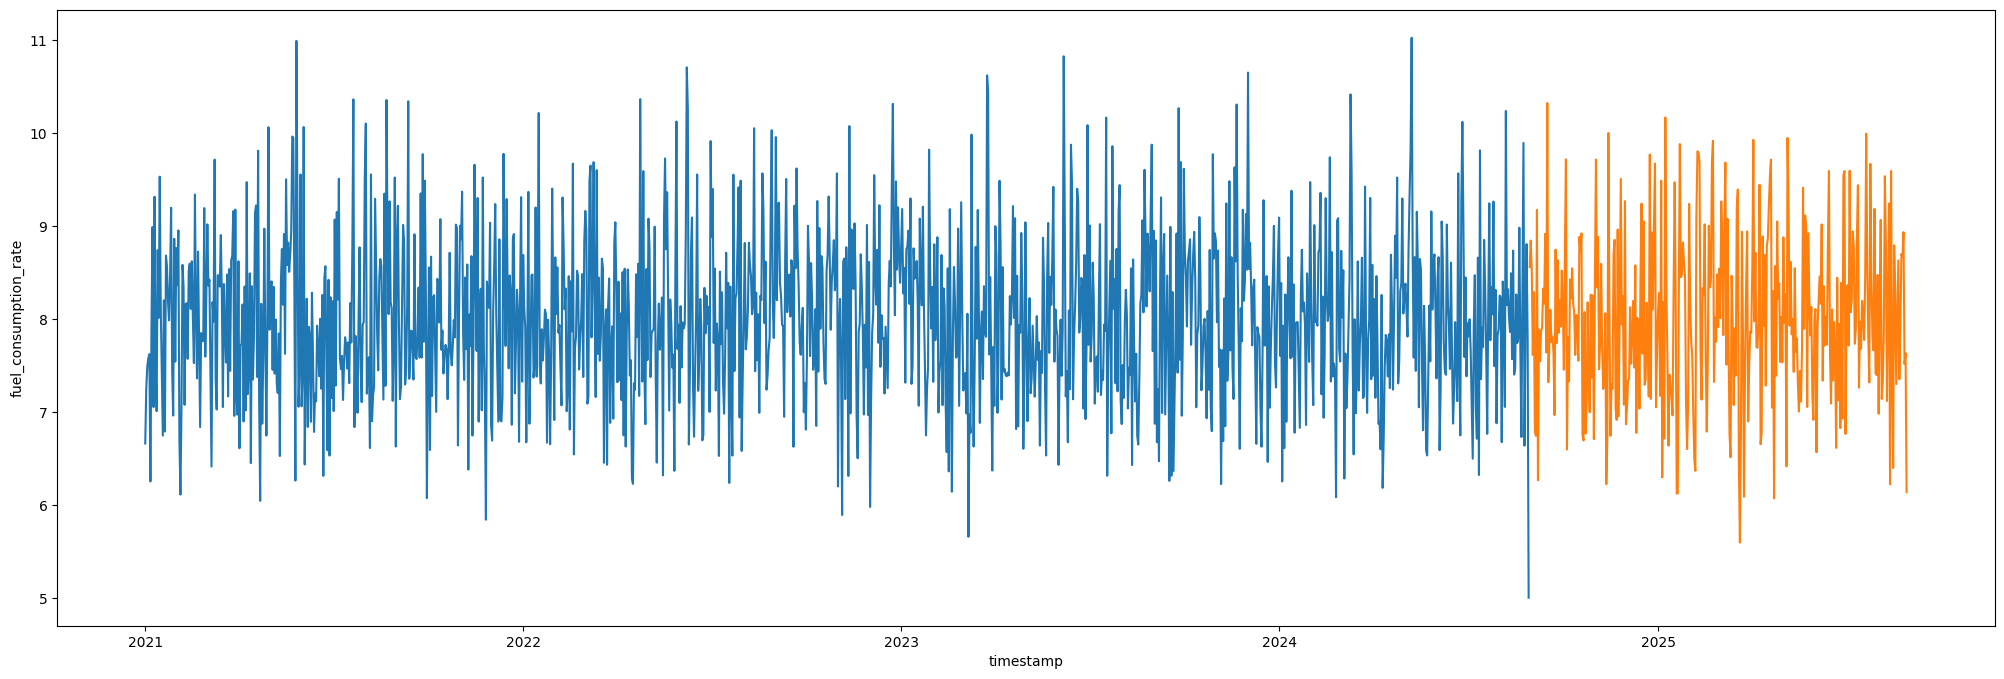

In [54]:
plt.figure(figsize = (25, 8))
sns.lineplot(feat.iloc[:,3]);
sns.lineplot(feat_fore.iloc[:, 3]);

In [55]:
# Check the 5-number summary for anomalies
feat_fore.describe().T

count           mean           std  \
historical_demand                365.0  147168.825139  17047.839199   
warehouse_inventory_level        365.0    6193.685740   1748.033112   
handling_equipment_availability  365.0       0.349953      0.069699   
fuel_consumption_rate            365.0       8.010053      0.903501   
shipping_costs                   365.0     427.916254     65.889928   
supplier_reliability_score       365.0       0.556453      0.075890   
driver_behavior_score            365.0       0.545226      0.077282   
fatigue_monitoring_score         365.0       0.647220      0.075117   
eta_variation_hours              365.0       2.840441      0.466818   
loading_unloading_time           365.0       2.492348      0.330995   
lead_time_days                   365.0       5.063855      0.985349   
customs_clearance_time           365.0       2.422138      0.359690   
delay_probability                365.0       0.728506      0.074967   
route_risk_level                 365.0       6.747014      0.685609   
traffic_congestion_level         365.0       9.710311      0.203570   
weather_condition_severity       365.0       0.989127      0.017933   
port_congestion_level            365.0       9.823765      0.111655   
iot_temperature                  365.0      -2.375006      3.309301   
cargo_condition_status           365.0       0.442389      0.108807   
order_fulfillment_status         365.0       0.636012      0.072911   
disruption_likelihood_score      365.0       0.836247      0.054756   

                                           min            25%            50%  \
historical_demand                102497.169115  135229.354933  147633.559390   
warehouse_inventory_level          1618.301118    5046.265261    6198.868434   
handling_equipment_availability       0.135176       0.302429       0.355768   
fuel_consumption_rate                 5.593484       7.349949       7.972573   
shipping_costs                      257.494393     383.164487     428.267670   
supplier_reliability_score            0.287925       0.503150       0.558026   
driver_behavior_score                 0.331917       0.492615       0.544445   
fatigue_monitoring_score              0.423279       0.599494       0.648600   
eta_variation_hours                   1.621499       2.500716       2.857772   
loading_unloading_time                1.588791       2.266521       2.503834   
lead_time_days                        1.984262       4.354354       5.111948   
customs_clearance_time                1.452508       2.168384       2.412022   
delay_probability                     0.469725       0.680303       0.727007   
route_risk_level                      5.057027       6.273244       6.740609   
traffic_congestion_level              9.139364       9.571202       9.709372   
weather_condition_severity            0.941295       0.976915       0.989077   
port_congestion_level                 9.474110       9.748090       9.839384   
iot_temperature                     -14.714934      -4.674306      -2.495828   
cargo_condition_status                0.139960       0.366152       0.443648   
order_fulfillment_status              0.397931       0.588461       0.635801   
disruption_likelihood_score           0.674855       0.799472       0.837179   

                                           75%            max  
historical_demand                157791.813090  204669.369870  
warehouse_inventory_level          7282.706523   11124.056771  
handling_equipment_availability       0.394382       0.556232  
fuel_consumption_rate                 8.604075      10.321937  
shipping_costs                      477.990638     598.351935  
supplier_reliability_score            0.608447       0.776990  
driver_behavior_score                 0.600834       0.747364  
fatigue_monitoring_score              0.696201       0.902170  
eta_variation_hours                   3.188278       3.974964  
loading_unloading_time                2.728652       3.451073  
lead_

In [56]:
# Check info for missing or unusual datatypes
feat_fore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-08-30 to 2025-08-29
Freq: D
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   historical_demand                365 non-null    float64
 1   warehouse_inventory_level        365 non-null    float64
 2   handling_equipment_availability  365 non-null    float64
 3   fuel_consumption_rate            365 non-null    float64
 4   shipping_costs                   365 non-null    float64
 5   supplier_reliability_score       365 non-null    float64
 6   driver_behavior_score            365 non-null    float64
 7   fatigue_monitoring_score         365 non-null    float64
 8   eta_variation_hours              365 non-null    float64
 9   loading_unloading_time           365 non-null    float64
 10  lead_time_days                   365 non-null    float64
 11  customs_clearance_time           365 non-null    float64


Now that we have the features simulated for our forecast, let us do the same with the target variable, but in our case, we will combine it with __Monte-Carlo Simulations__ to ensure it reflects the realistic fluctuations in the dataset, instead of just providing us the mean. Although we will get a fairly good idea of the target if it is combined with the Confidence Interval, it will only provide a single point value of an _average_ reading that it expects, not the realistic value it may see, especially when the system is compeltely __reactive__ in nature and does not depend on the past historical data.

In [57]:
# Train on complete data and forecast for the next year
fore_model = smt.statespace.SARIMAX(endog = target, exog = feat,
                                   trend = 'c', order = (0, 0, 0),
                                   seasonal_order = (0, 0, 0, 7),
                                   enforce_stationarity = False,
                                   enforce_invertibility = False)

# Fit and predict the model
fore_res = fore_model.fit(disp = False)

# Use Mont-Carlo simulations
sim_mc = fore_res.simulate(nsimulations = len(feat_fore),
                           repititions = 1000,
                           exog = feat_fore,
                           anchor = 'end')

display(sim_mc)

2024-08-30    4.292605
2024-08-31    5.288531
2024-09-01    5.423836
2024-09-02    3.948771
2024-09-03    4.154892
                ...   
2025-08-25    3.581497
2025-08-26    2.848041
2025-08-27    5.219423
2025-08-28    4.357081
2025-08-29    3.331380
Freq: D, Name: delivery_time_deviation, Length: 365, dtype: float64

In [58]:
# Extract Confidence Interval
sim_mean = sim_mc.mean()
lower_95 = np.percentile(sim_mc, 0.5,)
upper_95 = np.percentile(sim_mc, 99.5)

# Merge the forecast with bounded values
final_fore = pd.DataFrame({
    'forecasted_delivery_time_deviation': sim_mc,
    'mean_delivery_time_deviation': sim_mean,
    'lower_95_ci': lower_95,
    'upper_95_ci': upper_95,
}, index = feat_fore.index)


display(final_fore)

forecasted_delivery_time_deviation  mean_delivery_time_deviation  \
2024-08-30                            4.292605                      4.948354   
2024-08-31                            5.288531                      4.948354   
2024-09-01                            5.423836                      4.948354   
2024-09-02                            3.948771                      4.948354   
2024-09-03                            4.154892                      4.948354   
...                                        ...                           ...   
2025-08-25                            3.581497                      4.948354   
2025-08-26                            2.848041                      4.948354   
2025-08-27                            5.219423                      4.948354   
2025-08-28                            4.357081                      4.948354   
2025-08-29                            3.331380                      4.948354   

            lower_95_ci  upper_95_ci  
2024-08-30     2.851741     7.289729  
2024-08-31     2.851741     7.289729  
2024-09-01     2.851741     7.289729  
2024-09-02     2.851741     7.289729  
2024-09-03     2.851741     7.289729  
...                 ...          ...  
2025-08-25     2.851741     7.289729  
2025-08-26     2.851741     7.289729  
2025-08-27     2.851741     7.289729  
2025-08-28     2.851741     7.289729  
2025-08-29     2.851741     7.289729  

[365 rows x 4 columns]

In [59]:
# Merge the forecast target with the feature variables
daywise_forecast = feat_fore.merge(final_fore, validate='one_to_one',
                                  left_index = True, right_index = True)
daywise_forecast

historical_demand  warehouse_inventory_level  \
2024-08-30      158383.936704                5157.772247   
2024-08-31      128215.029891                6724.492736   
2024-09-01      129956.637301                3221.256200   
2024-09-02      134478.325149                6338.543186   
2024-09-03      142572.088641                7452.212687   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-08-30                         0.209514               8.555473   
2024-08-31                         0.252420               8.841415   
2024-09-01                         0.202777               8.539037   
2024-09-02                         0.279489               7.610939   
2024-09-03                         0.254860               8.288364   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-08-30      590.649899                    0.538483               0.571958   
2024-08-31      506.765809                    0.564076               0.524544   
2024-09-01      498.999809                    0.555708               0.545928   
2024-09-02      477.848564                    0.492030               0.451105   
2024-09-03      456.916750                    0.535030               0.564782   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-08-30                  0.559537             2.738881   
2024-08-31                  0.533917             2.425178   
2024-09-01                  0.703111             3.087454   
2024-09-02                  0.587924             3.298945   
2024-09-03                  0.634319             2.465781   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  weather_condition_severity  \
2024-08-30                2.507412  ...                    0.997940   
2024-08-31                2.833968  ...                    1.008615   
2024-09-01                2.228832  ...                    0.996552   
2024-09-02                1.807705  ...                    0.996331   
2024-09-03                2.445820  ...                    0.955498   
...                            ...  ...                         ...   
2025-08-25                3.237594  ...                    0.989025   
2025-08-26                2.617780  ...                    0.978632   
2025-08-27                2.524562  ...                    0.987493   
2025-08-28                2.576624

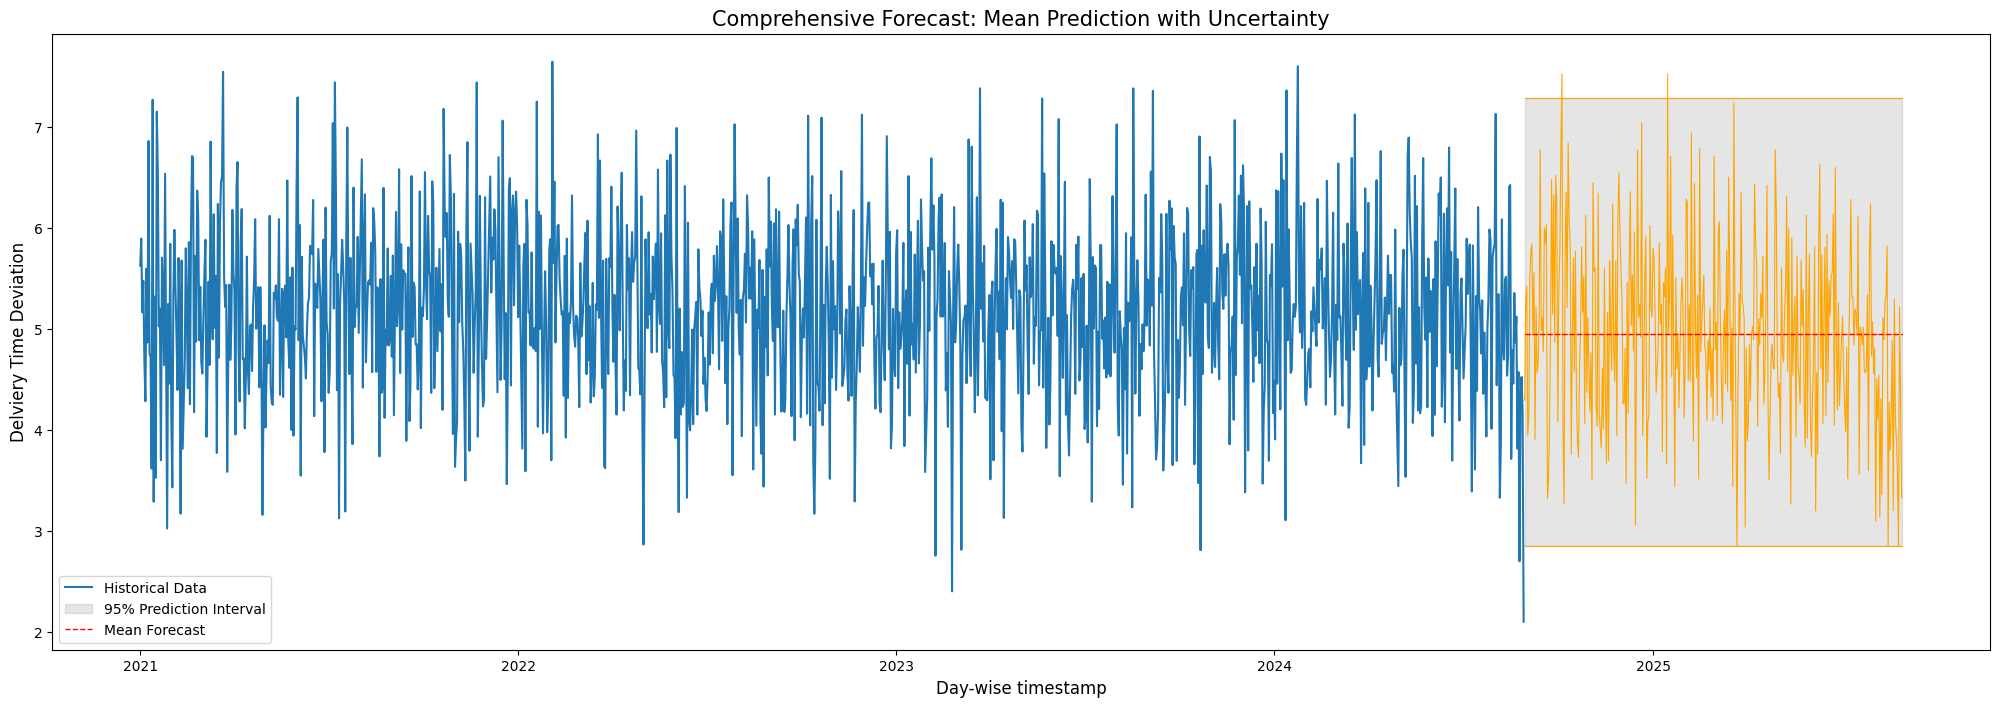

In [60]:
plt.figure(figsize = (25, 8))
sns.lineplot(target, x = target.index, y = target.values, label='Historical Data');
# Plot a subset of simulation paths (for visualization)
for i in range(min(30, final_fore.shape[1])):  # Just show 30 paths for clarity
    plt.plot(final_fore.iloc[:, i], color='orange', linewidth=0.8)

# Plot prediction interval
plt.fill_between(final_fore.index, lower_95, upper_95, 
                 alpha=0.2, color='grey', label='95% Prediction Interval')

# Plot mean forecast (most important - this is your actual prediction)
plt.plot(final_fore.loc[:, 'mean_delivery_time_deviation'], linewidth=1, color='red',
         label='Mean Forecast', ls = '--')
plt.xlabel('Day-wise timestamp', fontsize=12)
plt.ylabel('Delviery Time Deviation', fontsize=12)
plt.title('Comprehensive Forecast: Mean Prediction with Uncertainty', fontsize=15)
plt.legend()
plt.show()

### **<u>CONCLUSION</u>**

The final graph tells a clear story about the delivery delay process:

1.  **Model Validation:** The model structure, **$\text{SARIMAX}(0, 0, 0) \times (0, 0, 0)_7$ with static regression**, is confirmed to be the most appropriate. It predicts that the best estimate for the average delay (the mean forecast line) is constant, proving that **external factors are the only drivers of non-random variation**.

2.  **Stable Mean (Mean Forecast):** The **Mean Forecast** is essentially flat, sitting at the historical average (around $\sim 5.5$ on the y-axis). As such, the **average delivery delay** is stable and predictable, and can be relied on for long-term capacity planning (e.g., calculating annual average resource needs).

3.  **High Volatility (Simulations and CI):** The **Prediction Confidence Interval** and the **simulated paths** show that **individual daily deviations will be highly volatile**, bouncing between approximately $2.8$ and $7.2$.Thus, while the long-term average is stable, **short-term planning and scheduling will remain highly challenging** due to the intrinsic, unpredictable volatility captured by your RMSE ($\sim 0.81$).

<br>

The conclusion will therefore shift our focus from **forecasting** (which is now realistically viable) to **risk management and operational control.**

* **Strategic Capacity Planning (Long-Term)**: We can use the constant mean value to set **long-term resource budgets** (e.g., average daily driver hours, average weekly fuel consumption). This figure is reliable for strategic financial planning.

* **Phase: Tactical Risk Management (Short-Term)**: This is the most crucial takeaway. The upper bound represents the **Worst-Case Delivery Deviation** that we are $95\%$ confident won't be exceeded. However, we must advise the logistics team to **plan their buffer capacity** (e.g., extra staging time, backup drivers) based on this worst-case boundary, not the mean.

* **Phase: Root Cause Analysis (Improving the Model)**: The width is determined by the forecast error (RMSE $\approx 0.81$). To make the grey area narrower (and the forecast more precise), we must **reduce the error**. The team should be tasked with **identifying new exogenous variables** that explain the remaining $0.81$ hours per day of unexplained deviation. These variables are currently hidden within the "white noise" error term $\epsilon_t$.

## **PROJECT B:** <u>Predictive Risk Exposure and Classification</u>

The primary goal of Phase Two is to **integrate the numerical delay forecast with operational risk metrics** to provide a proactive, categorical risk assessment for logistics managers. Having confirmed the stability of the $\text{SARIMAX}(0, 0, 0)$ forecast, the project now addresses the complex reality that the average delay is uniform across all risk categories, even when **High Risk** classification events overwhelmingly dominate the hourly data.

The strategy shifts from standard classification to a **Dependent Regression approach**:

1.  **Target Transformation:** Instead of classifying an imbalanced risk category, the model's target ($\mathbf{Y}$) is redefined as the **numerical proportion of high-risk hours** ($\mathbf{P}_{\text{High\_Risk\_Daily}}$) observed per day. This addresses the class imbalance without violating the time-series integrity of the data.

2.  **Model Dependence:** The $\text{SARIMAX}$'s historical predicted delay ($\mathbf{\hat{Y}}_{\text{in-sample}}$) is introduced as a **key exogenous feature** into the dataset. This builds the required dependency, forcing the risk model to interpret the $\text{SARIMAX}$ forecast, alongside operational factors (like traffic and your engineered hour counts), to predict future risk exposure.

3.  **Final Output:** A robust **XGBoost Regressor** will be trained and deployed to predict this numerical risk proportion, which is then mapped to actionable categorical buckets (Low, Moderate, High Risk) for the final dashboard. This provides the multi-faceted, prescriptive intelligence necessary for strategic operational planning.

For the second part of the project, which we will be conducting using classification algorithms to get a qualitative risk classification, we will have to conduct a "smart" aggregation to downsample it into a daily record. This is because when we check the proportion of classes in the other target variable `risk_classification`, we see that the majority of the readings are dominated by the class of `High Risk`.

In [61]:
# Let us check for the object column if the categories mentioned match up with data description
risk_cnt = logistics.loc[:, 'risk_classification'].value_counts()
risk_prop = logistics.loc[:, 'risk_classification'].value_counts(normalize=True)

risk_frq = pd.DataFrame({
    'Frequency': risk_cnt,
    'Proportion': np.round(risk_prop*100, 2).astype(str) + '%'
})
risk_frq

Frequency Proportion
risk_classification                      
High Risk                23944     74.67%
Moderate Risk             5011     15.63%
Low Risk                  3110       9.7%

As such, we will need to instead add the __proportion__ of hours that the sensors mark for each risk class throughout the day and then connect the same with the actual ground truth we will observe during the downsampling process, called as a __Contingency Table__ of Risk classifications. As such, we will not only have a single downsampled value for the day, but also the proportion of hours the maximum risk classification would have in the day; this insight will also be very useful for the classification model to learn _how_ that classification comes about, even when the raw data is lost during downsampling.

In [62]:
# Custom aggregation for downsampling of risk_classification
def custom_aggregate(df, col='risk_classification', freq='D'):
    '''
    Aggregates the specified column by counting the number of
    hours for each category per time period (e.g., day or week).
    
    Args:
        df (pd.DataFrame): The DataFrame with a datetime index.
        col (str): The name of the column to be aggregated.
        freq (str): The resampling frequency (e.g., 'D' for daily, 'W' for weekly).
        
    Returns:
        pd.DataFrame: A new DataFrame with aggregated counts.
    '''
    # Extract the required dataframe
    try:
        df = df.loc[:, col]
        classes = sorted(list(df.unique()))
    except Exception as e:
        print(f'Check column name, column does not exist. Error {e}')
        return None

    # Create dummy columns for each category in the column
    df_dummies = pd.get_dummies(df)

    # Merge the columns
    df_agg = pd.concat([df, df_dummies], axis=1)

    # Downsample the time series dataframe based on daily frequency
    # Do NOT include the object column
    df_new = df_agg[classes].resample(freq).sum()
    df_new.columns = df_new.columns.str.replace(' ', '_') + '_Hours'

    return df_new

In [63]:
# Obtain the smart downsampled aggregate of the `risk_classification` column
risk_agg = custom_aggregate(logistics)
risk_agg

High_Risk_Hours  Low_Risk_Hours  Moderate_Risk_Hours
timestamp                                                       
2021-01-01               19               0                    5
2021-01-02               21               1                    2
2021-01-03               19               1                    4
2021-01-04               16               4                    4
2021-01-05               19               2                    3
...                     ...             ...                  ...
2024-08-25               19               3                    2
2024-08-26               17               2                    5
2024-08-27               19               2                    3
2024-08-28               19               3                    2
2024-08-29                1               0                    0

[1337 rows x 3 columns]

This aggregated column will now be used for our classification problems even when the hourly classification is lost. However, as we will be working on a single target classification task, we will conduxt a little feature engineering to help the model understand that even if the classes are imbalanced, the model should be able to identify the worst case scenario as this converts the most critical operational outcome into a continuous, non-imbalanced numerical target (a proportion between 0 and 1) that the Regressor can learn. 

The formula for this will be $$\text{P}_{\text{High}} = \frac{\text{High Risk Hours}}{24}$$

where
* $\text{P}_{\text{High}}$ = Probability of high risk exposure (seen from historical data)

* $\text{High Risk Hours}$ = Porportion of hours in the day classified as high risk factors

* $24$ = Hours in a day

In [64]:
risk_agg.loc[:, 'P_High_risk'] = risk_agg.loc[:, 'High_Risk_Hours'] / 24
risk_agg

High_Risk_Hours  Low_Risk_Hours  Moderate_Risk_Hours  P_High_risk
timestamp                                                                    
2021-01-01               19               0                    5     0.791667
2021-01-02               21               1                    2     0.875000
2021-01-03               19               1                    4     0.791667
2021-01-04               16               4                    4     0.666667
2021-01-05               19               2                    3     0.791667
...                     ...             ...                  ...          ...
2024-08-25               19               3                    2     0.791667
2024-08-26               17               2                    5     0.708333
2024-08-27               19               2                    3     0.791667
2024-08-28               19               3                    2     0.791667
2024-08-29                1               0                    0     0.041667

[1337 rows x 4 columns]

In [65]:
# Obtain the boundary levels for risk classes by aggregating over mean
P_high_mean = np.round(risk_agg.loc[:, 'P_High_risk'].mean(), 2)
P_low_mean = np.round((risk_agg.loc[:, 'Low_Risk_Hours']/24).mean(), 2)
P_mod_mean = np.round((risk_agg.loc[:, 'Moderate_Risk_Hours']/24).mean(), 2)

The above mean proportion of risk classification level in a day for each risk class can be used as an empirical bucket limit to classify the final Probability value as either 'Low', 'Medium' or 'High' risk. We can simply take the __inverse concept__ of the probability value to mark the limits and set the boundary as our prediction model is inherently designed to quantify the inverse. When the model predicts a low proportion of high-risk hours, it means the conditions are likely Low or Moderate Risk.

In [66]:
# Create empirical bucketing limits
low_mod_limit = (P_low_mean + P_mod_mean)/2
mod_high_limit = (P_mod_mean + P_high_mean)/2

display(low_mod_limit, mod_high_limit)

0.13

0.455

Thus the empirical buck for risk classification can thus, be as follows.

| Predicted Proportion ($\mathbf{\hat{P}}$) | Calculation of Limit | Final Risk Classification | Operational Meaning |
| :--- | :--- | :--- | :--- |
| $\mathbf{\hat{P}} < 0.1265$ | Midpoint between $\text{Mean}_{\text{Low}}(0.097)$ and $\text{Mean}_{\text{Moderate}}(0.156)$ | **Low Risk** | Standard operations and schedule buffers are sufficient. |
| $0.1265 \leq \mathbf{\hat{P}} < 0.451$ | Midpoint between $\text{Mean}_{\text{Moderate}}(0.156)$ and $\text{Mean}_{\text{High}}(0.746)$ | **Moderate Risk** | _Proactive monitoring and minor resource adjustments_ may be required. |
| $\mathbf{\hat{P}} \geq 0.451$ | Upper limit of the Moderate/High boundary. | **High Risk** | __Immediate__, costly intervention or emergency scheduling protocols are triggered. |

### **Feature Engineering**

Now that we have obtained the risk classification proportion and the `P_High_risk` __target__ variable (that we will use to train the model with), we can thus conduct a fair bit of feature engineering to make a sensible dataset exactly similar to our previous project, but with a disctinction: the `delivery_time_deviation` we will use will _not_ be the actual values, but the **$\text{SARIMAX}(0, 0, 0) \times (0, 0, 0)_7$ with static regression** using __only forecasted__ values.

This is because we are making a __dependent regression__ model where the classification on the same should be via a time-series analysis to quantify the potential delay, followed by a parallel classification to classify the level of interventions needed to mitigate the delays and also prevents the classification regressor model from cheating by looking at the actual delay ($y_{actual}$) when it should __only use the SARIMAX predicted delay__ ($\hat{y}_{pred}$) to forecast risk.

In [67]:
# Create a copy of the day-wise aggregated data
daywise_risk = daywise_orders.copy()
daywise_risk

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  delay_probability  route_risk_level  \
timestamp                           ...                                        
2021-01-01                2.540595  ...           0.659014          6.777202   
2021-01-02                2.321280  ...           0.738776          7.373138   
2021-01-03                2.642499  ...           0.727337          6.605774   
2021-01-04                2.551933  ...           0.731175          6.34

In [68]:
# Model using the SARIMAX(0,0,0) model and create prediction column
risk_sarimax = sarimax_hist = smt.statespace.SARIMAX(endog = target, exog = feat, order = (0, 0, 0), 
                                                     seasonal_order = (0, 0, 0, 7), enforce_stationarity = False, 
                                                     enforce_invertibility = False, trend = 'c')

# Fit the model onto the dataset
sarimax_model = sarimax_hist.fit(disp=False)

# Extract the predicted values from the model fit
sarimax_pred = pd.Series(sarimax_model.fittedvalues, index = target.index)

# Add column to our daywise aggregation
daywise_risk.loc[:, 'delivery_delay_sarimax_pred'] = sarimax_pred

# Drop the original historical data
daywise_risk = daywise_risk.drop('delivery_time_deviation', axis=1) 
daywise_risk

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  delay_probability  route_risk_level  \
timestamp                           ...                                        
2021-01-01                2.540595  ...           0.659014          6.777202   
2021-01-02                2.321280  ...           0.738776          7.373138   
2021-01-03                2.642499  ...           0.727337          6.605774   
2021-01-04                2.551933  ...           0.731175          6.34

Now that we obtained the SARIMAX predicted dataframe thae are actually just the features of our model. We will concatenate the other day-wise aggregated risk-classification columns to make it a complete `features + target` dataset which will then be engineered further for our final Regressor model.

In [69]:
# Merge the predicted day-wise dataframe with the risk-aggregation set
risk_df = pd.merge(daywise_risk, risk_agg,
                  left_index = True,
                  right_index = True,
                  how = 'inner')
risk_df

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  port_congestion_level  \
timestamp                           ...                          
2021-01-01                2.540595  ...               9.964330   
2021-01-02                2.321280  ...               9.995007   
2021-01-03                2.642499  ...               9.998782   
2021-01-04                2.551933  ...               9.991891   
2021-01-05                1.902655  ...               9.999908   
...       

### <u>Time-based Lagging</u>

We are now moving into the final feature engineering step before training the Regressor model for our dependent classification. Lagging is essential because the data is a time series, and even though the SARIMAX model showed no significant autocorrelation (no memory in the delay itself), the drivers of risk are highly dependent on recent history. The Regressor model we will use, the XGBoost model, by itself is __time-agnostic__; it treats every row (day) as an _independent observation_. To enable it to learn temporal patterns, we must embed the sequence of time directly into its feature matrix. Since the data had a 7-day periodic cycle from the previous AIC score SARIMAX modelling, we will do the lags for the folloiwng tim-periods:
* $\text{t} - 1$, $\text{t} - 2$ and $\text{t} - 3$ (__short-term memory__) to capture the immediate carry-over effects like traffic congestion spillover, backlog from the last few days, and momentum in high-risk events and are often the strongest short-term predictors.
  
* $\text{t} - 7$ (__Seasonal Memory__) to capture the weekly seasonality that is crucial in logistics (e.g., comparing a Tuesday's risk to the previous Tuesday's risk). Since the SARIMAX model had a seasonal order of `S = 7`, including this lag validates that structural finding in the SARIMAX model.

<br>

The target variable, $\text{P}_{High\_Risk\}}$, is **not lagged** because it would introduce a severe error known as **Target Leakage** (or "look-ahead bias") into the forecasting model. A predictive model can only be trained using information that would be **known at the time the prediction is made.**

* **Training Failure:** If we were to use the lagged target, $\mathbf{Y}_{t-1}$, as a feature to predict $\mathbf{Y}_t$, the deployed model would require knowing **today's actual risk proportion** ($\mathbf{Y}_t$) in order to predict **tomorrow's risk** ($\mathbf{Y}_{t+1}$).

* **Deployment Failure:** In a real-time scenario, the actual risk proportion for today is **unknowable** until the day is over and the data is logged. Therefore, including the target's lagged value as an input makes the model **unusable** for making a true, proactive forecast.

Instead, we use the **Lagged SARIMAX Prediction ($\mathbf{\hat{Y}}_{\text{SARIMAX}, t-1}$)** as a feature. This serves as the statistically sound substitute for the lagged target, providing the model with memory of the *predicted* outcome without violating the integrity of the forecasting process.

In [70]:
# Separate the columns to features and target
risk_target = risk_df.loc[:, 'P_High_risk']
risk_feat = risk_df.drop('P_High_risk', axis=1)

display(risk_feat, risk_target)

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  weather_condition_severity  \
timestamp                           ...                               
2021-01-01                2.540595  ...                    0.952385   
2021-01-02                2.321280  ...                    0.999932   
2021-01-03                2.642499  ...                    0.995242   
2021-01-04                2.551933  ...                    0.999892   
2021-01-05                1.902655  ...       

timestamp
2021-01-01    0.791667
2021-01-02    0.875000
2021-01-03    0.791667
2021-01-04    0.666667
2021-01-05    0.791667
                ...   
2024-08-25    0.791667
2024-08-26    0.708333
2024-08-27    0.791667
2024-08-28    0.791667
2024-08-29    0.041667
Freq: D, Name: P_High_risk, Length: 1337, dtype: float64

In [71]:
# Now let us introduce the lags in the features
lags = [1, 2, 3, 7] # Short term and seasonal lag

# Use the pandas .shift() function
for col in risk_feat.columns:
    for lag in lags:
        risk_feat.loc[:, f'{col}_lagged_{lag}'] = risk_feat.loc[:, col].shift(lag)

# Show the lagged dataframe
risk_feat

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-01      146105.722646                7237.843269   
2021-01-02      180336.393089                8914.122309   
2021-01-03      151003.300428                6142.809277   
2021-01-04      128532.827740                8205.377923   
2021-01-05      155817.199511                6919.012092   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-01                         0.257542               6.658842   
2021-01-02                         0.255917               7.252002   
2021-01-03                         0.307732               7.489807   
2021-01-04                         0.256017               7.578624   
2021-01-05                         0.385537               7.619207   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-01      400.038948                    0.513834               0.404497   
2021-01-02      565.635388                    0.449355               0.456961   
2021-01-03      487.533988                    0.462318               0.384853   
2021-01-04      343.179154                    0.656553               0.535537   
2021-01-05      382.974045                    0.399389               0.487145   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-01                  0.742520             3.046360   
2021-01-02                  0.555704             2.913967   
2021-01-03                  0.600787             2.957139   
2021-01-04                  0.569891             2.490429   
2021-01-05                  0.601832             2.836737   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  High_Risk_Hours_lagged_3  \
timestamp                           ...                             
2021-01-01                2.540595  ...                       NaN   
2021-01-02                2.321280  ...                       NaN   
2021-01-03                2.642499  ...                       NaN   
2021-01-04                2.551933  ...                      19.0   
2021-01-05                1.902655  ...                   

Now we will concatenate the lagged feature dataframe with the target variabel `P_High_risk` and then drop all the rows with the `np.nan` values as discussed before.

In [72]:
# Merge the dataframes
risk_df_lag = pd.merge(risk_feat, risk_target,
                      left_index = True, right_index = True)

In [73]:
# Drop the rows with NaN values
risk_df_lag = risk_df_lag.dropna()
risk_df_lag

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-08      167157.682368                5810.446296   
2021-01-09      140389.503668                9023.728570   
2021-01-10      137165.004988                4832.082414   
2021-01-11      158182.677294                6923.545068   
2021-01-12      137442.644759                6922.064902   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-08                         0.260213               8.987453   
2021-01-09                         0.267174               7.050652   
2021-01-10                         0.251964               9.313853   
2021-01-11                         0.323300               7.538738   
2021-01-12                         0.246317               7.007255   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-08      576.089828                    0.408395               0.424627   
2021-01-09      469.609819                    0.493418               0.590574   
2021-01-10      450.730209                    0.606895               0.549675   
2021-01-11      504.156478                    0.480468               0.579726   
2021-01-12      459.559005                    0.459429               0.481465   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-08                  0.595294             3.397238   
2021-01-09                  0.675641             3.171794   
2021-01-10                  0.609340             3.068174   
2021-01-11                  0.529175             2.778025   
2021-01-12                  0.573001             3.216411   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  High_Risk_Hours_lagged_7  \
timestamp                           ...                             
2021-01-08                2.130100  ...                      19.0   
2021-01-09                2.136748  ...                      21.0   
2021-01-10                2.508912  ...                      19.0   
2021-01-11                2.534921  ...                      16.0   
2021-01-12                2.395049  ...                   

In [74]:
# Check for missing values
sum(risk_df_lag.isna().sum() != 0)

0

### <u>Extract Temporal Features</u>

Now that we have successfully created a dataset with the lagged values of the features and are ready to model the same using our `XGBoost()` model, we need to extract any remaining temporal features from the index so as to let the model know we are working with chronological data. As such, we will convert the time-stamped features into the following features:

1. __Day of the week__: Critical for logistics, as operations vary drastically between Monday and Saturday/Sunday.

2. __Day of the year__: Can capture monthly budgeting cycles, holiday impacts, or seasonal changes not fully covered by the weather features.

These new features (DOW, DOY, etc.) are then one-hot encoded and added to the feature matrix X before __dropping__ the timestamp completely.

In [75]:
# Extract the Day-of-week features and encode
risk_df_lag.loc[:, 'Day_of_Week'] = risk_df_lag.index.dayofweek
risk_df_lag.loc[:, 'Day_of_year'] = risk_df_lag.index.dayofyear
risk_df_lag.head()

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-08      167157.682368                5810.446296   
2021-01-09      140389.503668                9023.728570   
2021-01-10      137165.004988                4832.082414   
2021-01-11      158182.677294                6923.545068   
2021-01-12      137442.644759                6922.064902   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-08                         0.260213               8.987453   
2021-01-09                         0.267174               7.050652   
2021-01-10                         0.251964               9.313853   
2021-01-11                         0.323300               7.538738   
2021-01-12                         0.246317               7.007255   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-08      576.089828                    0.408395               0.424627   
2021-01-09      469.609819                    0.493418               0.590574   
2021-01-10      450.730209                    0.606895               0.549675   
2021-01-11      504.156478                    0.480468               0.579726   
2021-01-12      459.559005                    0.459429               0.481465   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-08                  0.595294             3.397238   
2021-01-09                  0.675641             3.171794   
2021-01-10                  0.609340             3.068174   
2021-01-11                  0.529175             2.778025   
2021-01-12                  0.573001             3.216411   

            loading_unloading_time  ...  Low_Risk_Hours_lagged_2  \
timestamp                           ...                            
2021-01-08                2.130100  ...                      4.0   
2021-01-09                2.136748  ...                      3.0   
2021-01-10                2.508912  ...                      1.0   
2021-01-11                2.534921  ...                      2.0   
2021-01-12                2.395049  ...                      2.0   

            Low_Risk_Hours_lagged_3  Low_Risk_Hours_lagged_7  \
timestamp                                                      
2021-01-08                      2.0                      0.0   
2021-01-09                      4.0                      1.0   
2021-01-10                      3.0                      1.0   
2021-01-11                      1.0                      4.0   
2021-01-12                      2.0                      2.0   

            Moderate_Risk_Hours_lagged_1  Moderate_Risk_Hours_lagged_2  \
timestamp                                                                
2021-01-08                           5.0                           2.0   
2021-01-09                           5.0                           5.0   
2021-01-10                           6.0                           5.0   
2021-01-11                           2.0                           6.0   
2021-01-12                           4.0                           2.0   

            Moderate_Risk_Hours_lagged_3  Moderate_Risk_Hours_lagged_7  \
timestamp                                                                
2021-01-08                           3.0                           5.0   
2021-01-09                           2.0                           2.0   
2021-01-10                           5.0                           4.0   
2021-01-11                           5.0                           4.0   
2021-01-12                           6.0                           3.0   

            P_High_risk  Day_of_Week  Day_of_year  
timestamp                                          
2021-01-08     0.750000            4

For tree-based models like XGBoost, it's best practice to handle categorical time features like `Day_of_Week` using One-Hot Encoding (OHE) and continuous cyclical features like `Day_of_Year` using Sine/Cosine Transformation.

1. **One-Hot Encode (`Day_of_Week`)**: We will use OHE for `Day_of_Week` because the relationship between 'Monday' and 'Friday' is non-linear; it prevents the model from assuming that 'Saturday' (6) is "more" or "less" than Monday (0).

2. **Sine/Cosine Transform (`Day_of_Year`)**: `Day_of_Year` is cyclical (December 31st is followed by January 1st); as such, standard linear encoding (1 to 365) assumes December is far from January, which is false. Sine/Cosine transformation corrects this by mapping the time onto a circle. We will use both the sine and cosine components because using just one would create ambiguity, making the XGBoost model misinterpret the temporal data. The `Day_of_Year` is a circular feature, where the value at the start (January 1st = 1) is immediately adjacent to the value at the end (December 31st = 365 or 366). If you only use the sine value (or only the cosine), we cannot uniquely identify a point on the circle; the sine function has the same value twice within a cycle (e.g., $sin(30\degree) = sin(150\degree)$) which means days near the start of the year (e.g., January 10th) would have nearly the same sine value as days near the end of the year (e.g., November 20th). The model would be confused, unable to distinguish between two completely different points in the annual cycle.


In [76]:
# One hot encode the Day_of_week
dow_dummy = pd.get_dummies(risk_df_lag.loc[:, 'Day_of_Week'], prefix='DOW_', drop_first = True, dtype = int)

# Drop the Day of Week and concatenate with dummy variables
risk_lag_temp = pd.concat([risk_df_lag.drop('Day_of_Week', axis=1), dow_dummy], axis=1)
risk_lag_temp

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-08      167157.682368                5810.446296   
2021-01-09      140389.503668                9023.728570   
2021-01-10      137165.004988                4832.082414   
2021-01-11      158182.677294                6923.545068   
2021-01-12      137442.644759                6922.064902   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-08                         0.260213               8.987453   
2021-01-09                         0.267174               7.050652   
2021-01-10                         0.251964               9.313853   
2021-01-11                         0.323300               7.538738   
2021-01-12                         0.246317               7.007255   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-08      576.089828                    0.408395               0.424627   
2021-01-09      469.609819                    0.493418               0.590574   
2021-01-10      450.730209                    0.606895               0.549675   
2021-01-11      504.156478                    0.480468               0.579726   
2021-01-12      459.559005                    0.459429               0.481465   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-08                  0.595294             3.397238   
2021-01-09                  0.675641             3.171794   
2021-01-10                  0.609340             3.068174   
2021-01-11                  0.529175             2.778025   
2021-01-12                  0.573001             3.216411   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  Moderate_Risk_Hours_lagged_3  \
timestamp                           ...                                 
2021-01-08                2.130100  ...                           3.0   
2021-01-09                2.136748  ...                           2.0   
2021-01-10                2.508912  ...                           5.0   
2021-01-11                2.534921  ...                           5.0   
2021-01-12                2.395049

In [77]:
# Extract the max Day of Year
doy_max  = risk_lag_temp.loc[:, 'Day_of_year'].max()

# Create a cyclical sine and cosine wave for each index
risk_lag_temp.loc[:, 'DOY_sin'] = np.sin(2 * np.pi * risk_lag_temp.loc[:, 'Day_of_year'] / doy_max)
risk_lag_temp.loc[:, 'DOY_cos'] = np.cos(2 * np.pi * risk_lag_temp.loc[:, 'Day_of_year'] / doy_max)

# Drop the Day of Year column
risk_lag_temp = risk_lag_temp.drop('Day_of_year', axis=1)
risk_lag_temp

historical_demand  warehouse_inventory_level  \
timestamp                                                  
2021-01-08      167157.682368                5810.446296   
2021-01-09      140389.503668                9023.728570   
2021-01-10      137165.004988                4832.082414   
2021-01-11      158182.677294                6923.545068   
2021-01-12      137442.644759                6922.064902   
...                       ...                        ...   
2024-08-25      148871.567506                7873.902363   
2024-08-26      156892.517168                8210.811561   
2024-08-27      122870.734270                4107.379099   
2024-08-28      116612.552285                7897.685247   
2024-08-29        9742.624803                  16.669708   

            handling_equipment_availability  fuel_consumption_rate  \
timestamp                                                            
2021-01-08                         0.260213               8.987453   
2021-01-09                         0.267174               7.050652   
2021-01-10                         0.251964               9.313853   
2021-01-11                         0.323300               7.538738   
2021-01-12                         0.246317               7.007255   
...                                     ...                    ...   
2024-08-25                         0.268443               6.635839   
2024-08-26                         0.366433               7.946480   
2024-08-27                         0.312669               8.804316   
2024-08-28                         0.265557               7.826074   
2024-08-29                         0.486014               5.000046   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
timestamp                                                                       
2021-01-08      576.089828                    0.408395               0.424627   
2021-01-09      469.609819                    0.493418               0.590574   
2021-01-10      450.730209                    0.606895               0.549675   
2021-01-11      504.156478                    0.480468               0.579726   
2021-01-12      459.559005                    0.459429               0.481465   
...                    ...                         ...                    ...   
2024-08-25      362.608626                    0.571812               0.505527   
2024-08-26      431.282274                    0.464824               0.467834   
2024-08-27      418.241522                    0.434755               0.480593   
2024-08-28      490.975860                    0.426892               0.421584   
2024-08-29      202.229823                    0.762965               0.974045   

            fatigue_monitoring_score  eta_variation_hours  \
timestamp                                                   
2021-01-08                  0.595294             3.397238   
2021-01-09                  0.675641             3.171794   
2021-01-10                  0.609340             3.068174   
2021-01-11                  0.529175             2.778025   
2021-01-12                  0.573001             3.216411   
...                              ...                  ...   
2024-08-25                  0.632794             2.923574   
2024-08-26                  0.436150             3.086917   
2024-08-27                  0.645880             1.958112   
2024-08-28                  0.606782             3.278718   
2024-08-29                  0.759489             4.068440   

            loading_unloading_time  ...  Moderate_Risk_Hours_lagged_7  \
timestamp                           ...                                 
2021-01-08                2.130100  ...                           5.0   
2021-01-09                2.136748  ...                           2.0   
2021-01-10                2.508912  ...                           4.0   
2021-01-11                2.534921  ...                           4.0   
2021-01-12                2.395049

In [78]:
# Finally, drop the time-stamp index
risk_lag_temp = risk_lag_temp.reset_index(drop = True)
risk_lag_temp

historical_demand  warehouse_inventory_level  \
0         167157.682368                5810.446296   
1         140389.503668                9023.728570   
2         137165.004988                4832.082414   
3         158182.677294                6923.545068   
4         137442.644759                6922.064902   
...                 ...                        ...   
1325      148871.567506                7873.902363   
1326      156892.517168                8210.811561   
1327      122870.734270                4107.379099   
1328      116612.552285                7897.685247   
1329        9742.624803                  16.669708   

      handling_equipment_availability  fuel_consumption_rate  shipping_costs  \
0                            0.260213               8.987453      576.089828   
1                            0.267174               7.050652      469.609819   
2                            0.251964               9.313853      450.730209   
3                            0.323300               7.538738      504.156478   
4                            0.246317               7.007255      459.559005   
...                               ...                    ...             ...   
1325                         0.268443               6.635839      362.608626   
1326                         0.366433               7.946480      431.282274   
1327                         0.312669               8.804316      418.241522   
1328                         0.265557               7.826074      490.975860   
1329                         0.486014               5.000046      202.229823   

      supplier_reliability_score  driver_behavior_score  \
0                       0.408395               0.424627   
1                       0.493418               0.590574   
2                       0.606895               0.549675   
3                       0.480468               0.579726   
4                       0.459429               0.481465   
...                          ...                    ...   
1325                    0.571812               0.505527   
1326                    0.464824               0.467834   
1327                    0.434755               0.480593   
1328                    0.426892               0.421584   
1329                    0.762965               0.974045   

      fatigue_monitoring_score  eta_variation_hours  loading_unloading_time  \
0                     0.595294             3.397238                2.130100   
1                     0.675641             3.171794                2.136748   
2                     0.609340             3.068174                2.508912   
3                     0.529175             2.778025                2.534921   
4                     0.573001             3.216411                2.395049   
...                        ...                  ...                     ...   
1325                  0.632794             2.923574                2.309177   
1326                  0.436150             3.086917                2.813577   
1327                  0.645880             1.958112                2.579524   
1328                  0.606782             3.278718                2.373707   
1329                  0.759489             4.068440                2.207746   

      ...  Moderate_Risk_Hours_lagged_7  P_High_risk  DOW__1  DOW__2  DOW__3  \
0     ...                           5.0     0.750000       0       0       0   
1     ...                           2.0     0.666667       0       0       0   
2     ...                           4.0     0.833333       0       0       0   
3     ...                           4.0     0.833333       0       0       0   
4     ...                           3.0     0.833333       1       0       0   
...   ...                           ...          ...     ...     ...     ...   
1325  ...                           4.0     0.791667       0       0       0   
1326  ...                           2.0     0.708333       0       0       0   
1327  ...         

## **Modelling the Data**

Now that we have removed the time-stamp index of the dataset and preserved the temporal nature of the indices, we can go ahead and split the dataset into train-test sets and model them using the XGBoost regressor. However, care has to be taken to ensure the splits are done __serially__ and _not_ randomly, as we need to ensure the chronological nature of the Series.

In [79]:
# Extract feature and target
y_risk = risk_lag_temp.loc[:, 'P_High_risk']
X_risk = risk_lag_temp.drop('P_High_risk', axis=1)

display(X_risk, y_risk)

historical_demand  warehouse_inventory_level  \
0         167157.682368                5810.446296   
1         140389.503668                9023.728570   
2         137165.004988                4832.082414   
3         158182.677294                6923.545068   
4         137442.644759                6922.064902   
...                 ...                        ...   
1325      148871.567506                7873.902363   
1326      156892.517168                8210.811561   
1327      122870.734270                4107.379099   
1328      116612.552285                7897.685247   
1329        9742.624803                  16.669708   

      handling_equipment_availability  fuel_consumption_rate  shipping_costs  \
0                            0.260213               8.987453      576.089828   
1                            0.267174               7.050652      469.609819   
2                            0.251964               9.313853      450.730209   
3                            0.323300               7.538738      504.156478   
4                            0.246317               7.007255      459.559005   
...                               ...                    ...             ...   
1325                         0.268443               6.635839      362.608626   
1326                         0.366433               7.946480      431.282274   
1327                         0.312669               8.804316      418.241522   
1328                         0.265557               7.826074      490.975860   
1329                         0.486014               5.000046      202.229823   

      supplier_reliability_score  driver_behavior_score  \
0                       0.408395               0.424627   
1                       0.493418               0.590574   
2                       0.606895               0.549675   
3                       0.480468               0.579726   
4                       0.459429               0.481465   
...                          ...                    ...   
1325                    0.571812               0.505527   
1326                    0.464824               0.467834   
1327                    0.434755               0.480593   
1328                    0.426892               0.421584   
1329                    0.762965               0.974045   

      fatigue_monitoring_score  eta_variation_hours  loading_unloading_time  \
0                     0.595294             3.397238                2.130100   
1                     0.675641             3.171794                2.136748   
2                     0.609340             3.068174                2.508912   
3                     0.529175             2.778025                2.534921   
4                     0.573001             3.216411                2.395049   
...                        ...                  ...                     ...   
1325                  0.632794             2.923574                2.309177   
1326                  0.436150             3.086917                2.813577   
1327                  0.645880             1.958112                2.579524   
1328                  0.606782             3.278718                2.373707   
1329                  0.759489             4.068440                2.207746   

      ...  Moderate_Risk_Hours_lagged_3  Moderate_Risk_Hours_lagged_7  DOW__1  \
0     ...                           3.0                           5.0       0   
1     ...                           2.0                           2.0       0   
2     ...                           5.0                           4.0       0   
3     ...                           5.0                           4.0       0   
4     ...                           6.0                           3.0       1   
...   ...                           ...                           ...     ...   
1325  ...                           0.0                           4.0       0   
1326  ...                           4.0                           2.0       0   
1327  ...

0       0.750000
1       0.666667
2       0.833333
3       0.833333
4       0.833333
          ...   
1325    0.791667
1326    0.708333
1327    0.791667
1328    0.791667
1329    0.041667
Name: P_High_risk, Length: 1330, dtype: float64

In [80]:
# Split serially into train and test
split_idx_risk = int(len(risk_lag_temp) * 0.8)

# Split into train and test features
X_risk_trn, X_risk_tt = X_risk.iloc[:split_idx_risk], X_risk.iloc[split_idx_risk:]
y_risk_trn, y_risk_tt = y_risk.iloc[:split_idx_risk], y_risk.iloc[split_idx_risk:]

print("Train Features and Target")
display(X_risk_trn, y_risk_trn)

print("\nTest Features and Target")
display(X_risk_tt, y_risk_tt)

Train Features and Target


historical_demand  warehouse_inventory_level  \
0         167157.682368                5810.446296   
1         140389.503668                9023.728570   
2         137165.004988                4832.082414   
3         158182.677294                6923.545068   
4         137442.644759                6922.064902   
...                 ...                        ...   
1059      135387.243873                8405.961943   
1060      123780.731385                5041.972021   
1061      131583.311114                9455.443598   
1062      139071.411929                6130.666073   
1063      134124.460344                7795.189809   

      handling_equipment_availability  fuel_consumption_rate  shipping_costs  \
0                            0.260213               8.987453      576.089828   
1                            0.267174               7.050652      469.609819   
2                            0.251964               9.313853      450.730209   
3                            0.323300               7.538738      504.156478   
4                            0.246317               7.007255      459.559005   
...                               ...                    ...             ...   
1059                         0.272467               8.536177      415.695260   
1060                         0.159899               8.817785      384.751809   
1061                         0.320362               8.333389      435.260401   
1062                         0.307792               7.714823      464.807299   
1063                         0.312321               8.333478      512.419779   

      supplier_reliability_score  driver_behavior_score  \
0                       0.408395               0.424627   
1                       0.493418               0.590574   
2                       0.606895               0.549675   
3                       0.480468               0.579726   
4                       0.459429               0.481465   
...                          ...                    ...   
1059                    0.560409               0.504963   
1060                    0.474865               0.497710   
1061                    0.368300               0.453712   
1062                    0.503494               0.525563   
1063                    0.327135               0.459887   

      fatigue_monitoring_score  eta_variation_hours  loading_unloading_time  \
0                     0.595294             3.397238                2.130100   
1                     0.675641             3.171794                2.136748   
2                     0.609340             3.068174                2.508912   
3                     0.529175             2.778025                2.534921   
4                     0.573001             3.216411                2.395049   
...                        ...                  ...                     ...   
1059                  0.584856             3.640693                1.855788   
1060                  0.478655             1.898547                1.947740   
1061                  0.530532             3.754757                2.500356   
1062                  0.724425             2.711346                2.338846   
1063                  0.498956             3.119691                2.172651   

      ...  Moderate_Risk_Hours_lagged_3  Moderate_Risk_Hours_lagged_7  DOW__1  \
0     ...                           3.0                           5.0       0   
1     ...                           2.0                           2.0       0   
2     ...                           5.0                           4.0       0   
3     ...                           5.0                           4.0       0   
4     ...                           6.0                           3.0       1   
...   ...                           ...                           ...     ...   
1059  ...                           2.0                           4.0       0   
1060  ...                           3.0                           5.0       0   
1061  ...

0       0.750000
1       0.666667
2       0.833333
3       0.833333
4       0.833333
          ...   
1059    0.750000
1060    0.791667
1061    0.708333
1062    0.875000
1063    0.875000
Name: P_High_risk, Length: 1064, dtype: float64


Test Features and Target


historical_demand  warehouse_inventory_level  \
1064      127418.445130                5775.994625   
1065      154162.110699                8611.848004   
1066      158330.142132                5102.862672   
1067      128929.865678                9774.445698   
1068      170396.085940                9214.425390   
...                 ...                        ...   
1325      148871.567506                7873.902363   
1326      156892.517168                8210.811561   
1327      122870.734270                4107.379099   
1328      116612.552285                7897.685247   
1329        9742.624803                  16.669708   

      handling_equipment_availability  fuel_consumption_rate  shipping_costs  \
1064                         0.363323               8.422086      446.713663   
1065                         0.332156               7.483468      379.589855   
1066                         0.349345               6.655506      532.074880   
1067                         0.343878               7.910529      547.070914   
1068                         0.289339               7.841004      378.846682   
...                               ...                    ...             ...   
1325                         0.268443               6.635839      362.608626   
1326                         0.366433               7.946480      431.282274   
1327                         0.312669               8.804316      418.241522   
1328                         0.265557               7.826074      490.975860   
1329                         0.486014               5.000046      202.229823   

      supplier_reliability_score  driver_behavior_score  \
1064                    0.522208               0.516486   
1065                    0.471825               0.421010   
1066                    0.516199               0.488143   
1067                    0.530280               0.354958   
1068                    0.569654               0.467966   
...                          ...                    ...   
1325                    0.571812               0.505527   
1326                    0.464824               0.467834   
1327                    0.434755               0.480593   
1328                    0.426892               0.421584   
1329                    0.762965               0.974045   

      fatigue_monitoring_score  eta_variation_hours  loading_unloading_time  \
1064                  0.690048             3.897703                1.947188   
1065                  0.556027             2.748382                2.896076   
1066                  0.703862             3.081106                2.451559   
1067                  0.510634             2.984338                2.460983   
1068                  0.582371             3.337587                2.251228   
...                        ...                  ...                     ...   
1325                  0.632794             2.923574                2.309177   
1326                  0.436150             3.086917                2.813577   
1327                  0.645880             1.958112                2.579524   
1328                  0.606782             3.278718                2.373707   
1329                  0.759489             4.068440                2.207746   

      ...  Moderate_Risk_Hours_lagged_3  Moderate_Risk_Hours_lagged_7  DOW__1  \
1064  ...                           5.0                           3.0       0   
1065  ...                           1.0                           0.0       0   
1066  ...                           0.0                           5.0       0   
1067  ...                           4.0                           3.0       0   
1068  ...                           2.0                           5.0       1   
...   ...                           ...                           ...     ...   
1325  ...                           0.0                           4.0       0   
1326  ...                           4.0                           2.0       0   
1327  ...

1064    0.750000
1065    0.833333
1066    0.750000
1067    0.541667
1068    0.833333
          ...   
1325    0.791667
1326    0.708333
1327    0.791667
1328    0.791667
1329    0.041667
Name: P_High_risk, Length: 266, dtype: float64

Now that we have the train and test sets ready, we can go ahead and model the target using the XGBoost Regression model.

In [81]:
# Import dependency
import xgboost as xgb

# Intialise the model
risk_xgb = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 500,
    learning_rate = 0.03,
    max_depth = 5,
    random_state = 42,
    n_jobs = -1
)

# Fit the model
risk_model = risk_xgb.fit(X_risk_trn, y_risk_trn)
risk_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [82]:
# Make predictions
y_risk_pred = risk_model.predict(X_risk_tt)

# Find the error
risk_rmse = mean_squared_error(y_risk_tt, y_risk_pred, squared = False)
print(f'The RMSE risk proportion error between test and prediction is {risk_rmse:0.4f}')

The RMSE risk proportion error between test and prediction is 0.0273


In [83]:
risk_df_lag.iloc[split_idx_risk:].index

DatetimeIndex(['2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11',
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-16', '2023-12-17',
               ...
               '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23',
               '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29'],
              dtype='datetime64[ns]', name='timestamp', length=266, freq='D')

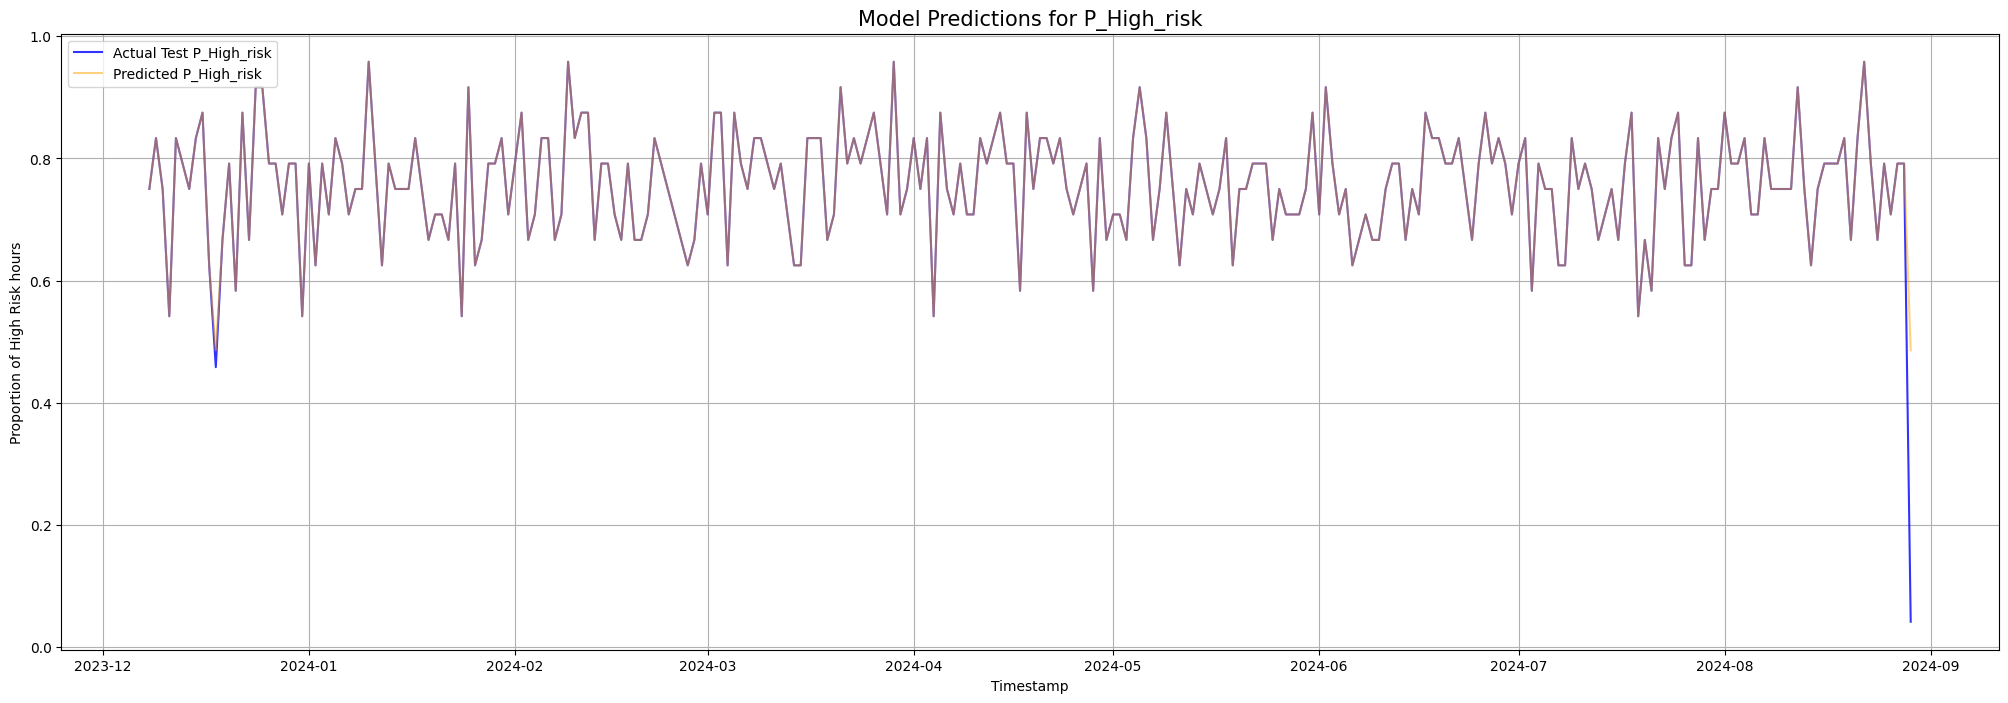

In [84]:
# Plot the actual vs the prediction
plt.figure(figsize = (25, 8))
plt.plot(risk_df_lag.iloc[split_idx_risk:].index, y_risk_tt.values,
         label = 'Actual Test P_High_risk', 
         color = 'blue', alpha = 0.8)
plt.plot(risk_df_lag.iloc[split_idx_risk:].index, y_risk_pred,
         label = 'Predicted P_High_risk',
         color = 'orange', alpha = 0.5)

plt.xlabel('Timestamp')
plt.ylabel('Proportion of High Risk hours')
plt.title('Model Predictions for P_High_risk', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

We see that on average, the model's prediction for the 'Proportion of High Risk Hours' is only off by 2.73 percentage points (or 0.0273 on a scale of 0 to 1) which on average is equivalent to just __under 40 minutes__ of error in predicting the daily high-risk duration. This low RMSE confirms that the dependent pipeline (SARIMAX output to XGBoost Regressor) and the target proportion strategy were highly successful in modeling the complex risk drivers. Let us have a look at the feature importance provided by the model to the relevant features.

Top 10 Feature Importances (Gain):


Feature  Importance
0                      High_Risk_Hours    0.997134
1                    historical_demand    0.002262
2                fuel_consumption_rate    0.000604
3       port_congestion_level_lagged_7    0.000000
4  weather_condition_severity_lagged_3    0.000000
5  weather_condition_severity_lagged_7    0.000000
6       port_congestion_level_lagged_1    0.000000
7       port_congestion_level_lagged_2    0.000000
8       port_congestion_level_lagged_3    0.000000
9             iot_temperature_lagged_1    0.000000

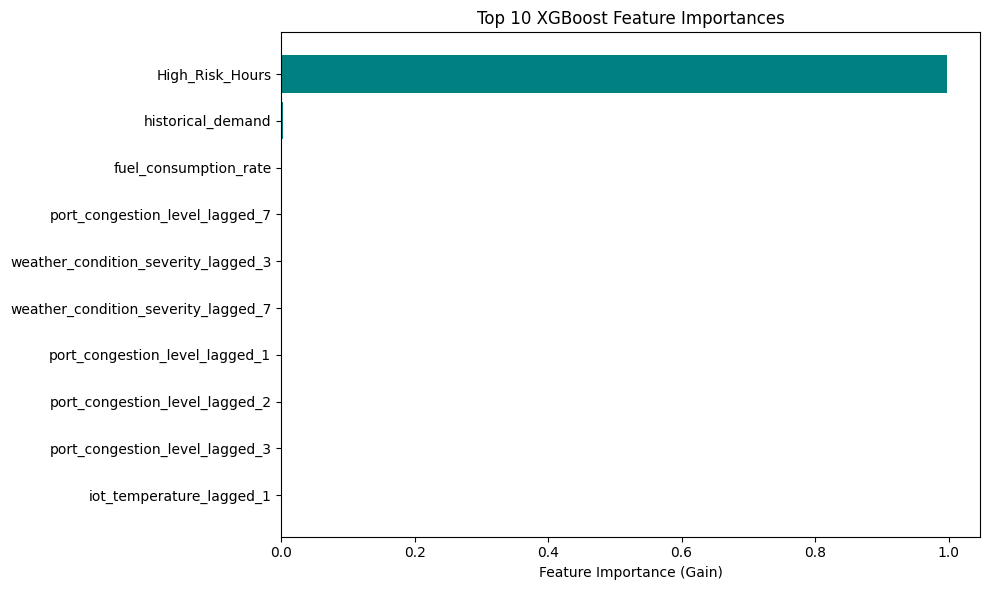

In [85]:
# Obtain feature-importance from the model
importances = risk_model.feature_importances_
feature_names = X_risk_trn.columns

# 2. Create a DataFrame for easy sorting and visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by='Importance',
    ascending=False
).reset_index(drop=True)

# 3. Print and Visualize the Top 10 Features
print("Top 10 Feature Importances (Gain):")
display(feature_importance_df.head(10))

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'][:10][::-1], # Top 10 features, reversed for plot order
    feature_importance_df['Importance'][:10][::-1],
    color='teal'
)
plt.xlabel("Feature Importance (Gain)")
plt.title("Top 10 XGBoost Feature Importances")
plt.tight_layout()
plt.show()

## **Classification Forecast**

Now that we have created the XGBoost Regressor model to learn and predict the probabilistic value for the anticipated proportion of risk level in a day, we can use the simlulated future values we made in Phase 1 of the project, but will use __only the mean values obtained from the Monte-Carlo simulations__. This is because the entire purpose of the SARIMAX model is to estimate the expected value of the delivery time deviation. The mean of the Monte Carlo simulations (MC_Forecast_Mean) is the best, most robust, and least biased estimate of the true expected value of the delay for that future day which represents the deterministic part of the forecast.

A single Monte Carlo path ($\text{Path}_i$) is calculated as: $$\hat{Y}_{MC,i} = \text{Mean Prediction} + \text{Random Error}_{i}$$

The individual paths include the stochastic component (the random noise $\epsilon_{\text{t}}$) of the forecast. If fed one of these noisy paths into the XGBoost Regressor, it would be forcing the model to learn relationships based on random, non-systematic noise. As a result, the XGBoost model would be highly unstable, as it would train to predict a mean proportion using a feature contaminated by randomness; the resulting predictions would have high variance and low reliability.

In [86]:
# Using the future forecasted values from Phase 1
# and mean forecasted delivery deviations from simulations
risk_forecast = daywise_forecast.copy()
risk_forecast = risk_forecast.drop(['forecasted_delivery_time_deviation', 'lower_95_ci', 'upper_95_ci'], axis=1)
risk_forecast.rename(columns = {'mean_delivery_time_deviation': 'delivery_delay_sarimax_pred'}, inplace=True)
risk_forecast

historical_demand  warehouse_inventory_level  \
2024-08-30      158383.936704                5157.772247   
2024-08-31      128215.029891                6724.492736   
2024-09-01      129956.637301                3221.256200   
2024-09-02      134478.325149                6338.543186   
2024-09-03      142572.088641                7452.212687   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-08-30                         0.209514               8.555473   
2024-08-31                         0.252420               8.841415   
2024-09-01                         0.202777               8.539037   
2024-09-02                         0.279489               7.610939   
2024-09-03                         0.254860               8.288364   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-08-30      590.649899                    0.538483               0.571958   
2024-08-31      506.765809                    0.564076               0.524544   
2024-09-01      498.999809                    0.555708               0.545928   
2024-09-02      477.848564                    0.492030               0.451105   
2024-09-03      456.916750                    0.535030               0.564782   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-08-30                  0.559537             2.738881   
2024-08-31                  0.533917             2.425178   
2024-09-01                  0.703111             3.087454   
2024-09-02                  0.587924             3.298945   
2024-09-03                  0.634319             2.465781   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  delay_probability  route_risk_level  \
2024-08-30                2.507412  ...           0.769986          5.795780   
2024-08-31                2.833968  ...           0.645561          6.913354   
2024-09-01                2.228832  ...           0.683924          7.186115   
2024-09-02                1.807705  ...           0.764170          7.266543   
2024-09-03                2.445820  ...           0.673093          6.978467   
...                            ...  ...                ...               ...   
2025-08-25                3.237594  ...           0.690938          6.207175   
2025-08-26                2.617780  ...           0.782485          6.681634   
2025-08-27              

Now that we have the future values for our forecast, we need to fill in the other features such as the ones we saw in the contingency table for `risk_classification`. While it is tempting to use the mean or median, the __mode__ is the most sensible option because it is the only measure that guarantees the filled value is a valid, non-decimal count (e.g., 18 hours, instead of 18.3 hours) and reflects the common operational state.

In [87]:
# --- FEATURE ENGINEERING ---

# Step 1. Extract temporal features from index
# Extract the Day-of-week features and encode
risk_forecast.loc[:, 'Day_of_Week'] = risk_forecast.index.dayofweek
risk_forecast.loc[:, 'Day_of_year'] = risk_forecast.index.dayofyear

risk_forecast

historical_demand  warehouse_inventory_level  \
2024-08-30      158383.936704                5157.772247   
2024-08-31      128215.029891                6724.492736   
2024-09-01      129956.637301                3221.256200   
2024-09-02      134478.325149                6338.543186   
2024-09-03      142572.088641                7452.212687   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-08-30                         0.209514               8.555473   
2024-08-31                         0.252420               8.841415   
2024-09-01                         0.202777               8.539037   
2024-09-02                         0.279489               7.610939   
2024-09-03                         0.254860               8.288364   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-08-30      590.649899                    0.538483               0.571958   
2024-08-31      506.765809                    0.564076               0.524544   
2024-09-01      498.999809                    0.555708               0.545928   
2024-09-02      477.848564                    0.492030               0.451105   
2024-09-03      456.916750                    0.535030               0.564782   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-08-30                  0.559537             2.738881   
2024-08-31                  0.533917             2.425178   
2024-09-01                  0.703111             3.087454   
2024-09-02                  0.587924             3.298945   
2024-09-03                  0.634319             2.465781   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  traffic_congestion_level  \
2024-08-30                2.507412  ...                  9.924363   
2024-08-31                2.833968  ...                 10.087670   
2024-09-01                2.228832  ...                  9.748260   
2024-09-02                1.807705  ...                  9.790837   
2024-09-03                2.445820  ...                  9.912508   
...                            ...  ...                       ...   
2025-08-25                3.237594  ...                  9.583099   
2025-08-26                2.617780  ...                  9.139364   
2025-08-27                2.524562  ...                  9.401292   
2025-08-28                2.576624  ...               

In [88]:
# Calculate the MODE per Day of Week for Risk Hours
risk_cols = ['High_Risk_Hours', 'Low_Risk_Hours', 'Moderate_Risk_Hours']
dow_modes = risk_df_lag.groupby('Day_of_Week')[risk_cols].agg(lambda x: x.mode()[0])
dow_modes

High_Risk_Hours  Low_Risk_Hours  Moderate_Risk_Hours
Day_of_Week                                                      
0                         19               2                    3
1                         18               3                    4
2                         18               1                    3
3                         19               3                    3
4                         19               3                    3
5                         18               2                    3
6                         18               2                    4

In [89]:
# Map the DOW Modes to the Future DataFrame (X_future)
for col in risk_cols:
    # Use the mapped mode value for the corresponding day of the week
    risk_forecast.loc[:, col] = risk_forecast.loc[:, 'Day_of_Week'].map(dow_modes[col])

risk_forecast

historical_demand  warehouse_inventory_level  \
2024-08-30      158383.936704                5157.772247   
2024-08-31      128215.029891                6724.492736   
2024-09-01      129956.637301                3221.256200   
2024-09-02      134478.325149                6338.543186   
2024-09-03      142572.088641                7452.212687   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-08-30                         0.209514               8.555473   
2024-08-31                         0.252420               8.841415   
2024-09-01                         0.202777               8.539037   
2024-09-02                         0.279489               7.610939   
2024-09-03                         0.254860               8.288364   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-08-30      590.649899                    0.538483               0.571958   
2024-08-31      506.765809                    0.564076               0.524544   
2024-09-01      498.999809                    0.555708               0.545928   
2024-09-02      477.848564                    0.492030               0.451105   
2024-09-03      456.916750                    0.535030               0.564782   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-08-30                  0.559537             2.738881   
2024-08-31                  0.533917             2.425178   
2024-09-01                  0.703111             3.087454   
2024-09-02                  0.587924             3.298945   
2024-09-03                  0.634319             2.465781   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  iot_temperature  \
2024-08-30                2.507412  ...        -0.685512   
2024-08-31                2.833968  ...        -0.068140   
2024-09-01                2.228832  ...         3.921525   
2024-09-02                1.807705  ...        -5.573598   
2024-09-03                2.445820  ...        -1.585153   
...                            ...  ...              ...   
2025-08-25                3.237594  ...        -5.591184   
2025-08-26                2.617780  ...        -4.081088   
2025-08-27                2.524562  ...        -4.281474   
2025-08-28                2.576624  ...        -4.286415   
2025-08-29                2.169816  ...        -5.681084   

            cargo_condi

In [90]:
# Step 2. Lagging the features for multiple periods EXCEPT temporal features
# Use the pandas .shift() function
for col in risk_forecast.columns:
    if col not in ['Day_of_Week', 'Day_of_year']:
        for lag in lags:
            risk_forecast.loc[:, f'{col}_lagged_{lag}'] = risk_forecast.loc[:, col].shift(lag)

# Drop the rows with NaN values
risk_forecast = risk_forecast.dropna()
risk_forecast

historical_demand  warehouse_inventory_level  \
2024-09-06      147758.107406                2587.697956   
2024-09-07      126020.564912                8280.338541   
2024-09-08      152414.393320                6256.752412   
2024-09-09      130941.584092                6579.308618   
2024-09-10      135615.250418                5741.258019   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-09-06                         0.385978               9.172404   
2024-09-07                         0.228297               6.263763   
2024-09-08                         0.434049               7.886009   
2024-09-09                         0.351199               7.544682   
2024-09-10                         0.255681               7.866788   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-09-06      469.906003                    0.612094               0.561365   
2024-09-07      508.438151                    0.597040               0.518952   
2024-09-08      581.740280                    0.513290               0.572633   
2024-09-09      521.031509                    0.455110               0.533057   
2024-09-10      419.414779                    0.520910               0.545394   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-09-06                  0.484283             3.330486   
2024-09-07                  0.677893             3.183271   
2024-09-08                  0.597092             3.350430   
2024-09-09                  0.608678             2.644875   
2024-09-10                  0.646669             2.952060   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  High_Risk_Hours_lagged_3  \
2024-09-06                2.852051  ...                      18.0   
2024-09-07                2.916806  ...                      18.0   
2024-09-08                2.797762  ...                      19.0   
2024-09-09                1.978191  ...                      19.0   
2024-09-10                2.090745  ...                      18.0   
...                            ...  ...                       ...   
2025-08-25                3.237594  ...                      19.0   
2025-08-26                2.617780  ...                      18.0   
2025-08-27                2.524562  ...                      18.0   
2025-08-28                2.576624  ...               

In [91]:
# One hot encode the Day_of_week
dow_dummy_fore = pd.get_dummies(risk_forecast.loc[:, 'Day_of_Week'], prefix='DOW_', drop_first = True, dtype = int)

# Drop the Day of Week and concatenate with dummy variables
risk_forecast_temp = pd.concat([risk_forecast.drop('Day_of_Week', axis=1), dow_dummy_fore], axis=1)
risk_forecast_temp

# Extract the max Day of Year
doy_max_fore  = risk_forecast_temp.loc[:, 'Day_of_year'].max()

# Create a cyclical sine and cosine wave for each index
risk_forecast_temp.loc[:, 'DOY_sin'] = np.sin(2 * np.pi * risk_forecast_temp.loc[:, 'Day_of_year'] / doy_max)
risk_forecast_temp.loc[:, 'DOY_cos'] = np.cos(2 * np.pi * risk_forecast_temp.loc[:, 'Day_of_year'] / doy_max)

# Drop the Day of Year column
risk_forecast_temp = risk_forecast_temp.drop('Day_of_year', axis=1)
risk_forecast_temp

historical_demand  warehouse_inventory_level  \
2024-09-06      147758.107406                2587.697956   
2024-09-07      126020.564912                8280.338541   
2024-09-08      152414.393320                6256.752412   
2024-09-09      130941.584092                6579.308618   
2024-09-10      135615.250418                5741.258019   
...                       ...                        ...   
2025-08-25      141385.703190                3539.507906   
2025-08-26      150172.888983                5031.758119   
2025-08-27      155913.599256                5179.138789   
2025-08-28      130805.104562                6644.536900   
2025-08-29      162133.022256                4803.652774   

            handling_equipment_availability  fuel_consumption_rate  \
2024-09-06                         0.385978               9.172404   
2024-09-07                         0.228297               6.263763   
2024-09-08                         0.434049               7.886009   
2024-09-09                         0.351199               7.544682   
2024-09-10                         0.255681               7.866788   
...                                     ...                    ...   
2025-08-25                         0.329871               8.664899   
2025-08-26                         0.334502               8.932838   
2025-08-27                         0.412718               7.513877   
2025-08-28                         0.366519               7.629654   
2025-08-29                         0.425067               6.134817   

            shipping_costs  supplier_reliability_score  driver_behavior_score  \
2024-09-06      469.906003                    0.612094               0.561365   
2024-09-07      508.438151                    0.597040               0.518952   
2024-09-08      581.740280                    0.513290               0.572633   
2024-09-09      521.031509                    0.455110               0.533057   
2024-09-10      419.414779                    0.520910               0.545394   
...                    ...                         ...                    ...   
2025-08-25      360.727468                    0.572384               0.608829   
2025-08-26      370.330233                    0.571277               0.581155   
2025-08-27      438.419335                    0.689846               0.648549   
2025-08-28      303.897755                    0.776990               0.636101   
2025-08-29      324.126808                    0.620187               0.555763   

            fatigue_monitoring_score  eta_variation_hours  \
2024-09-06                  0.484283             3.330486   
2024-09-07                  0.677893             3.183271   
2024-09-08                  0.597092             3.350430   
2024-09-09                  0.608678             2.644875   
2024-09-10                  0.646669             2.952060   
...                              ...                  ...   
2025-08-25                  0.642950             3.486421   
2025-08-26                  0.719209             3.398340   
2025-08-27                  0.747039             3.900342   
2025-08-28                  0.738540             2.226421   
2025-08-29                  0.636355             2.517209   

            loading_unloading_time  ...  Moderate_Risk_Hours_lagged_3  \
2024-09-06                2.852051  ...                           4.0   
2024-09-07                2.916806  ...                           3.0   
2024-09-08                2.797762  ...                           3.0   
2024-09-09                1.978191  ...                           3.0   
2024-09-10                2.090745  ...                           3.0   
...                            ...  ...                           ...   
2025-08-25                3.237594  ...                           3.0   
2025-08-26                2.617780  ...                           3.0   
2025-08-27                2.524562  ...                           4.0   
2025-08-28    

In [92]:
# Step 3. Drop the timestamps and reset the index
risk_forecast_temp = risk_forecast_temp.reset_index(drop = True)
risk_forecast_temp

historical_demand  warehouse_inventory_level  \
0        147758.107406                2587.697956   
1        126020.564912                8280.338541   
2        152414.393320                6256.752412   
3        130941.584092                6579.308618   
4        135615.250418                5741.258019   
..                 ...                        ...   
353      141385.703190                3539.507906   
354      150172.888983                5031.758119   
355      155913.599256                5179.138789   
356      130805.104562                6644.536900   
357      162133.022256                4803.652774   

     handling_equipment_availability  fuel_consumption_rate  shipping_costs  \
0                           0.385978               9.172404      469.906003   
1                           0.228297               6.263763      508.438151   
2                           0.434049               7.886009      581.740280   
3                           0.351199               7.544682      521.031509   
4                           0.255681               7.866788      419.414779   
..                               ...                    ...             ...   
353                         0.329871               8.664899      360.727468   
354                         0.334502               8.932838      370.330233   
355                         0.412718               7.513877      438.419335   
356                         0.366519               7.629654      303.897755   
357                         0.425067               6.134817      324.126808   

     supplier_reliability_score  driver_behavior_score  \
0                      0.612094               0.561365   
1                      0.597040               0.518952   
2                      0.513290               0.572633   
3                      0.455110               0.533057   
4                      0.520910               0.545394   
..                          ...                    ...   
353                    0.572384               0.608829   
354                    0.571277               0.581155   
355                    0.689846               0.648549   
356                    0.776990               0.636101   
357                    0.620187               0.555763   

     fatigue_monitoring_score  eta_variation_hours  loading_unloading_time  \
0                    0.484283             3.330486                2.852051   
1                    0.677893             3.183271                2.916806   
2                    0.597092             3.350430                2.797762   
3                    0.608678             2.644875                1.978191   
4                    0.646669             2.952060                2.090745   
..                        ...                  ...                     ...   
353                  0.642950             3.486421                3.237594   
354                  0.719209             3.398340                2.617780   
355                  0.747039             3.900342                2.524562   
356                  0.738540             2.226421                2.576624   
357                  0.636355             2.517209                2.169816   

     ...  Moderate_Risk_Hours_lagged_3  Moderate_Risk_Hours_lagged_7  DOW__1  \
0    ...                           4.0                           3.0       0   
1    ...                           3.0                           3.0       0   
2    ...                           3.0                           4.0       0   
3    ...                           3.0                           3.0       0   
4    ...                           3.0                           4.0       1   
..   ...                           ...                           ...     ...   
353  ...                           3.0                           3.0       0   
354  ...                           3.0                           4.0       1   
355  ...                           4.0                           

With the dataset now ready, we can begin to forecast the value of `P_High_Risk` and add the subsequent classification of each value based on the numerical output and the classification buckets we made earlier. However, before we do so, we need to re-assemble the entire historical data and use that to train the pre-built model we made earlier, before using the same one to predict the forecast using the future feature values.

In [93]:
# Retrain the model by fitting it on the entire historical data
risk_fore_model = risk_xgb.fit(X_risk, y_risk)
risk_fore_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [94]:
# Extract column names
columns_df1 = set(X_risk.columns)
columns_df2 = set(risk_forecast_temp.columns)

# Find columns not common to both DataFrames
unique_to_df1 = columns_df1 - columns_df2  # Columns only in df1
unique_to_df2 = columns_df2 - columns_df1  # Columns only in df2
not_common_columns = unique_to_df1.union(unique_to_df2)  # Combine both sets

# Convert to list for easier use
not_common_columns_list = list(not_common_columns)
not_common_columns_list

[]

In [95]:
# Re-order the columns to same order as historical data
original_order = list(X_risk.columns)
risk_forecast_temp = risk_forecast_temp[original_order]
risk_forecast_temp

historical_demand  warehouse_inventory_level  \
0        147758.107406                2587.697956   
1        126020.564912                8280.338541   
2        152414.393320                6256.752412   
3        130941.584092                6579.308618   
4        135615.250418                5741.258019   
..                 ...                        ...   
353      141385.703190                3539.507906   
354      150172.888983                5031.758119   
355      155913.599256                5179.138789   
356      130805.104562                6644.536900   
357      162133.022256                4803.652774   

     handling_equipment_availability  fuel_consumption_rate  shipping_costs  \
0                           0.385978               9.172404      469.906003   
1                           0.228297               6.263763      508.438151   
2                           0.434049               7.886009      581.740280   
3                           0.351199               7.544682      521.031509   
4                           0.255681               7.866788      419.414779   
..                               ...                    ...             ...   
353                         0.329871               8.664899      360.727468   
354                         0.334502               8.932838      370.330233   
355                         0.412718               7.513877      438.419335   
356                         0.366519               7.629654      303.897755   
357                         0.425067               6.134817      324.126808   

     supplier_reliability_score  driver_behavior_score  \
0                      0.612094               0.561365   
1                      0.597040               0.518952   
2                      0.513290               0.572633   
3                      0.455110               0.533057   
4                      0.520910               0.545394   
..                          ...                    ...   
353                    0.572384               0.608829   
354                    0.571277               0.581155   
355                    0.689846               0.648549   
356                    0.776990               0.636101   
357                    0.620187               0.555763   

     fatigue_monitoring_score  eta_variation_hours  loading_unloading_time  \
0                    0.484283             3.330486                2.852051   
1                    0.677893             3.183271                2.916806   
2                    0.597092             3.350430                2.797762   
3                    0.608678             2.644875                1.978191   
4                    0.646669             2.952060                2.090745   
..                        ...                  ...                     ...   
353                  0.642950             3.486421                3.237594   
354                  0.719209             3.398340                2.617780   
355                  0.747039             3.900342                2.524562   
356                  0.738540             2.226421                2.576624   
357                  0.636355             2.517209                2.169816   

     ...  Moderate_Risk_Hours_lagged_3  Moderate_Risk_Hours_lagged_7  DOW__1  \
0    ...                           4.0                           3.0       0   
1    ...                           3.0                           3.0       0   
2    ...                           3.0                           4.0       0   
3    ...                           3.0                           3.0       0   
4    ...                           3.0                           4.0       1   
..   ...                           ...                           ...     ...   
353  ...                           3.0                           3.0       0   
354  ...                           3.0                           4.0       1   
355  ...                           4.0                           

2024-09-06    0.791657
2024-09-07    0.750000
2024-09-08    0.750000
2024-09-09    0.791657
2024-09-10    0.750000
                ...   
2025-08-25    0.791657
2025-08-26    0.750000
2025-08-27    0.750000
2025-08-28    0.791657
2025-08-29    0.791657
Freq: D, Name: P_High_risk_fore, Length: 358, dtype: float32

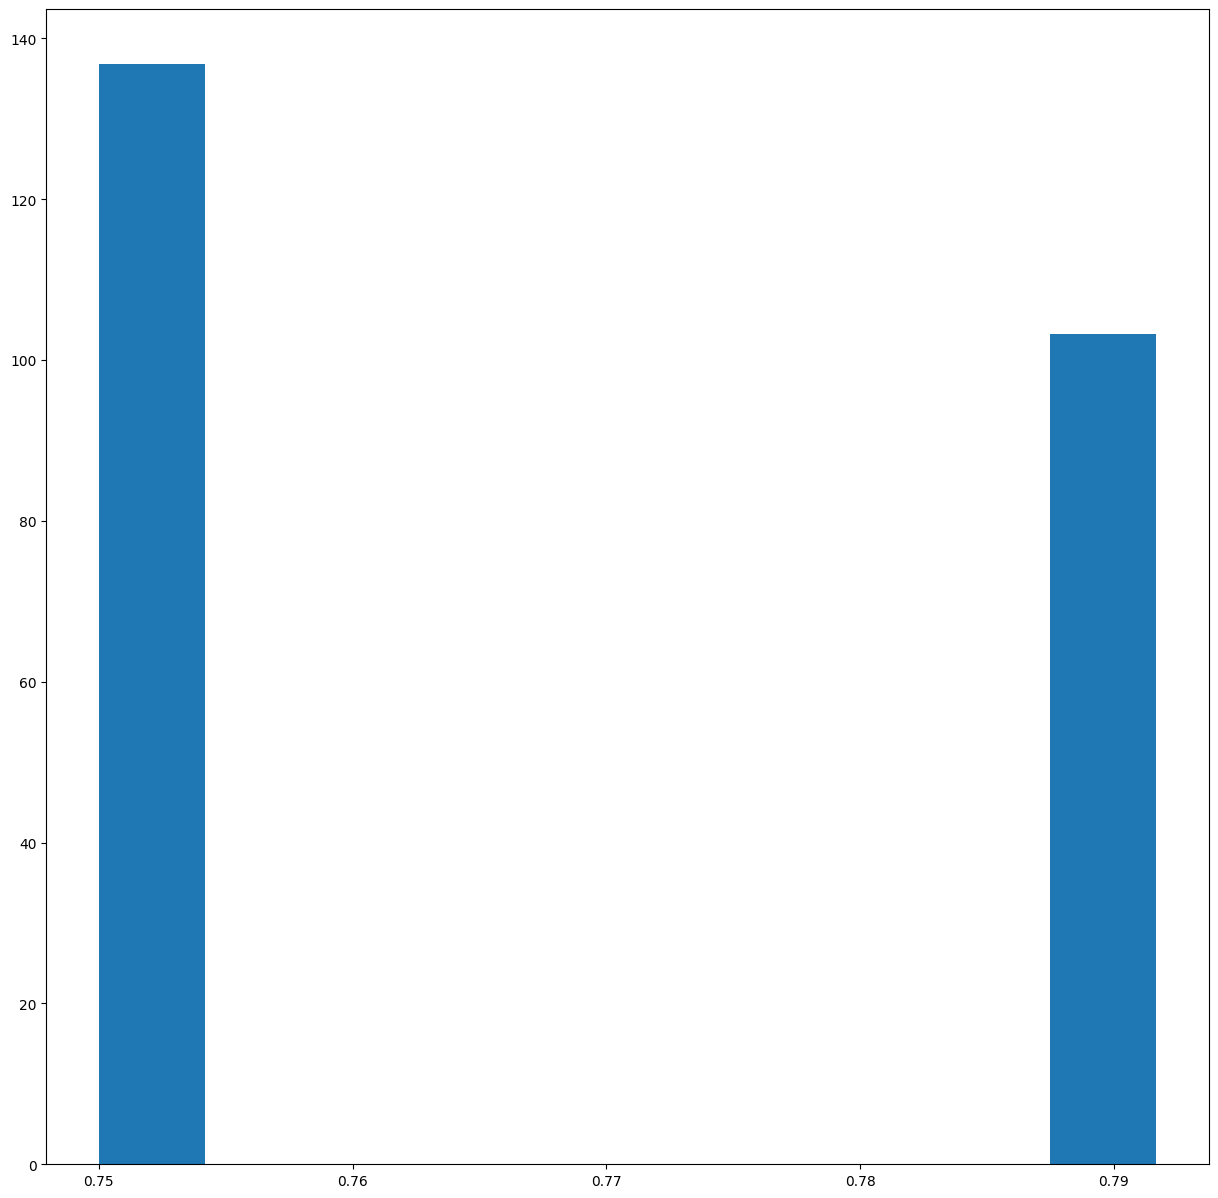

In [96]:
# Forecast the model using the same fit model
risk_pred_forecast = pd.Series(risk_fore_model.predict(risk_forecast_temp), 
                               index = daywise_forecast.index[7:], 
                               name = 'P_High_risk_fore')
display(risk_pred_forecast)
plt.figure(figsize = (15, 15))
plt.hist(risk_pred_forecast, density = True);

In [97]:
# Let us check the spread of the forecasted values
pd.DataFrame(np.round(risk_pred_forecast.describe(), 4), columns = ['P_High_risk_fore'])

P_High_risk_fore
count          358.0000
mean             0.7679
std              0.0207
min              0.7500
25%              0.7500
50%              0.7500
75%              0.7917
max              0.7917

# CONCLUSION

Since we are using the __mean forecasted values__ for `delivery_time_deviation` from the $\text{SARIMAX}(0, 0, 0) \times (0, 0, 0)_7$ model with Monte-Carlo simulations, the spread of the data is already quite small. In order to introduce variablilty to the data, we decided to introduce the number of hours each risk-level is associated with in a day, so as to get the best and worst case scenarios respectively. However, even with this variability, we see that the model predicts that most of the days, if not all, will be spent in the `High_risk` category which paints a grim picture about the logistics process being used.

Firstly, we can try to look at the __immediate__ business level operations we can tweak so as to expect new norms for the foreseeable future, then look at the implications of the forecast on the supply chain process.

### **<u>Final Risk Classification Thresholds (Percentile Bucketing)</u>**

The XGBoost Regressor model successfully minimized its error (RMSE) but predicted that all future days will fall within an extremely narrow, high-risk range (Min: **0.75000** to Max: **0.79167**). Since the prediction is consistently high, the historical static thresholds (e.g., 0.55 and above for `high_risk` category) are __no longer actionable__.

**Strategy:** We adopt a **Percentile Bucketing** approach on the forecast itself. This defines the risk not against the historical average, but against the **expected range of future risk**, allowing us to differentiate the *best* days from the *worst* days __within__ the high-risk environment.

| Predicted Proportion ($\mathbf{\hat{P}}$) | Threshold Source | Value | Final Risk Classification |
| :--- | :--- | :--- | :--- |
| $0.7500 \leq \mathbf{\hat{P}} < 0.7639$ | $33^{\text{rd}}$ Percentile ($\mathbf{P}_{\mathbf{33.33}}$) | **$0.7639$** | **Low Risk** (Relatively lowest $33.33\%$ risk days) |
| $0.7639 \leq \mathbf{\hat{P}} < 0.7778$ | $66^{\text{th}}$ Percentile ($\mathbf{P}_{\mathbf{66.67}}$) | **$0.7778$** | **Moderate Risk** (Middle $66.67\%$ of predicted risk days) |
| $0.7778 \leq \mathbf{\hat{P}} \leq 0.7917$ | - | **$0.79167$** | **High Risk** (Relatively highest $33.33\%$ risk days) |


This method is necessary because the model's output demonstrates that the future operational environment is projected to be consistently extreme (mean $\approx 76.8\%$ High Risk, compared to the historical mean of $\approx 74.6\%$). Since every day would be flagged as "High Risk" under a standard threshold, the logistics team receives no useful guidance. The Percentile Bucketing strategy solves this by creating an **actionable scale of relative severity** for the 365 days. It identifies the days that are **least volatile** ($\text{Low Risk}$) and those that are **most volatile** ($\text{High Risk}$) within the expected forecast range, allowing managers to prioritize resource allocation on the highest $33.33\%$ of predicted risk days.

<br>

#### <u>Strategic Optimization: Reducing Chronic Risk Saturation</u>


Now that we saw the short-term issue of guidance to the logistics team, the question remains: **How does this data drive long-term strategic change?** The final output showing that virtually every day is a "High Risk" day (predicted proportion $\mathbf{0.75}$ to $\mathbf{0.79}$) is the project's most critical finding. It signifies that the current supply chain configuration operates under a state of **chronic, excessive risk saturation.** The long-term goal is to shift the **entire distribution** of risk proportions downward, making "Moderate" and "Low" days more frequent. This requires attacking the factors that the XGBoost model found to be the most influential drivers of risk.

**1. Focus on Internal Systemic Failures:** The model is telling us that even when the external environment (traffic, weather) varies as predicted, the high-risk proportion (≈75%) remains virtually unchanged. This points directly to the internal operation:

* **Internal Risk Saturation:** The dominant factor driving chronic high risk is internal operational inefficiency or a lack of operational buffer. For example, small delays pile up because there are no mechanisms to absorb them, leading to a constant state of 18−24 high-risk hours, regardless of whether traffic is slightly better or slightly worse.

* **Target the 5.1 Hour Gap:** Revisit the uniform average delivery deviation of ∼5.1 hours across all risk categories. This suggests that a structural/procedural issue (e.g., mandatory administrative check, equipment bottleneck, shift change delay) adds a fixed 5.1 hours of delay to delivery times every day. This fixed internal delay may be the dominant source of the chronic `high_risk` classification.

<br>

**2. Eliminate the Structural Bottleneck:** The long-term goal is to target and eliminate the sources of the ∼5.1 hour structural delay, which will pull the entire risk distribution down:

* **Process Re-engineering:** Conduct a root-cause analysis on the ∼5.1 hour delay to identify the non-value-added time (e.g., port waiting time, paperwork processing, loading/unloading inefficiency).

* **Buffer Deployment:** The 75+% risk saturation is the cost of operating without enough slack. A long-term investment is required to increase capacity (fleet size, warehouse space, staffing levels) to create a buffer that can absorb the daily variation in the X variables.

<br>

**3. Implement Dynamic Resource Allocation (D-RA):** Instead of scheduling based on a static 24-hour cycle, the new forecast enables a dynamic approach:

* **Prioritize Investment on $\mathbf{Q}_{\mathbf{75}}$ Days:** The days classified as "High Risk" (the top $33.33\%$ of volatility, $\mathbf{\hat{P}} \geq 0.79167$) must be flagged for **maximal preemptive investment**. This means pre-staging emergency inventory, assigning high-cost overtime drivers, or using external premium carriers *only* on those specific days identified by the model.

* **Invest in Low-Risk Expansion:** Days classified as "Low Risk" ($\mathbf{\hat{P}} < 0.7639$) represent the most stable part of the future. The supply chain should be optimized to **push more volume** into these periods. This could involve offering incentives for early morning/late night pickup slots to level the daily workload.

<br>

**4. Change Contractual Structure:** The most powerful lever could be changing the contract structure to reduce the cost exposure to chronic high risk:

* **Negotiate Flexible Delivery Windows:** Use the $\text{XGBoost}$ forecast to show carriers and customers the cost of mandatory delivery during the predicted **$P_{66.67}$ ($66^{th}$ percentile) days**. Negotiate wider delivery windows for the top $33.33\%$ of high-risk days to mitigate exposure to surge pricing and delivery failures.

<br>

The XGBoost model's output provides the highest-level insight that optimizing the forecast variability of external factors alone will **NOT** solve the chronic risk problem. Long-term optimization must be focused on eliminating the fixed, systemic operational bottlenecks that contribute to the uniform high-risk baseline. By leveraging the model to precisely identify the days of *relative* failure, the company can move from constantly reacting to high risk to strategically investing only when and where the risk is highest, gradually reducing the overall chronic saturation.

### **<u>Creating CSV files</u>**

In order to create a Power BI presentation,the following files will be created after categorising the predicted and historical values according to the `P_High_risk` buckets discussed for both the historical and the forecast data.

count    1337.000000
mean        0.746198
std         0.088277
min         0.041667
25%         0.666667
50%         0.750000
75%         0.791667
max         1.000000
Name: P_High_risk, dtype: float64

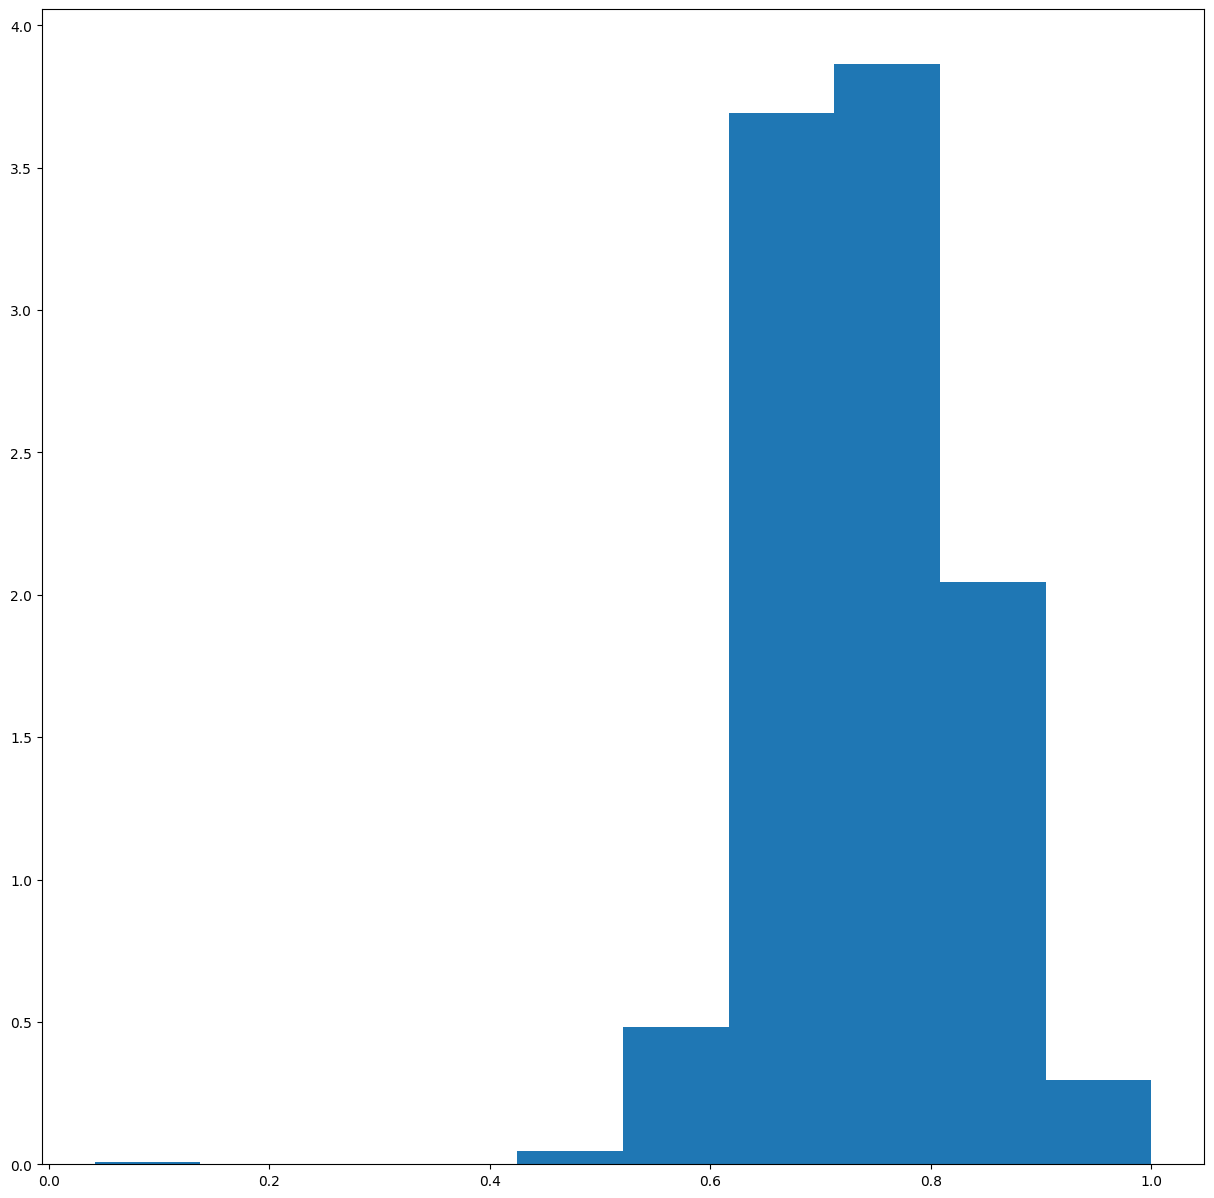

In [98]:
# Check the historical risk classification distribution
display(risk_agg.loc[:, 'P_High_risk'].describe())
plt.figure(figsize = (15, 15))
plt.hist(risk_agg.loc[:, 'P_High_risk'], density = True);

From the above classification distribution of our `P_High_risk` variable, we see that the risk-classification is extremely lopsided. As such, instead of looking for sophisticated aggregation techniques that would be outside the scope our project and increase complexity, we can instead assume equal weightage of each of the classes, and divide the aboe distribution via __percentile bucketing__, the same one we used for our forecast classification. We will therefore, use the $33.33^{\text{th}}$ and $66.66^{\text{th}}$ percentiles to classify the aggregated day-wise risk.

|Historical Proportion ($\mathbf{P_{actual}}$) | Threshold Source | Value | Final Risk Classification |
| :--- | :--- | :--- | :--- |
| $0.0417 \leq \mathbf{P} < 0.3611$ | $33^{\text{rd}}$ Percentile ($\mathbf{P}_{\mathbf{33.33}}$) | **$0.3611$** | **Low Risk** (Relatively lowest $33.33\%$ risk days) |
| $0.3611 \leq \mathbf{P} < 0.6806$ | $66^{\text{th}}$ Percentile ($\mathbf{P}_{\mathbf{66.67}}$) | **$0.6806$** | **Moderate Risk** (Middle $66.67\%$ of predicted risk days) |
| $0.6806 \leq \mathbf{P} \leq 1.000$ | - | **$1.0000$** | **High Risk** (Relatively highest $33.33\%$ risk days) |

In [99]:
# Apply the risk bucketing for historical classification
def categorise_actual(score):
    '''
    Create a bucketing function for the equally
    spaced scores of historical `P_High_risk` variable.
    '''
    if score < 0.3611:
        return 'Low_risk'
    elif score >= 0.3611 and score < 0.6806:
        return 'Moderate_risk'
    elif score >= 0.6808:
        return 'High_risk'

# Apply the risk bucketing for forecast classification
def categorise_forecast(score):
    '''
    Create a bucketing function for the equally
    spaced scores of forecasted `P_High_risk` variable.
    '''
    if score >= 0.75 and score < 0.7639:
        return 'Low_risk'
    elif score >= 0.7639 and score < 0.7778:
        return 'Moderate_risk'
    elif score >= 0.7778 and score <=0.7917:
        return 'High_risk'

In [100]:
# Append and create first file for Power BI presentation
future_risk_forecast = pd.DataFrame(daywise_forecast.iloc[7:, -3], ).\
        rename(columns = {'mean_delivery_time_deviation': 'SARIMAX_pred_delivery_time'})
future_risk_forecast = pd.merge(future_risk_forecast, risk_pred_forecast.to_frame(),
                                left_index = True, right_index=True)
future_risk_forecast.loc[:, 'Forecast_risk'] = future_risk_forecast.loc[:, 'P_High_risk_fore'].apply(categorise_forecast)
display(future_risk_forecast)

SARIMAX_pred_delivery_time  P_High_risk_fore Forecast_risk
2024-09-06                    4.948354          0.791657     High_risk
2024-09-07                    4.948354          0.750000      Low_risk
2024-09-08                    4.948354          0.750000      Low_risk
2024-09-09                    4.948354          0.791657     High_risk
2024-09-10                    4.948354          0.750000      Low_risk
...                                ...               ...           ...
2025-08-25                    4.948354          0.791657     High_risk
2025-08-26                    4.948354          0.750000      Low_risk
2025-08-27                    4.948354          0.750000      Low_risk
2025-08-28                    4.948354          0.791657     High_risk
2025-08-29                    4.948354          0.791657     High_risk

[358 rows x 3 columns]

In [101]:
# Save as .csv file
future_risk_forecast.to_csv('future_risk_forecast.csv')

In [102]:
# Append and create second file for Power BI presentation
hist_risk_pred = pd.DataFrame(risk_fore_model.predict(X_risk),
                              index = risk_df_lag.index,
                              columns = ['P_High_risk_pred'])
hist_risk_pred = pd.concat([hist_risk_pred, risk_agg.iloc[7:, -1]], axis=1)
hist_risk_pred.loc[:, 'Actual_risk_agg'] = hist_risk_pred.loc[:, 'P_High_risk'].apply(categorise_actual)
hist_risk_pred

P_High_risk_pred  P_High_risk Actual_risk_agg
timestamp                                                
2021-01-08          0.750000     0.750000       High_risk
2021-01-09          0.666689     0.666667   Moderate_risk
2021-01-10          0.833309     0.833333       High_risk
2021-01-11          0.833309     0.833333       High_risk
2021-01-12          0.833309     0.833333       High_risk
...                      ...          ...             ...
2024-08-25          0.791657     0.791667       High_risk
2024-08-26          0.708345     0.708333       High_risk
2024-08-27          0.791657     0.791667       High_risk
2024-08-28          0.791657     0.791667       High_risk
2024-08-29          0.043072     0.041667        Low_risk

[1330 rows x 3 columns]

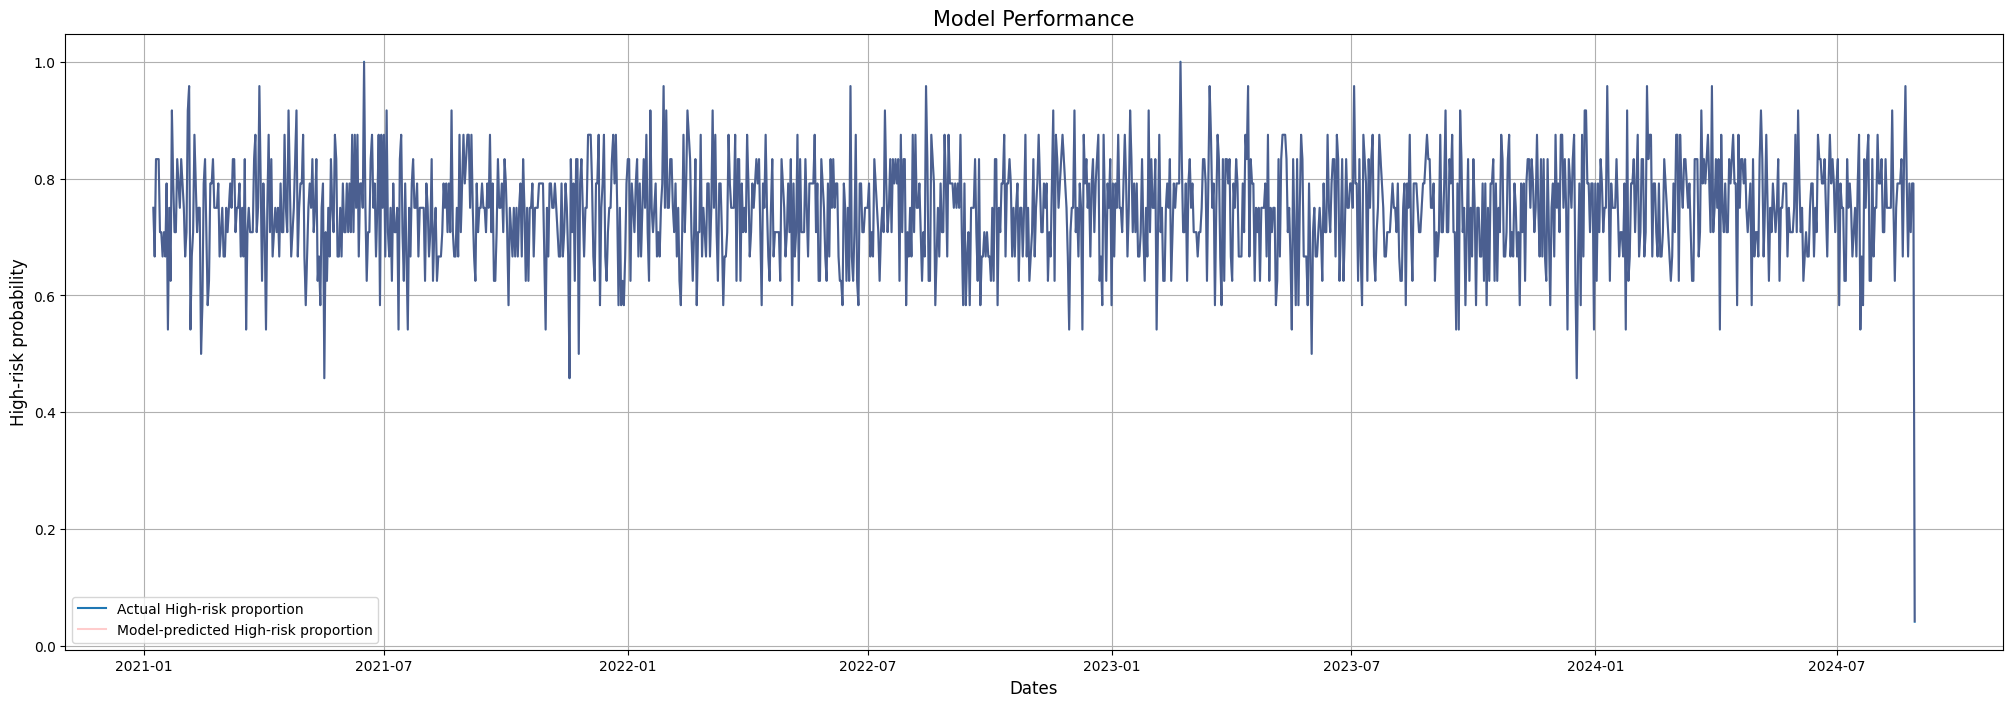

In [103]:
plt.figure(figsize = (25, 8))
plt.plot(hist_risk_pred.loc[:, 'P_High_risk'], 
         label = 'Actual High-risk proportion')
plt.plot(hist_risk_pred.loc[:, 'P_High_risk_pred'],
         label = 'Model-predicted High-risk proportion', color = 'red', alpha = 0.2)
plt.title('Model Performance', fontsize = 15)
plt.xlabel('Dates', fontsize = 12)
plt.ylabel('High-risk probability', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [104]:
# Save as .csv file
hist_risk_pred.to_csv('historical_risk_validation.csv')

In [105]:
# Append the third file for Power BI
sarimax_delivery_delay_forecast = daywise_forecast.iloc[:, -4:]
sarimax_delivery_delay_forecast.to_csv('sarimax_delivery_delay_forecast.csv')